# Setup
**application_train/application_test**:
- the main training and testing data with information about each loan application at Home Credit. 
- Every loan has its own row and is identified by the feature SK_ID_CURR. 
- The training application data comes with the TARGET indicating 0: the loan was repaid or 1: the loan was not repaid. 

In [0]:
# connecting google drive with google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
import gc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#impott

In [0]:
DATA_DIRECTORY = "drive/My Drive/Kaggle/home credit/data/"
df_app_train = pd.read_csv(os.path.join(DATA_DIRECTORY, 'application_train.csv'), nrows= None)
df_app_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

              ...              FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             ...                             0                0   
1             ...                             0                0   
2             ...                             0                0   
3             ...                             0                0   
4             ...                             0                0   

  FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                0                0                        0.0   
1                0                0                        0.0   
2                0                0                        0.0   
3                0                0                        NaN   
4                0                0                        0.0   

  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                       0.0                         0.0   
3                       NaN                         NaN   
4                       0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         1.0  
1                         0.0  
2                         0.0  
3                         NaN  
4                         0.0  

[5 rows x 122 columns]

In [0]:
df_app_test = pd.read_csv(os.path.join(DATA_DIRECTORY, 'application_test.csv'), nrows= None)
df_app_test.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

              ...             FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             ...                            0                0   
1             ...                            0                0   
2             ...                            0                0   
3             ...                            0                0   
4             ...                            0                0   

  FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                0                0                        0.0   
1                0                0                        0.0   
2                0                0                        0.0   
3                0                0                        0.0   
4                0                0                        NaN   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
4                        NaN                         NaN   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        1.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         0.0  
1                         3.0  
2                         4.0  
3                         3.0  
4                         NaN  

[5 rows x 121 columns]

In [0]:
# This function assits to expand Exploratory Data Analysis (EDA) is an open-ended 
#process where we calculate statistics and make figures to find trends, anomalies,
#patterns, or relationships within the data. The goal of EDA is to learn what our
#data can tell us. It generally starts out with a high level overview, 
#then narrows in to specific areas as we find intriguing areas of the data. 

def statistical_analyzing(df_input):
  # check number of rows, cols
  no_rows = df_input.shape[0]
  no_cols = df_input.shape[1]
  print("No. observations:", no_rows )
  print("No. features:", no_cols )
  
  # checking type of features
  name = []
  cols_type = []
  for n,t in df_input.dtypes.iteritems():
    name.append(n)
    cols_type.append(t)
    
  # checking distinction (unique values) of features
  ls_unique = []
  for cname in df_input.columns:
    try:
      nunique = df_input[cname].nunique()
      pct_unique = nunique*100.0/ no_rows
      ls_unique.append("{} ({:0.2f}%)".format(nunique, pct_unique))
    except:
      ls_unique.append("{} ({:0.2f}%)".format(0,0))
      continue
  # checking missing values of features
  ls_miss = []
  for cname in df_input.columns:
    try:
      nmiss = df_input[cname].isnull().sum()
      pct_miss = nmiss*100.0/ no_rows
      ls_miss.append("{} ({:0.2f}%)".format(nmiss, pct_miss))
    except:
      ls_miss.append("{} ({:0.2f}%)".format(0,0))
      continue 
      
  # checking zeros
  ls_zeros = []
  for cname in df_input.columns:
    try:
      nzeros = (df_input[cname] == 0).sum()
      pct_zeros = nzeros * 100.0/ no_rows
      ls_zeros.append("{} ({:0.2f}%)".fornat(nzeros, pct_zeros))
    except:
      ls_zeros.append("{} ({:0.2f}%)".format(0,0))
      continue
      
  # checking negative values
  ls_neg = []
  for cname in df_input.columns:
    try:
      nneg = (df_input[cname].astype("float")<0).sum()
      pct_neg =nneg * 100.0 / no_rows
      ls_neg.append("{} ({:0.2f}%)".format(nneg, pct_neg))
    except:
      ls_neg.append("{} ({:0.2f}%)".format(0,0))
      continue
      
  # extracting the output
  data = {
      "name": name,
      "col_type": cols_type,
      "n_unique": ls_unique,
      "n_miss": ls_miss,
      "n_zeros":ls_zeros,
      "n_neg":ls_neg      
  }
  
  # statistical info
  df_stats = df_input.describe().transpose()
  ls_stats = []
  for stat in df_stats.columns:
    data[stat] = []
    for cname in df_input.columns:
      try:
        data[stat].append(df_stats.loc[cname, stat])
      except:
        data[stat].append(0.0)
        
  # take samples
  df_sample = df_input.sample(frac = .5).head().transpose()
  df_sample.columns = ["sample_{}".format(i) for i in range(5)]
  
  # repair the output
  col_ordered = ["name","col_type","n_unique","n_miss","n_zeros","n_neg",
                "25%","50%","75%","count","max","mean","min","std"]
  df_data = pd.DataFrame(data, columns = col_ordered).set_index("name")
  df_data = pd.concat([df_data, df_sample], axis = 1)
  
  return df_data   

In [0]:
def plot_categorical(cols, target, df):
  for col in cols:
    if target == None:
      sns.countplot(x=col, data=df[[col]] ,  palette="Reds_d")      
    else:
      print('Column name: %s' %col)
      sns.countplot(x=col, hue=target, data=df[[col,target]], palette="Reds_d")
      #sns.barplot(x=col, y=target, data=df[[col,target]]
      #        , palette="Reds_d", estimator = sum)
      plt.legend()
    plt.xticks(rotation=90)#-60    
    plt.show()

# Plotting the continous features :    
# 1. A box plot (or box-and-whisker plot) shows the distribution of quantitative data 
#in a way that facilitates comparisons between variables.
# 2. Distribution graph :to check the linearity of the variables and look for skewness of features.
def plot_continous(cols, target, df):
  # Using boxplot to analyze the continous feature
  for col in cols:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    if target == None:
      plot = sns.boxplot(col, whis=1.5, data=df)
    else:
      plot = sns.boxplot(x=target, y=col, whis=1.5, data=df)
      plt.legend()
    # which defined as the proportion of the IQR past the low and high quartiles to extend the plot whiskers 
    # or interquartile range (IQR)
    # therefore, maximum = Q3 + 1.5*IQR , min = Q1 - 1.5*IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print('Column name: %s' %col)    
    print('> No.outliner: %d \n' %((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum())
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[col].dropna())#.hist(bins=20)
    fig.set_ylabel('Volumn')
    fig.set_xlabel(col)    
    plt.show() 

In [0]:
# Grouping features by specific characteristic and ability based on that we 
# can make further anylysis by dividing these feature into 2 types: category and continous.
spec_col = [f for f in df_app_train.columns if '_MODE' in f]+[f for f in df_app_train.columns if '_AVG' in f]+[f for f in df_app_train.columns if '_MEDI' in f]
nor_col = list(set(df_app_train.columns) - set(spec_col))

df = df_app_train[nor_col]
cate_cols = [col for col in df.columns if df[col].dtype == 'object']
cate_cols.remove('FLAG_OWN_CAR')
cate_cols.remove('FLAG_OWN_REALTY')
for col in [f for f in df.columns if 'FLAG_' in f]+[f for f in df.columns if 'LIVE_' and '_NOT_' in f]+[f for f in df.columns if 'REGION_RATING_' in f]:
  cate_cols.append(col)
cons_cols = list(set(df.columns) - set(cate_cols))

# append SK_ID_CURR for analyzing purpose
cate_cols.append("SK_ID_CURR")
spec_col.append("SK_ID_CURR")

# Special Cols
After exploring these features, I want to mark some points:
- These features are altered from a initial feature such as "APARTMENTS" into 3 transformed sub-features "APARTMENTS_MODE ","APARTMENTS_AVG ", and "APARTMENTS_MEDI" to show specific characteristic. Therefore, these features correlate to each other significantly as we can see in the correlation matrix.
- The general ideas and meaning of these features remarkably similar aims. e.g,  APARTMENTS, FLOORSMAX, FLOORSMIN, LANDAREA... Hence, all cols nearly have main purpose of describing the living condition of a client's loan application.
- In this group, features contains a lot of missing values recorded at above 48 per cent.


**Therefore**, It is obvious that we can think about dropping several cols which presents similar information to other features.

In [0]:
# 'APARTMENTS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG',
# 'APARTMENTS_MODE','FLOORSMAX_MODE','TOTALAREA_MODE','WALLSMATERIAL_MODE'   
# ['APARTMENTS_MEDI','YEARS_BEGINEXPLUATATION_MEDI','ENTRANCES_MEDI', 'FLOORSMAX_MEDI',

In [0]:
cols = ['APARTMENTS_MODE','APARTMENTS_AVG','APARTMENTS_AVG','SK_ID_CURR']
df_app_train[cols].sample(10)#[ df_app_train[cols]["SK_ID_CURR"] == 451453]

APARTMENTS_MODE  APARTMENTS_AVG  APARTMENTS_AVG  SK_ID_CURR
61558            0.3929          0.3856          0.3856      171398
113352              NaN             NaN             NaN      231462
193176           0.0158          0.0155          0.0155      324017
277003           0.0840          0.0825          0.0825      421023
259300              NaN             NaN             NaN      400086
268709              NaN             NaN             NaN      411396
7183             0.0378          0.0371          0.0371      108359
53861            0.0840          0.0825          0.0825      162405
303149              NaN             NaN             NaN      451218
56910            0.0945          0.0928          0.0928      165962

In [0]:
# df_explore_cate = statistical_analyzing(df_app_train[spec_col])
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#   print(spec_col)
#   print(df_explore_cate)
statistical_analyzing(df_app_train[spec_col])

No. observations: 307511
No. features: 48


col_type          n_unique           n_miss  \
name                                                                       
APARTMENTS_MODE               float64       760 (0.25%)  156061 (50.75%)   
BASEMENTAREA_MODE             float64      3841 (1.25%)  179943 (58.52%)   
YEARS_BEGINEXPLUATATION_MODE  float64       221 (0.07%)  150007 (48.78%)   
YEARS_BUILD_MODE              float64       154 (0.05%)  204488 (66.50%)   
COMMONAREA_MODE               float64      3128 (1.02%)  214865 (69.87%)   
ELEVATORS_MODE                float64        26 (0.01%)  163891 (53.30%)   
ENTRANCES_MODE                float64        30 (0.01%)  154828 (50.35%)   
FLOORSMAX_MODE                float64        25 (0.01%)  153020 (49.76%)   
FLOORSMIN_MODE                float64        25 (0.01%)  208642 (67.85%)   
LANDAREA_MODE                 float64      3563 (1.16%)  182590 (59.38%)   
LIVINGAPARTMENTS_MODE         float64       736 (0.24%)  210199 (68.35%)   
LIVINGAREA_MODE               float64      5301 (1.72%)  154350 (50.19%)   
NONLIVINGAPARTMENTS_MODE      float64       167 (0.05%)  213514 (69.43%)   
NONLIVINGAREA_MODE            float64      3327 (1.08%)  169682 (55.18%)   
FONDKAPREMONT_MODE             object         4 (0.00%)  210295 (68.39%)   
HOUSETYPE_MODE                 object         3 (0.00%)  154297 (50.18%)   
TOTALAREA_MODE                float64      5116 (1.66%)  148431 (48.27%)   
WALLSMATERIAL_MODE             object         7 (0.00%)  156341 (50.84%)   
EMERGENCYSTATE_MODE            object         2 (0.00%)  145755 (47.40%)   
APARTMENTS_AVG                float64      2339 (0.76%)  156061 (50.75%)   
BASEMENTAREA_AVG              float64      3780 (1.23%)  179943 (58.52%)   
YEARS_BEGINEXPLUATATION_AVG   float64       285 (0.09%)  150007 (48.78%)   
YEARS_BUILD_AVG               float64       149 (0.05%)  204488 (66.50%)   
COMMONAREA_AVG                float64      3181 (1.03%)  214865 (69.87%)   
ELEVATORS_AVG                 float64       257 (0.08%)  163891 (53.30%)   
ENTRANCES_AVG                 float64       285 (0.09%)  154828 (50.35%)   
FLOORSMAX_AVG                 float64       403 (0.13%)  153020 (49.76%)   
FLOORSMIN_AVG                 float64       305 (0.10%)  208642 (67.85%)   
LANDAREA_AVG                  float64      3527 (1.15%)  182590 (59.38%)   
LIVINGAPARTMENTS_AVG          float64      1868 (0.61%)  210199 (68.35%)   
LIVINGAREA_AVG                float64      5199 (1.69%)  154350 (50.19%)   
NONLIVINGAPARTMENTS_AVG       float64       386 (0.13%)  213514 (69.43%)   
NONLIVINGAREA_AVG             float64      3290 (1.07%)  169682 (55.18%)   
APARTMENTS_MEDI               float64      1148 (0.37%)  156061 (50.75%)   
BASEMENTAREA_MEDI             float64      3772 (1.23%)  179943 (58.52%)   
YEARS_BEGINEXPLUATATION_MEDI  float64       245 (0.08%)  150007 (48.78%)   
YEARS_BUILD_MEDI              float64       151 (0.05%)  204488 (66.50%)   
COMMONAREA_MEDI               float64      3202 (1.04%)  214865 (69.87%)   
ELEVATORS_MEDI                float64        46 (0.01%)  163891 (53.30%)   
ENTRANCES_MEDI                float64        46 (0.01%)  154828 (50.35%)   
FLOORSMAX_MEDI                float64        49 (0.02%)  153020 (49.76%)   
FLOORSMIN_MEDI                float64        47 (0.02%)  208642 (67.85%)   
LANDAREA_MEDI                 float64      3560 (1.16%)  182590 (59.38%)   
LIVINGAPARTMENTS_MEDI         float64      1097 (0.36%)  210199 (68.35%)   
LIVINGAREA_MEDI               float64      5281 (1.72%)  154350 (50.19%)   
NONLIVINGAPARTMENTS_MEDI      float64       214 (0.07%)  213514 (69.43%)   
NONLIVINGAREA_MEDI            float64      3323 (1.08%)  169682 (55.18%)   
SK_ID_CURR                      int64  307511 (100.00%)        0 (0.00%)   

                                n_zeros      n_neg          25%          50%  \
name                                                                           
APARTMENTS_MODE               0 (0.00%)  0 (0.00%)       0.0525     

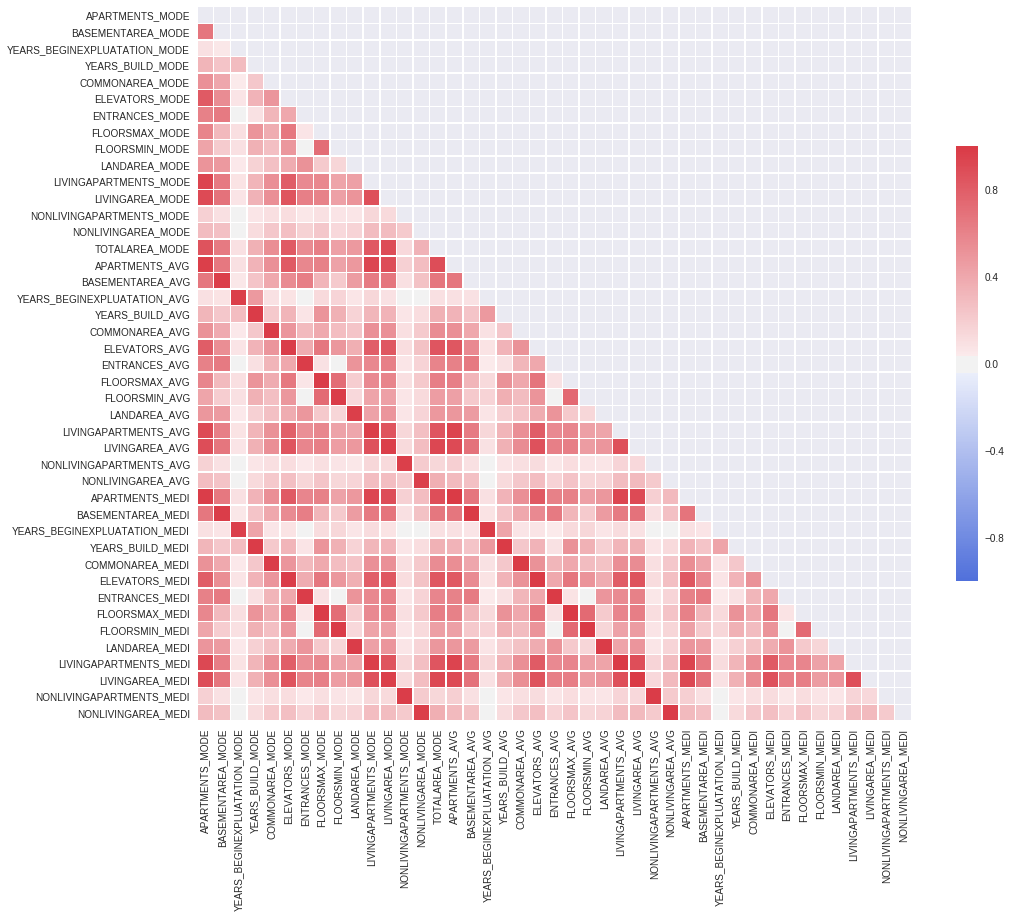

In [0]:
correlations = df_app_train[spec_col].corr()

# Using seaborn package
# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 16))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations, mask=mask, cmap=cmap, vmin = -1, vmax= 1 , center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#correlations

# Category


In [0]:
statistical_analyzing(df_app_train[cate_cols])

No. observations: 307511
No. features: 47


col_type          n_unique          n_miss  \
name                                                                     
NAME_TYPE_SUITE               object         7 (0.00%)    1292 (0.42%)   
NAME_INCOME_TYPE              object         8 (0.00%)       0 (0.00%)   
NAME_CONTRACT_TYPE            object         2 (0.00%)       0 (0.00%)   
NAME_EDUCATION_TYPE           object         5 (0.00%)       0 (0.00%)   
ORGANIZATION_TYPE             object        58 (0.02%)       0 (0.00%)   
OCCUPATION_TYPE               object        18 (0.01%)  96391 (31.35%)   
CODE_GENDER                   object         3 (0.00%)       0 (0.00%)   
NAME_FAMILY_STATUS            object         6 (0.00%)       0 (0.00%)   
NAME_HOUSING_TYPE             object         6 (0.00%)       0 (0.00%)   
WEEKDAY_APPR_PROCESS_START    object         7 (0.00%)       0 (0.00%)   
FLAG_DOCUMENT_5                int64         2 (0.00%)       0 (0.00%)   
FLAG_DOCUMENT_16               int64         2 (0.00%)       0 (0.00%)   
FLAG_PHONE                     int64         2 (0.00%)       0 (0.00%)   
FLAG_DOCUMENT_11               int64         2 (0.00%)       0 (0.00%)   
FLAG_EMAIL                     int64         2 (0.00%)       0 (0.00%)   
FLAG_EMP_PHONE                 int64         2 (0.00%)       0 (0.00%)   
FLAG_DOCUMENT_17               int64         2 (0.00%)       0 (0.00%)   
FLAG_DOCUMENT_19               int64         2 (0.00%)       0 (0.00%)   
FLAG_MOBIL                     int64         2 (0.00%)       0 (0.00%)   
FLAG_DOCUMENT_3                int64         2 (0.00%)       0 (0.00%)   
FLAG_CONT_MOBILE               int64         2 (0.00%)       0 (0.00%)   
FLAG_DOCUMENT_6                int64         2 (0.00%)       0 (0.00%)   
FLAG_DOCUMENT_18               int64         2 (0.00%)       0 (0.00%)   
FLAG_OWN_CAR                  object         2 (0.00%)       0 (0.00%)   
FLAG_DOCUMENT_2                int64         2 (0.00%)       0 (0.00%)   
FLAG_DOCUMENT_7                int64         2 (0.00%)       0 (0.00%)   
FLAG_DOCUMENT_9                int64         2 (0.00%)       0 (0.00%)   
FLAG_DOCUMENT_15               int64         2 (0.00%)       0 (0.00%)   
FLAG_DOCUMENT_14               int64         2 (0.00%)       0 (0.00%)   
FLAG_DOCUMENT_8                int64         2 (0.00%)       0 (0.00%)   
FLAG_DOCUMENT_21               int64         2 (0.00%)       0 (0.00%)   
FLAG_DOCUMENT_13               int64         2 (0.00%)       0 (0.00%)   
FLAG_DOCUMENT_12               int64         2 (0.00%)       0 (0.00%)   
FLAG_DOCUMENT_4                int64         2 (0.00%)       0 (0.00%)   
FLAG_DOCUMENT_20               int64         2 (0.00%)       0 (0.00%)   
FLAG_OWN_REALTY               object         2 (0.00%)       0 (0.00%)   
FLAG_WORK_PHONE                int64         2 (0.00%)       0 (0.00%)   
FLAG_DOCUMENT_10               int64         2 (0.00%)       0 (0.00%)   
REG_CITY_NOT_WORK_CITY         int64         2 (0.00%)       0 (0.00%)   
REG_REGION_NOT_WORK_REGION     int64         2 (0.00%)       0 (0.00%)   
REG_REGION_NOT_LIVE_REGION     int64         2 (0.00%)       0 (0.00%)   
LIVE_REGION_NOT_WORK_REGION    int64         2 (0.00%)       0 (0.00%)   
LIVE_CITY_NOT_WORK_CITY        int64         2 (0.00%)       0 (0.00%)   
REG_CITY_NOT_LIVE_CITY         int64         2 (0.00%)       0 (0.00%)   
REGION_RATING_CLIENT           int64         3 (0.00%)       0 (0.00%)   
REGION_RATING_CLIENT_W_CITY    int64         3 (0.00%)       0 (0.00%)   
SK_ID_CURR                     int64  307511 (100.00%)       0 (0.00%)   

                               n_zeros      n_neg       25%       50%  \
name                                                                    
NAME_TYPE_SUITE              0 (0.00%)  0 (0.00%)       0.0       0.0   
NAME_INCOME_TYPE             0 (0.00%)  0 (0.00%)       0.0       0.0   
NAME_CONTRACT_TYPE           0 (0.00%)  0 (0.00%)       0.0       0.0   
NAME_EDUCATION_TYPE          0 (0.00

### TARGET

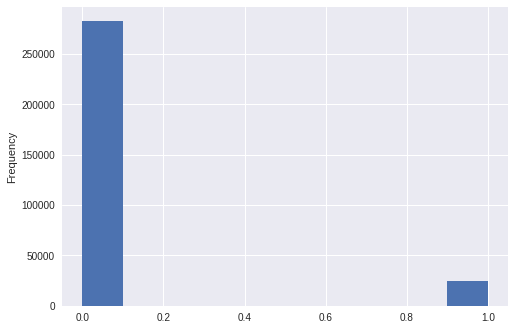

In [0]:
df_app_train['TARGET'].astype(int).plot.hist();

### CODE_GENDER

Column name: CODE_GENDER


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


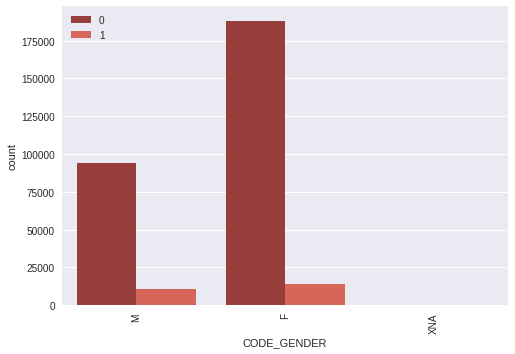

CPU times: user 472 ms, sys: 93 ms, total: 565 ms
Wall time: 442 ms


In [0]:
# saw distinct values in gender = 3, should check it
%%time
cols= ['CODE_GENDER']
plot_categorical(cols, "TARGET", df_app_train)

In [0]:
# Adjusting feature
# remove 4 people with XNA code gender
df_app_train = df_app_train[df_app_train['CODE_GENDER'] != 'XNA']  

### _TYPE

- 'NAME_CONTRACT_TYPE', 2 contract types are cash loans, and revolving loans.
- 'NAME_TYPE_SUITE', almost clients are unaccompanied 
- 'NAME_INCOME_TYPE',
- 'NAME_EDUCATION_TYPE', almost customers have higher secondary education 
- 'NAME_HOUSING_TYPE', client's housing type, house and appartment takes largest proportion.
- 'OCCUPATION_TYPE',
- 'ORGANIZATION_TYPE'

Column name: NAME_CONTRACT_TYPE


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


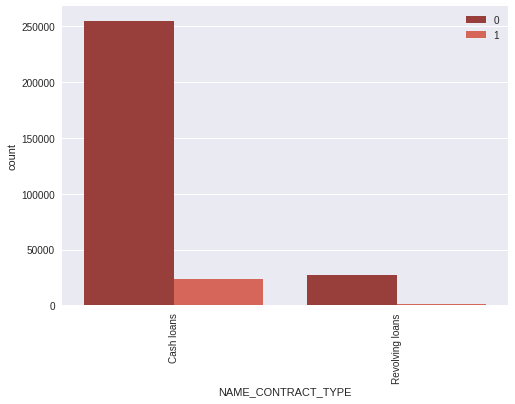

Column name: NAME_TYPE_SUITE


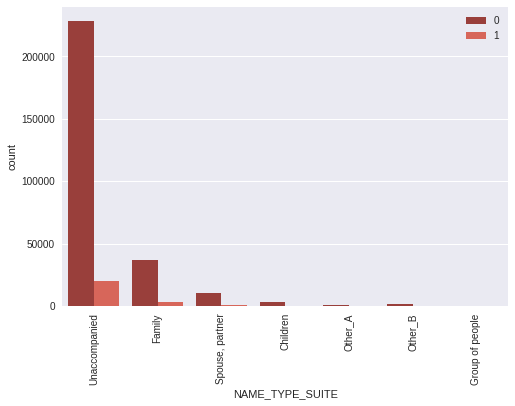

Column name: NAME_INCOME_TYPE


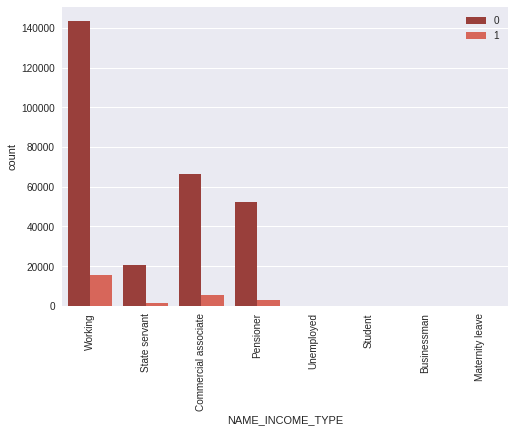

Column name: NAME_EDUCATION_TYPE


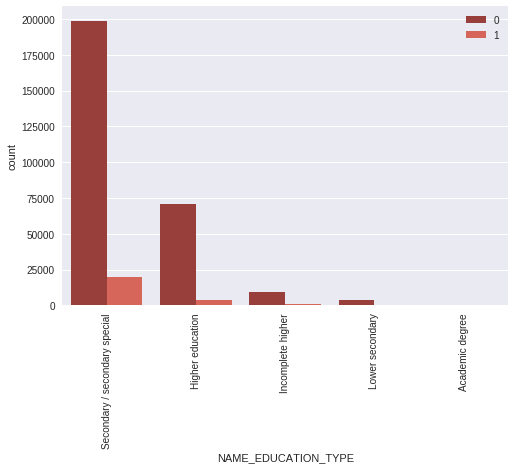

Column name: NAME_HOUSING_TYPE


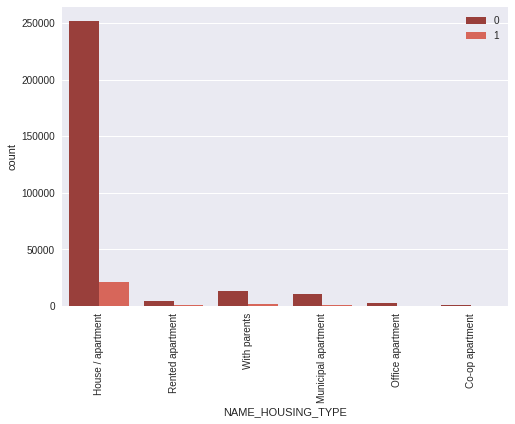

Column name: OCCUPATION_TYPE


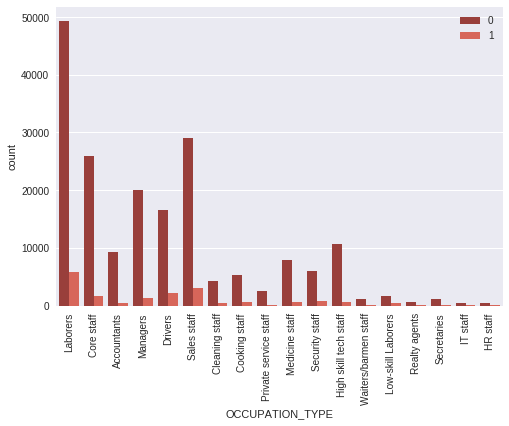

Column name: ORGANIZATION_TYPE


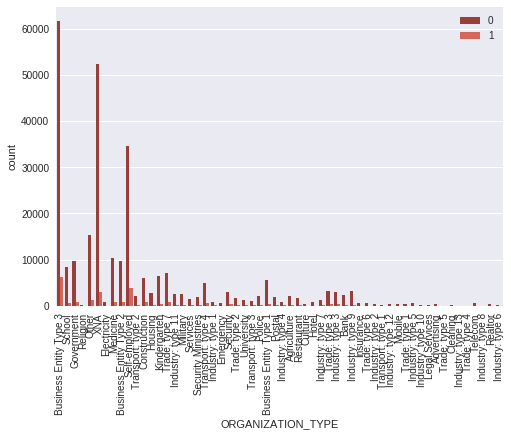

CPU times: user 4.83 s, sys: 1.14 s, total: 5.97 s
Wall time: 4.62 s


In [0]:
%%time
c_categorical= ['NAME_CONTRACT_TYPE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
                 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
                 'ORGANIZATION_TYPE']
plot_categorical(c_categorical, "TARGET", df_app_train)

### Others
holding only 0 and 1, the meaning can be expressed as 0 is No and 1 is Yes.
- 'WEEKDAY_APPR_PROCESS_START', 
- 'LIVE_REGION_NOT_WORK_REGION',
- 'REG_REGION_NOT_LIVE_REGION',
- 'LIVE_CITY_NOT_WORK_CITY',
- 'REG_REGION_NOT_WORK_REGION', 
- 'REG_CITY_NOT_WORK_CITY',
-  'REG_CITY_NOT_LIVE_CITY', 
- 'REGION_RATING_CLIENT_W_CITY', has similar structure with 'REGION_RATING_CLIENT'

Column name: WEEKDAY_APPR_PROCESS_START


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


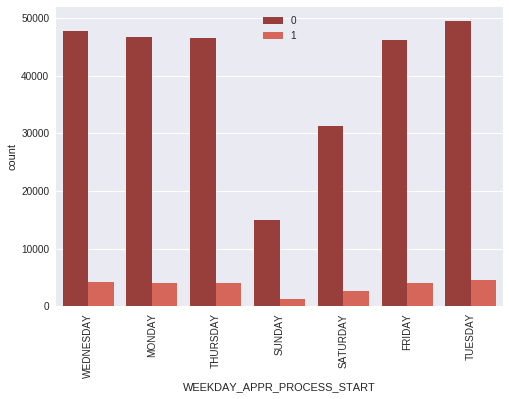

Column name: LIVE_REGION_NOT_WORK_REGION


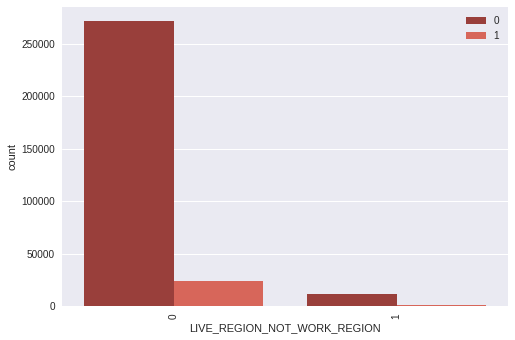

Column name: REG_REGION_NOT_LIVE_REGION


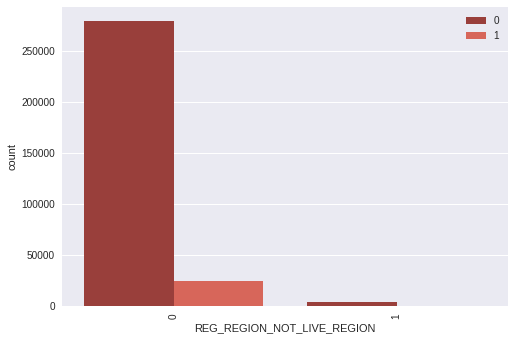

Column name: LIVE_CITY_NOT_WORK_CITY


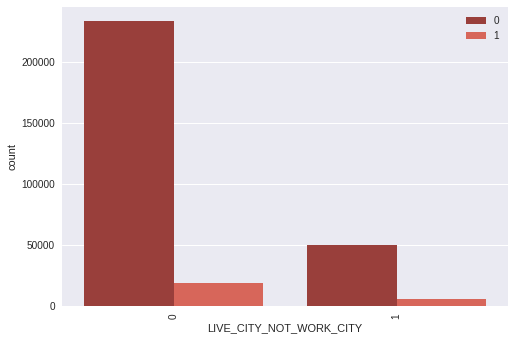

Column name: REG_REGION_NOT_WORK_REGION


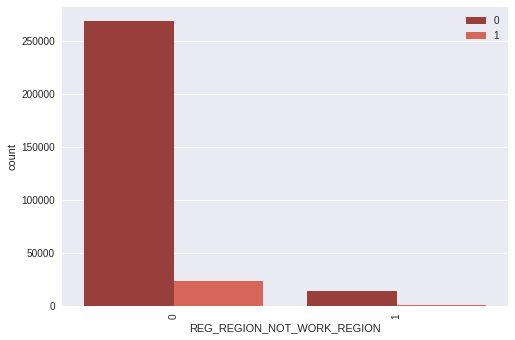

Column name: REG_CITY_NOT_WORK_CITY


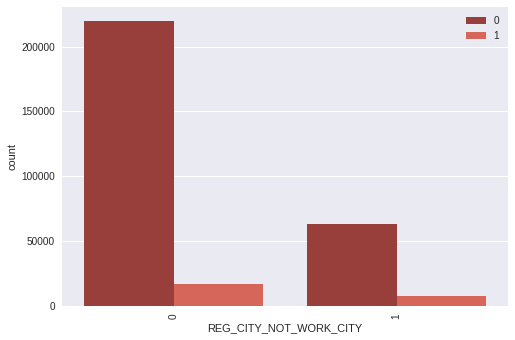

Column name: REG_CITY_NOT_LIVE_CITY


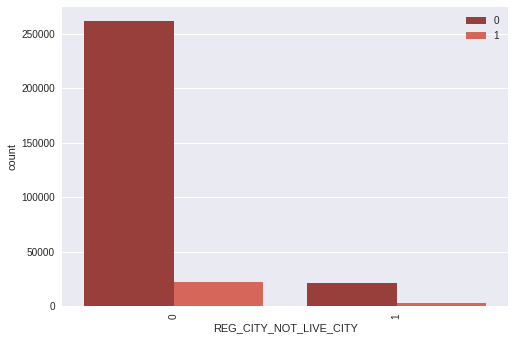

Column name: REGION_RATING_CLIENT_W_CITY


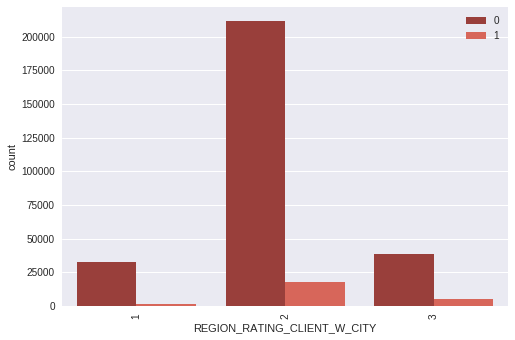

Column name: REGION_RATING_CLIENT


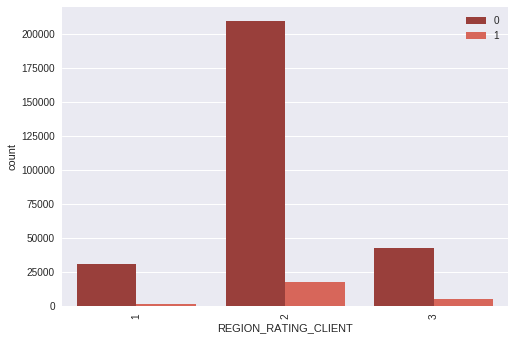

CPU times: user 2.46 s, sys: 1.1 s, total: 3.56 s
Wall time: 2.22 s


In [0]:
#[f for f in df.columns if 'LIVE_' and '_NOT_' in f]+[f for f in df.columns if 'REGION_RATING_' in f]
%%time
c_categorical= ['WEEKDAY_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION',
                'REG_REGION_NOT_LIVE_REGION', 'LIVE_CITY_NOT_WORK_CITY',
                'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_WORK_CITY',
                'REG_CITY_NOT_LIVE_CITY', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT']
plot_categorical(c_categorical, "TARGET", df_app_train)

### FLAG_DOC 
- holding only 0 and 1, the meaning can be expressed as 0 is No and 1 is Yes.
- indicates 21 types of special client's document
- without missing values
- we can generate new features by taking 'multiplication', min', 'max', 'mean', 'nanmedian', 'var', however the values is just 0, 1 then this is meaningless when taking new features follows this way. Because of that we just take sum of all ext_sources with fixed weight and take the kutorsis to see the skew of each row.
- only FLAG_DOCUMENT_3 is totally different with others, it contains more 1 than 0. In other hand, the other features hold almost 0 and really similar with each other.



In [0]:
docs = [f for f in df_app_train[cate_cols].columns if 'FLAG_DOC' in f]
docs
statistical_analyzing(df_app_train[cate_cols][docs])
# these cols contains just 0 or 1 

No. observations: 307511
No. features: 20


col_type   n_unique     n_miss    n_zeros      n_neg  25%  \
name                                                                         
FLAG_DOCUMENT_5     int64  2 (0.00%)  0 (0.00%)  0 (0.00%)  0 (0.00%)  0.0   
FLAG_DOCUMENT_16    int64  2 (0.00%)  0 (0.00%)  0 (0.00%)  0 (0.00%)  0.0   
FLAG_DOCUMENT_11    int64  2 (0.00%)  0 (0.00%)  0 (0.00%)  0 (0.00%)  0.0   
FLAG_DOCUMENT_17    int64  2 (0.00%)  0 (0.00%)  0 (0.00%)  0 (0.00%)  0.0   
FLAG_DOCUMENT_19    int64  2 (0.00%)  0 (0.00%)  0 (0.00%)  0 (0.00%)  0.0   
FLAG_DOCUMENT_3     int64  2 (0.00%)  0 (0.00%)  0 (0.00%)  0 (0.00%)  0.0   
FLAG_DOCUMENT_6     int64  2 (0.00%)  0 (0.00%)  0 (0.00%)  0 (0.00%)  0.0   
FLAG_DOCUMENT_18    int64  2 (0.00%)  0 (0.00%)  0 (0.00%)  0 (0.00%)  0.0   
FLAG_DOCUMENT_2     int64  2 (0.00%)  0 (0.00%)  0 (0.00%)  0 (0.00%)  0.0   
FLAG_DOCUMENT_7     int64  2 (0.00%)  0 (0.00%)  0 (0.00%)  0 (0.00%)  0.0   
FLAG_DOCUMENT_9     int64  2 (0.00%)  0 (0.00%)  0 (0.00%)  0 (0.00%)  0.0   
FLAG_DOCUMENT_15    int64  2 (0.00%)  0 (0.00%)  0 (0.00%)  0 (0.00%)  0.0   
FLAG_DOCUMENT_14    int64  2 (0.00%)  0 (0.00%)  0 (0.00%)  0 (0.00%)  0.0   
FLAG_DOCUMENT_8     int64  2 (0.00%)  0 (0.00%)  0 (0.00%)  0 (0.00%)  0.0   
FLAG_DOCUMENT_21    int64  2 (0.00%)  0 (0.00%)  0 (0.00%)  0 (0.00%)  0.0   
FLAG_DOCUMENT_13    int64  2 (0.00%)  0 (0.00%)  0 (0.00%)  0 (0.00%)  0.0   
FLAG_DOCUMENT_12    int64  2 (0.00%)  0 (0.00%)  0 (0.00%)  0 (0.00%)  0.0   
FLAG_DOCUMENT_4     int64  2 (0.00%)  0 (0.00%)  0 (0.00%)  0 (0.00%)  0.0   
FLAG_DOCUMENT_20    int64  2 (0.00%)  0 (0.00%)  0 (0.00%)  0 (0.00%)  0.0   
FLAG_DOCUMENT_10    int64  2 (0.00%)  0 (0.00%)  0 (0.00%)  0 (0.00%)  0.0   

                  50%  75%     count  max      mean  min       std  sample_0  \
name                                                                           
FLAG_DOCUMENT_5   0.0  0.0  307511.0  1.0  0.015115  0.0  0.122010         0   
FLAG_DOCUMENT_16  0.0  0.0  307511.0  1.0  0.009928  0.0  0.099144         0   
FLAG_DOCUMENT_11  0.0  0.0  307511.0  1.0  0.003912  0.0  0.062424         0   
FLAG_DOCUMENT_17  0.0  0.0  307511.0  1.0  0.000267  0.0  0.016327         0   
FLAG_DOCUMENT_19  0.0  0.0  307511.0  1.0  0.000595  0.0  0.024387         0   
FLAG_DOCUMENT_3   1.0  1.0  307511.0  1.0  0.710023  0.0  0.453752         1   
FLAG_DOCUMENT_6   0.0  0.0  307511.0  1.0  0.088055  0.0  0.283376         0   
FLAG_DOCUMENT_18  0.0  0.0  307511.0  1.0  0.008130  0.0  0.089798         0   
FLAG_DOCUMENT_2   0.0  0.0  307511.0  1.0  0.000042  0.0  0.006502         0   
FLAG_DOCUMENT_7   0.0  0.0  307511.0  1.0  0.000192  0.0  0.013850         0   
FLAG_DOCUMENT_9   0.0  0.0  307511.0  1.0  0.003896  0.0  0.062295         0   
FLAG_DOCUMENT_15  0.0  0.0  307511.0  1.0  0.001210  0.0  0.034760         0   
FLAG_DOCUMENT_14  0.0  0.0  307511.0  1.0  0.002936  0.0  0.054110         0   
FLAG_DOCUMENT_8   0.0  0.0  307511.0  1.0  0.081376  0.0  0.273412         0   
FLAG_DOCUMENT_21  0.0  0.0  307511.0  1.0  0.000335  0.0  0.018299         0   
FLAG_DOCUMENT_13  0.0  0.0  307511.0  1.0  0.003525  0.0  0.059268         0   
FLAG_DOCUMENT_12  0.0  0.0  307511.0  1.0  0.000007  0.0  0.002550         0   
FLAG_DOCUMENT_4   0.0  0.0  307511.0  1.0  0.000081  0.0  0.009016         0   
FLAG_DOCUMENT_20  0.0  0.0  307511.0  1.0  0.000507  0.0  0.022518         0   
FLAG_DOCUMENT_10  0.0  0.0  307511.0  1.0  0.000023  0.0  0.004771         0   

                  sample_1  sample_2  sample_3  sample_4  
name                                                      
FLAG_DOCUMENT_5          0         0         0         0  
FLAG_DOCUMENT_16         0         0         0         0  
FLAG_DOCUMENT_11         0         0         0         0  
FLAG_DOCUMENT_17         0         0         0         0  
FLAG_DOCUMENT_19         0         0         0         0  
FLAG_DOCUMENT_3          1         0         0         1  
FLAG_DOCUMENT_6          0         0         1         0  
FLAG_DOC

Column name: FLAG_DOCUMENT_5


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


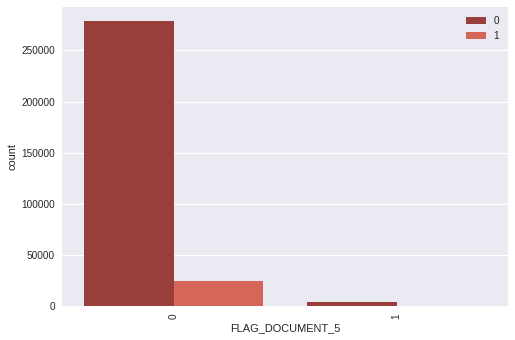

Column name: FLAG_DOCUMENT_16


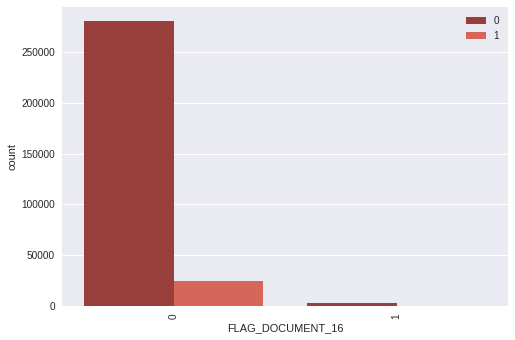

Column name: FLAG_DOCUMENT_11


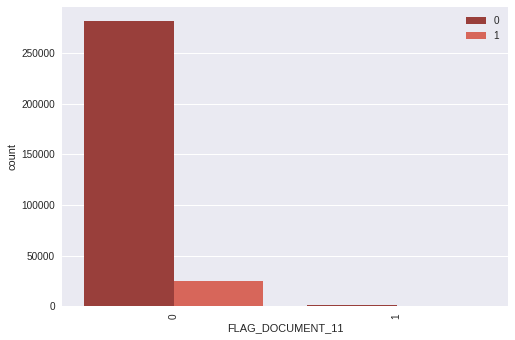

Column name: FLAG_DOCUMENT_17


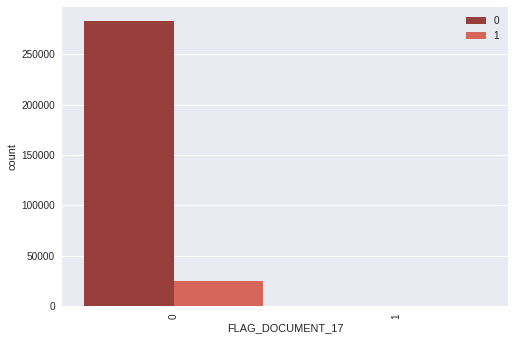

Column name: FLAG_DOCUMENT_19


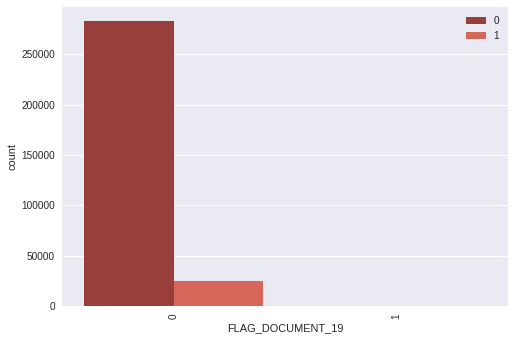

Column name: FLAG_DOCUMENT_3


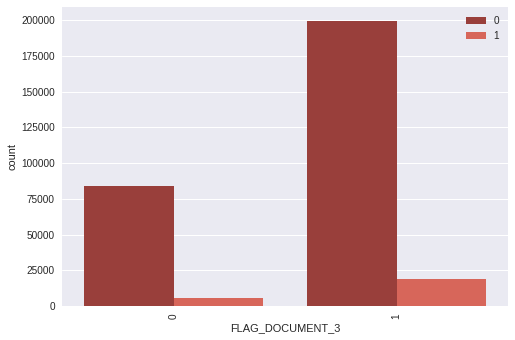

Column name: FLAG_DOCUMENT_6


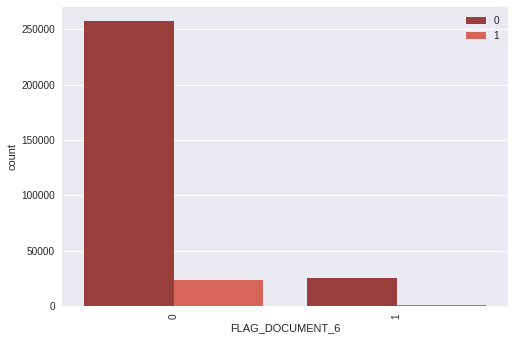

Column name: FLAG_DOCUMENT_18


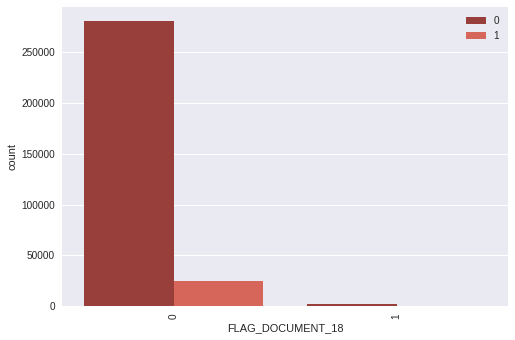

Column name: FLAG_DOCUMENT_2


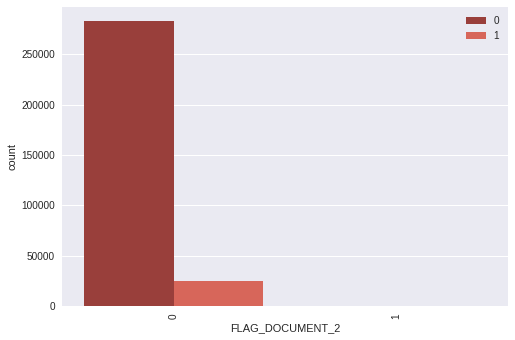

Column name: FLAG_DOCUMENT_7


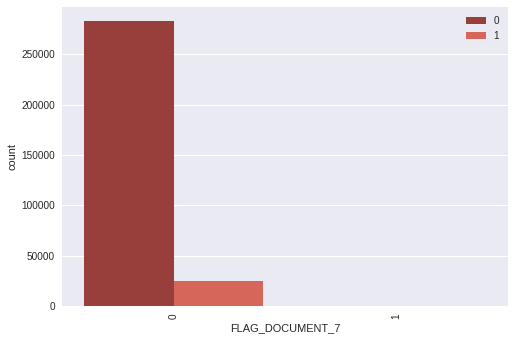

Column name: FLAG_DOCUMENT_9


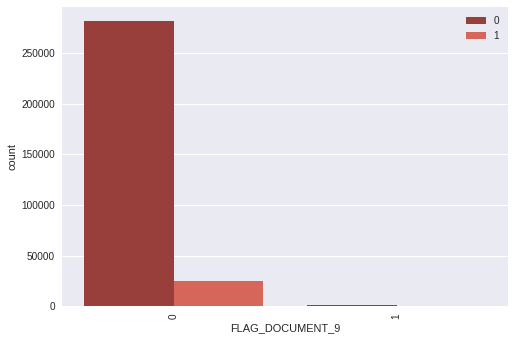

Column name: FLAG_DOCUMENT_15


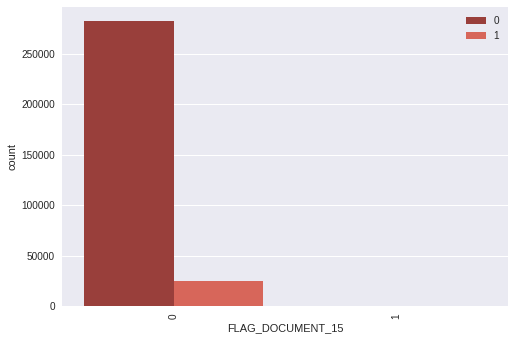

Column name: FLAG_DOCUMENT_14


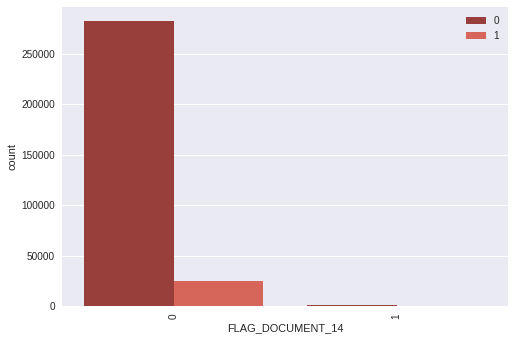

Column name: FLAG_DOCUMENT_8


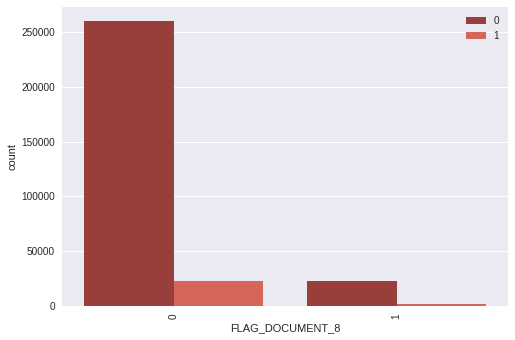

Column name: FLAG_DOCUMENT_21


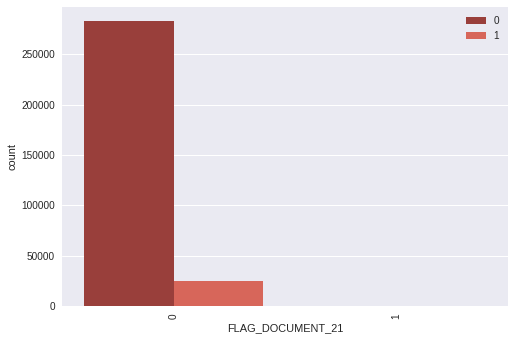

Column name: FLAG_DOCUMENT_13


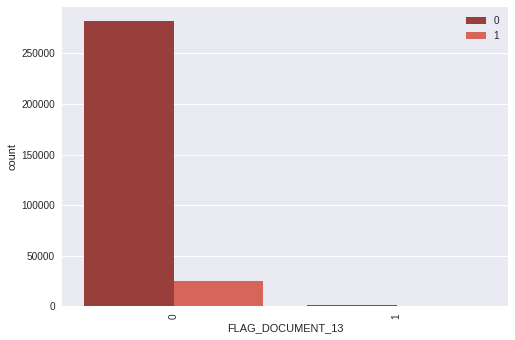

Column name: FLAG_DOCUMENT_12


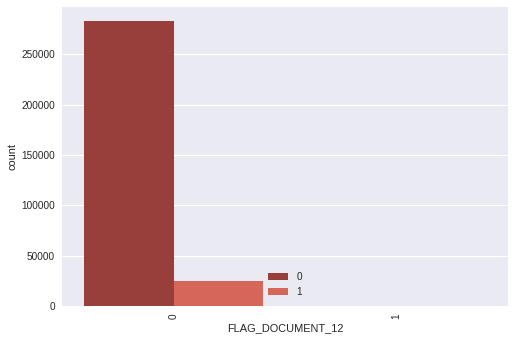

Column name: FLAG_DOCUMENT_4


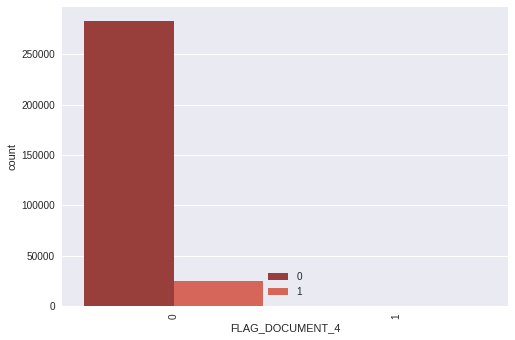

Column name: FLAG_DOCUMENT_20


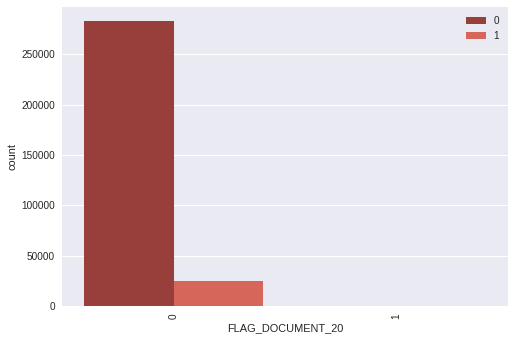

Column name: FLAG_DOCUMENT_10


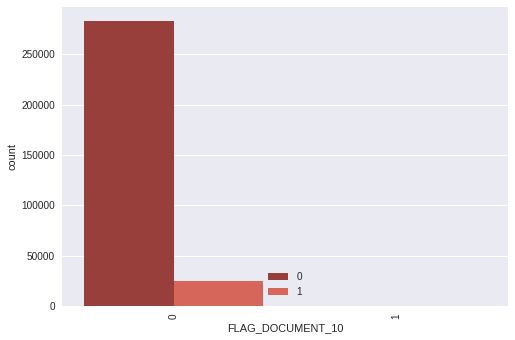

In [0]:
plot_categorical(docs, "TARGET", df_app_train)

In [0]:
# Feature engineering

df_app_train['DOCUMENT_COUNT'] = df_app_train[docs].sum(axis=1)

# kurtosis measures the "peakedness" or "tailedness" of a distribution, and kurtosis involves 
#raising deviations from the mean to the 4th power.
df_app_train['NEW_DOC_KURT'] = df_app_train[docs].kurtosis(axis=1)


### OTHERs FLAG_
- holding only 0 and 1, the meaning can be expressed as 0 is No and 1 is Yes.
- almost clients had mobile phone


In [0]:
oth_flags = [k for k in (f for f in df_app_train.columns 
        if 'FLAG_' in f) if not 'FLAG_DOCUMENT_' in k ]
statistical_analyzing(df_app_train[oth_flags])

No. observations: 307511
No. features: 8


col_type   n_unique     n_miss    n_zeros      n_neg  25%  \
name                                                                         
FLAG_OWN_CAR       object  2 (0.00%)  0 (0.00%)  0 (0.00%)  0 (0.00%)  0.0   
FLAG_OWN_REALTY    object  2 (0.00%)  0 (0.00%)  0 (0.00%)  0 (0.00%)  0.0   
FLAG_MOBIL          int64  2 (0.00%)  0 (0.00%)  0 (0.00%)  0 (0.00%)  1.0   
FLAG_EMP_PHONE      int64  2 (0.00%)  0 (0.00%)  0 (0.00%)  0 (0.00%)  1.0   
FLAG_WORK_PHONE     int64  2 (0.00%)  0 (0.00%)  0 (0.00%)  0 (0.00%)  0.0   
FLAG_CONT_MOBILE    int64  2 (0.00%)  0 (0.00%)  0 (0.00%)  0 (0.00%)  1.0   
FLAG_PHONE          int64  2 (0.00%)  0 (0.00%)  0 (0.00%)  0 (0.00%)  0.0   
FLAG_EMAIL          int64  2 (0.00%)  0 (0.00%)  0 (0.00%)  0 (0.00%)  0.0   

                  50%  75%     count  max      mean  min       std sample_0  \
name                                                                          
FLAG_OWN_CAR      0.0  0.0       0.0  0.0  0.000000  0.0  0.000000        Y   
FLAG_OWN_REALTY   0.0  0.0       0.0  0.0  0.000000  0.0  0.000000        N   
FLAG_MOBIL        1.0  1.0  307511.0  1.0  0.999997  0.0  0.001803        1   
FLAG_EMP_PHONE    1.0  1.0  307511.0  1.0  0.819889  0.0  0.384280        1   
FLAG_WORK_PHONE   0.0  0.0  307511.0  1.0  0.199368  0.0  0.399526        0   
FLAG_CONT_MOBILE  1.0  1.0  307511.0  1.0  0.998133  0.0  0.043164        1   
FLAG_PHONE        0.0  1.0  307511.0  1.0  0.281066  0.0  0.449521        1   
FLAG_EMAIL        0.0  0.0  307511.0  1.0  0.056720  0.0  0.231307        0   

                 sample_1 sample_2 sample_3 sample_4  
name                                                  
FLAG_OWN_CAR            N        N        N        N  
FLAG_OWN_REALTY         Y        Y        Y        N  
FLAG_MOBIL              1        1        1        1  
FLAG_EMP_PHONE          0        1        1        1  
FLAG_WORK_PHONE         0        0        0        0  
FLAG_CONT_MOBILE        1        1        1        1  
FLAG_PHONE              0        0        0        0  
FLAG_EMAIL              0        0        0        0

Column name: FLAG_OWN_CAR


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


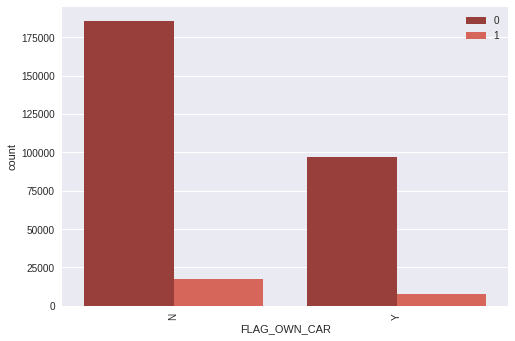

Column name: FLAG_OWN_REALTY


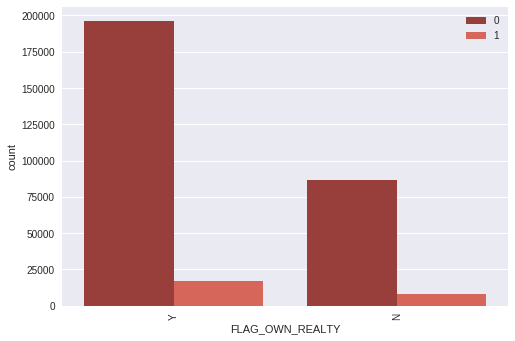

Column name: FLAG_MOBIL


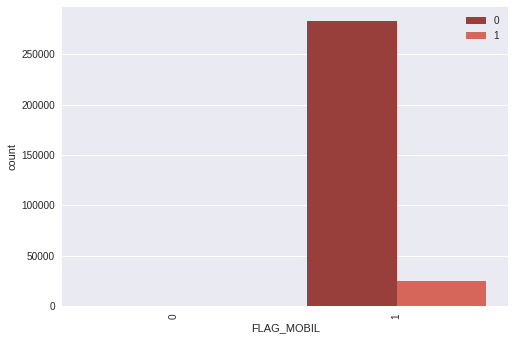

Column name: FLAG_EMP_PHONE


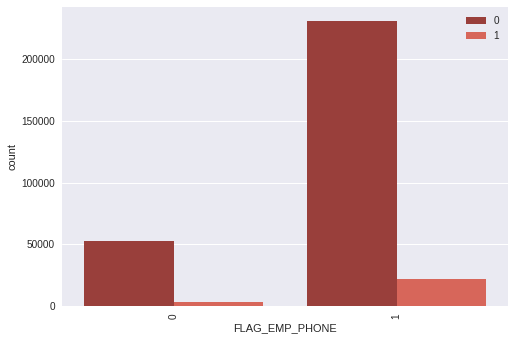

Column name: FLAG_WORK_PHONE


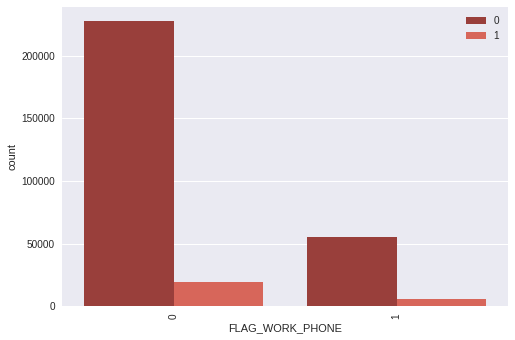

Column name: FLAG_CONT_MOBILE


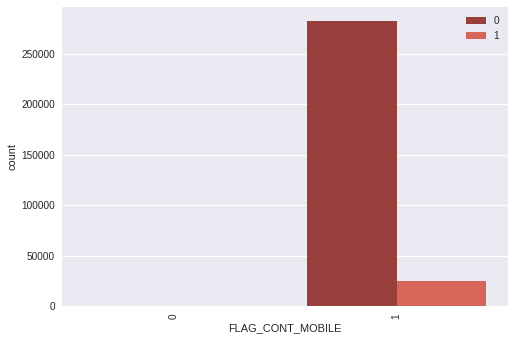

Column name: FLAG_PHONE


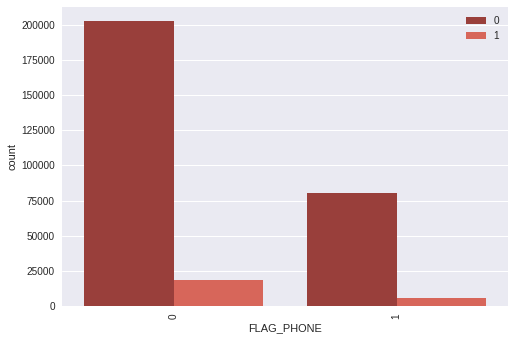

Column name: FLAG_EMAIL


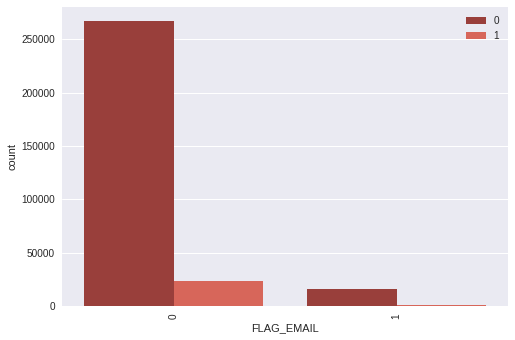

In [0]:
plot_categorical(oth_flags, "TARGET", df_app_train)

# Continous

In [0]:
cons_cols.sort()
statistical_analyzing(df_app_train[cons_cols])
# df_explore_cate = statistical_analyzing(df_app_train[cons_cols])
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#   print(cons_cols)
#   print(df_explore_cate)

No. observations: 307511
No. features: 29


col_type          n_unique           n_miss  \
name                                                                     
AMT_ANNUITY                 float64     13672 (4.45%)       12 (0.00%)   
AMT_CREDIT                  float64      5603 (1.82%)        0 (0.00%)   
AMT_GOODS_PRICE             float64      1002 (0.33%)      278 (0.09%)   
AMT_INCOME_TOTAL            float64      2548 (0.83%)        0 (0.00%)   
AMT_REQ_CREDIT_BUREAU_DAY   float64         9 (0.00%)   41519 (13.50%)   
AMT_REQ_CREDIT_BUREAU_HOUR  float64         5 (0.00%)   41519 (13.50%)   
AMT_REQ_CREDIT_BUREAU_MON   float64        24 (0.01%)   41519 (13.50%)   
AMT_REQ_CREDIT_BUREAU_QRT   float64        11 (0.00%)   41519 (13.50%)   
AMT_REQ_CREDIT_BUREAU_WEEK  float64         9 (0.00%)   41519 (13.50%)   
AMT_REQ_CREDIT_BUREAU_YEAR  float64        25 (0.01%)   41519 (13.50%)   
CNT_CHILDREN                  int64        15 (0.00%)        0 (0.00%)   
CNT_FAM_MEMBERS             float64        17 (0.01%)        2 (0.00%)   
DAYS_BIRTH                    int64     17460 (5.68%)        0 (0.00%)   
DAYS_EMPLOYED                 int64     12574 (4.09%)        0 (0.00%)   
DAYS_ID_PUBLISH               int64      6168 (2.01%)        0 (0.00%)   
DAYS_LAST_PHONE_CHANGE      float64      3773 (1.23%)        1 (0.00%)   
DAYS_REGISTRATION           float64     15688 (5.10%)        0 (0.00%)   
DEF_30_CNT_SOCIAL_CIRCLE    float64        10 (0.00%)     1021 (0.33%)   
DEF_60_CNT_SOCIAL_CIRCLE    float64         9 (0.00%)     1021 (0.33%)   
EXT_SOURCE_1                float64   114584 (37.26%)  173378 (56.38%)   
EXT_SOURCE_2                float64   119831 (38.97%)      660 (0.21%)   
EXT_SOURCE_3                float64       814 (0.26%)   60965 (19.83%)   
HOUR_APPR_PROCESS_START       int64        24 (0.01%)        0 (0.00%)   
OBS_30_CNT_SOCIAL_CIRCLE    float64        33 (0.01%)     1021 (0.33%)   
OBS_60_CNT_SOCIAL_CIRCLE    float64        33 (0.01%)     1021 (0.33%)   
OWN_CAR_AGE                 float64        62 (0.02%)  202929 (65.99%)   
REGION_POPULATION_RELATIVE  float64        81 (0.03%)        0 (0.00%)   
SK_ID_CURR                    int64  307511 (100.00%)        0 (0.00%)   
TARGET                        int64         2 (0.00%)        0 (0.00%)   

                              n_zeros             n_neg            25%  \
name                                                                     
AMT_ANNUITY                 0 (0.00%)         0 (0.00%)   16524.000000   
AMT_CREDIT                  0 (0.00%)         0 (0.00%)  270000.000000   
AMT_GOODS_PRICE             0 (0.00%)         0 (0.00%)  238500.000000   
AMT_INCOME_TOTAL            0 (0.00%)         0 (0.00%)  112500.000000   
AMT_REQ_CREDIT_BUREAU_DAY   0 (0.00%)         0 (0.00%)       0.000000   
AMT_REQ_CREDIT_BUREAU_HOUR  0 (0.00%)         0 (0.00%)       0.000000   
AMT_REQ_CREDIT_BUREAU_MON   0 (0.00%)         0 (0.00%)       0.000000   
AMT_REQ_CREDIT_BUREAU_QRT   0 (0.00%)         0 (0.00%)       0.000000   
AMT_REQ_CREDIT_BUREAU_WEEK  0 (0.00%)         0 (0.00%)       0.000000   
AMT_REQ_CREDIT_BUREAU_YEAR  0 (0.00%)         0 (0.00%)       0.000000   
CNT_CHILDREN                0 (0.00%)         0 (0.00%)       0.000000   
CNT_FAM_MEMBERS             0 (0.00%)         0 (0.00%)       2.000000   
DAYS_BIRTH                  0 (0.00%)  307511 (100.00%)  -19682.000000   
DAYS_EMPLOYED               0 (0.00%)   252135 (81.99%)   -2760.000000   
DAYS_ID_PUBLISH             0 (0.00%)   307495 (99.99%)   -4299.000000   
DAYS_LAST_PHONE_CHANGE      0 (0.00%)   269838 (87.75%)   -1570.000000   
DAYS_REGISTRATION           0 (0.00%)   307431 (99.97%)   -7479.500000   
DEF_30_CNT_SOCIAL_CIRCLE    0 (0.00%)         0 (0.00%)       0.000000   
DEF_60_CNT_SOCIAL_CIRCLE    0 (0.00%)         0 (0.00%)       0.000000   
EXT_SOURCE_1                0 (0.00%)         0 (0.00%)       0.334007   
EXT_SOURCE_2                0 (0.00%)         0 (0.00%)       0.392457   
EXT_SOURCE_3                0 

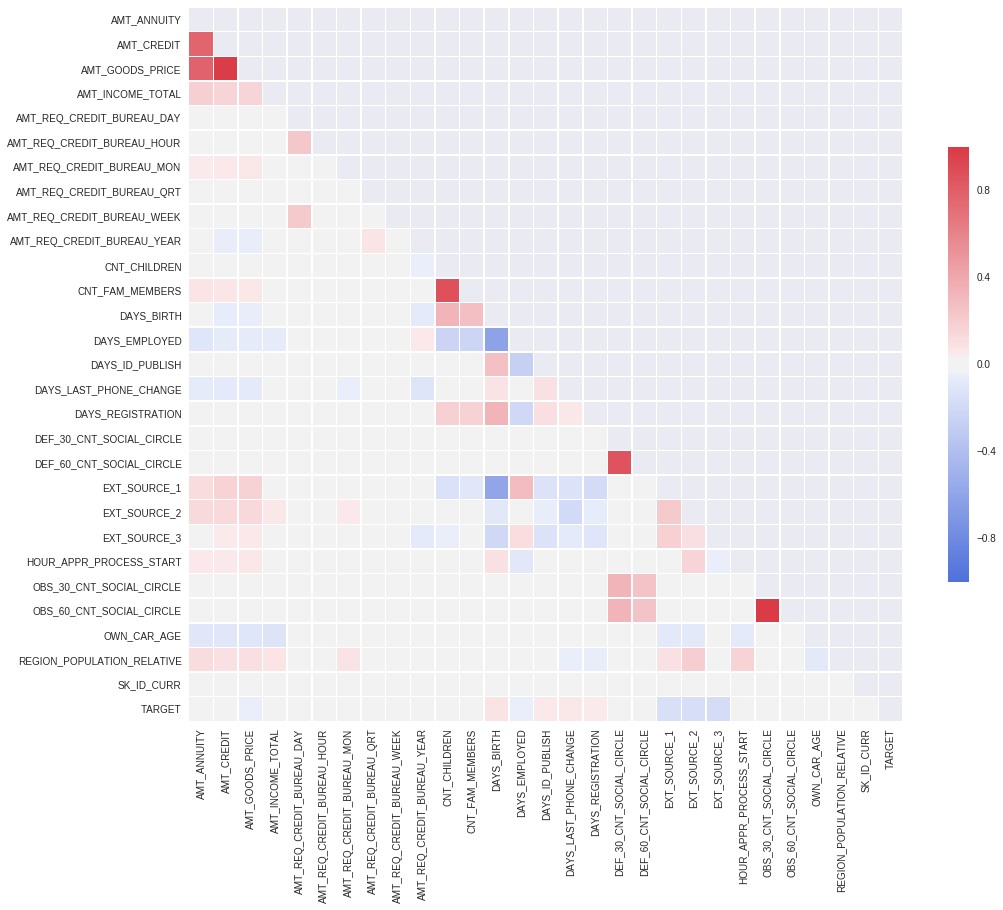

In [0]:
cons_cols.sort()
correlations = df_app_train[cons_cols].corr()

# Using seaborn package
# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 16))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations, mask=mask, cmap=cmap, vmin = -1, vmax= 1 , center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#correlations

Let's take a look at some of more significant correlations with TARGET: 
- DAYS_BIRTH is the most positive correlation. The correlation is positive, but the value of this feature is actually negative, meaning that as the client gets older, they are less likely to default on their loan (ie the target == 0). 

In [0]:
# Find correlations with the target and sort
correlations = df_app_train[cons_cols].corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Positive Correlations:
 CNT_CHILDREN                  0.019187
AMT_REQ_CREDIT_BUREAU_YEAR    0.019930
DEF_60_CNT_SOCIAL_CIRCLE      0.031276
DEF_30_CNT_SOCIAL_CIRCLE      0.032248
OWN_CAR_AGE                   0.037612
DAYS_REGISTRATION             0.041975
DAYS_ID_PUBLISH               0.051457
DAYS_LAST_PHONE_CHANGE        0.055218
DAYS_BIRTH                    0.078239
TARGET                        1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
AMT_CREDIT                   -0.030369
HOUR_APPR_PROCESS_START      -0.024166
AMT_ANNUITY                  -0.012817
AMT_REQ_CREDIT_BUREAU_MON    -0.012462
Name: TARGET, dtype: float64


## EXT_SOURCE_
- All three `EXT_SOURCE` featureshave negative correlations with the target, indicating that as the value of the `EXT_SOURCE` increases, the client is more likely to repay the loan. We can also see that `DAYS_BIRTH` is positively correlated with `EXT_SOURCE_1` indicating that maybe one of the factors in this score is the client age.
- `EXT_SOURCE_3` displays the greatest difference between the values of the target. We can clearly see that this feature has some relationship to the likelihood of an applicant to repay a loan. The relationship is not very strong (in fact they are all considered very weak, but these variables will still be useful for a machine learning model to predict whether or not an applicant will repay a loan on time.
- without missing value, and negative value


In [0]:
ext_data = df_app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']]

def get_apply_extsources(path, num_rows = None):
    """ Process application_train.csv and application_test.csv and return a pandas dataframe. """
    train = pd.read_csv(os.path.join(path, 'application_train.csv'), nrows= num_rows)
    test = pd.read_csv(os.path.join(path, 'application_test.csv'), nrows= num_rows)    
    df = train.append(test)
    del train, test; gc.collect()
    
    df = df[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']]

    return df

In [0]:
# modelling df after added new feature
from contextlib import contextmanager
import time

@contextmanager
def timer(name):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(name, time.time() - t0))

DATA_DIRECTORY = "drive/My Drive/Kaggle/home credit/data/"
#num_rows = 30000 if debug else None
debug = False #True
num_rows = 30000 if debug else None

if __name__ == "__main__":
  with timer("application_train and application_test"):
    df = get_apply_extsources(DATA_DIRECTORY, num_rows= num_rows)
    print("Application dataframe shape: ", df.shape)

Application dataframe shape:  (356255, 4)
application_train and application_test - done in 8s


In [0]:
%%time
# Preparing data
train = df[df['TARGET'].notnull()]
test = df[df['TARGET'].isnull()]
print("Train/valid shape: {}, test shape: {}".format(df.shape, test.shape))

# spliting data
del_features = ['TARGET', 'SK_ID_CURR', 'SK_ID_BUREAU', 'SK_ID_PREV', 'index', 'level_0']
predictors = list(filter(lambda v: v not in del_features, train.columns))

y_2 = train['TARGET']
X_2 = train[predictors]

X_acttest = test[predictors]
y_acttest = test['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Extreme Gradient Boosting
param_int = {
    "objective": "binary:logistic",
    "booster": "gbtree",
    "max_depth":4 ,# default: 3 oly for depthwise
    "n_estimators": 500,#2000, # default:500
    "learning_rate": 0.01, #25,# default: 0.05
    "gamma": 0.0,
    "min_child_wweight":10, # default:1
    "subsample":0.7,
    "colsample_bytree": 0.6, # default:1.0
    "colsample_btlevel":0.5, # default:1.0
    "reg_alpha":0.0,
    "reg_lambda":1.0,
    "scale_pse_weight":1.0,
    "random_state":0,
    #
    "silent": True,
    "n_jobs":14,
    #
    "tree_method": "hist", # default: auto
    "grow_policy": "lossguide", # default: depthwise
    "max_leaves": 0, # default: 0 (unlimited)
    "max_bin": 256  # default: 256    
}
param_fit = {
    "eval_metric": "auc",
    "early_stopping_rounds": 500, # default: 10
    "verbose": 100,#200,
    "eval_set": [(X_train,y_train),(X_val,y_val),(X_test,y_test)]
}
xgb_model_2 = xgb.XGBClassifier(**param_int)
xgb_model_2.fit(X_train,y_train, **param_fit)
evals_result = xgb_model_2.evals_result()
evals_result



Train/valid shape: (356255, 4), test shape: (48744, 4)
[0]	validation_0-auc:0.653045	validation_1-auc:0.649697	validation_2-auc:0.659803
Multiple eval metrics have been passed: 'validation_2-auc' will be used for early stopping.

Will train until validation_2-auc hasn't improved in 500 rounds.
[100]	validation_0-auc:0.722769	validation_1-auc:0.717537	validation_2-auc:0.723299
[200]	validation_0-auc:0.724735	validation_1-auc:0.71872	validation_2-auc:0.724004
[300]	validation_0-auc:0.725718	validation_1-auc:0.719305	validation_2-auc:0.724692
[400]	validation_0-auc:0.726515	validation_1-auc:0.719602	validation_2-auc:0.724893
[499]	validation_0-auc:0.72704	validation_1-auc:0.719658	validation_2-auc:0.725053
CPU times: user 1min 19s, sys: 6.25 s, total: 1min 25s
Wall time: 48.8 s


In [0]:
ext_data = df_app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']]
statistical_analyzing(ext_data)


No. observations: 307511
No. features: 4


col_type         n_unique           n_miss    n_zeros      n_neg  \
name                                                                            
TARGET          int64        2 (0.00%)        0 (0.00%)  0 (0.00%)  0 (0.00%)   
EXT_SOURCE_1  float64  114584 (37.26%)  173378 (56.38%)  0 (0.00%)  0 (0.00%)   
EXT_SOURCE_2  float64  119831 (38.97%)      660 (0.21%)  0 (0.00%)  0 (0.00%)   
EXT_SOURCE_3  float64      814 (0.26%)   60965 (19.83%)  0 (0.00%)  0 (0.00%)   

                   25%       50%       75%     count       max      mean  \
name                                                                       
TARGET        0.000000  0.000000  0.000000  307511.0  1.000000  0.080729   
EXT_SOURCE_1  0.334007  0.505998  0.675053  134133.0  0.962693  0.502130   
EXT_SOURCE_2  0.392457  0.565961  0.663617  306851.0  0.855000  0.514393   
EXT_SOURCE_3  0.370650  0.535276  0.669057  246546.0  0.896010  0.510853   

                       min       std  sample_0  sample_1  sample_2  sample_3  \
name                                                                           
TARGET        0.000000e+00  0.272419  0.000000  0.000000  0.000000  0.000000   
EXT_SOURCE_1  1.456813e-02  0.211062       NaN       NaN       NaN  0.873501   
EXT_SOURCE_2  8.173617e-08  0.191060  0.722621  0.419232  0.657454  0.682562   
EXT_SOURCE_3  5.272652e-04  0.194844  0.565608  0.670652  0.515495  0.438281   

              sample_4  
name                    
TARGET        0.000000  
EXT_SOURCE_1       NaN  
EXT_SOURCE_2  0.606258  
EXT_SOURCE_3  0.787476

In [0]:
ext_data.corr()

TARGET  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3
TARGET        1.000000     -0.155317     -0.160472     -0.178919
EXT_SOURCE_1 -0.155317      1.000000      0.213982      0.186846
EXT_SOURCE_2 -0.160472      0.213982      1.000000      0.109167
EXT_SOURCE_3 -0.178919      0.186846      0.109167      1.000000

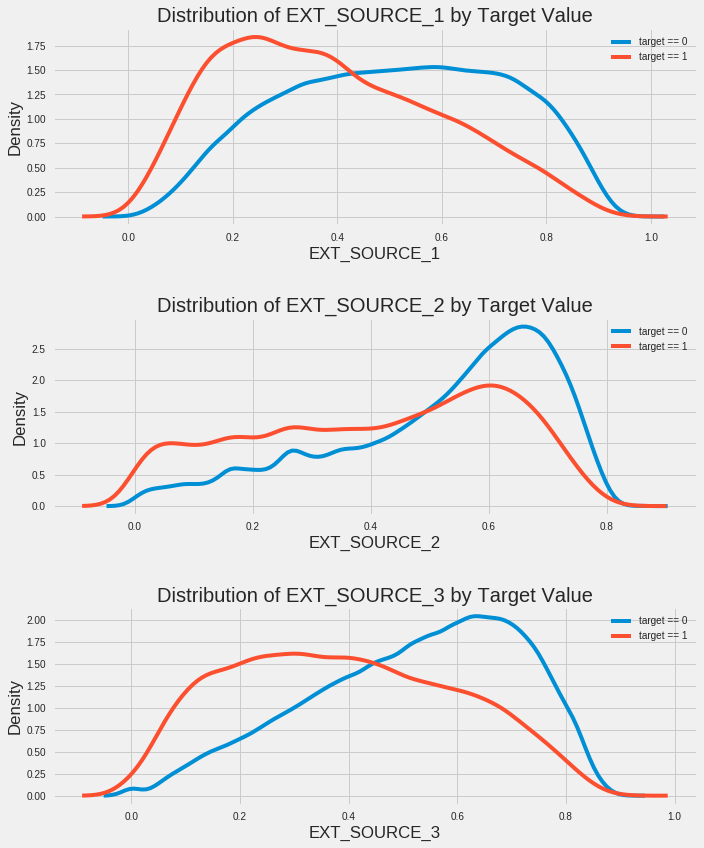

In [0]:
plt.figure(figsize = (10, 12))
cols = [f for f in ext_data.columns if 'EXT_SOURCE_' in f]
n= len(cols)
# iterate through the sources
for i, source in enumerate(cols):    
    # create a new subplot for each source
    plt.subplot(n, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(ext_data.loc[ext_data['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(ext_data.loc[ext_data['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');    
plt.tight_layout(h_pad = 2.5)

In [0]:
"""
after run XGboost model and estimating important feature, these EXT_SOURCE are the
most infortant features, therefore, we need to expand these features to 
entirely explore the information inside.

"""

ext_data['EXT_SOURCES_PROD'] = ext_data['EXT_SOURCE_1'] * ext_data['EXT_SOURCE_2'] * ext_data['EXT_SOURCE_3']
#np.warnings.filterwarnings('ignore', r'All-NaN (slice|axis) encountered')
for function_name in ['min', 'max', 'mean', 'nanmedian', 'var']:
  feature_name = 'EXT_SOURCES_{}'.format(function_name.upper())
  ext_data[feature_name] = eval('np.{}'.format(function_name))(
      ext_data[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']], axis=1)
  
ext_data['EXT_SOURCES_WEIGHTED'] = (ext_data.EXT_SOURCE_1.copy().fillna(0)  * 2 
                                    + ext_data.EXT_SOURCE_2.copy().fillna(0) * 1 
                                    + ext_data.EXT_SOURCE_3.copy().fillna(0) * 3)


In [0]:
statistical_analyzing(ext_data)

No. observations: 307511
No. features: 11


col_type         n_unique           n_miss    n_zeros  \
name                                                                          
TARGET                   int64        2 (0.00%)        0 (0.00%)  0 (0.00%)   
EXT_SOURCE_1           float64  114584 (37.26%)  173378 (56.38%)  0 (0.00%)   
EXT_SOURCE_2           float64  119831 (38.97%)      660 (0.21%)  0 (0.00%)   
EXT_SOURCE_3           float64      814 (0.26%)   60965 (19.83%)  0 (0.00%)   
EXT_SOURCES_PROD       float64  109589 (35.64%)  197922 (64.36%)  0 (0.00%)   
EXT_SOURCES_MIN        float64  139146 (45.25%)      172 (0.06%)  0 (0.00%)   
EXT_SOURCES_MAX        float64  121113 (39.38%)      172 (0.06%)  0 (0.00%)   
EXT_SOURCES_MEAN       float64  300347 (97.67%)      172 (0.06%)  0 (0.00%)   
EXT_SOURCES_NANMEDIAN  float64  246589 (80.19%)      172 (0.06%)  0 (0.00%)   
EXT_SOURCES_VAR        float64  269868 (87.76%)      172 (0.06%)  0 (0.00%)   
EXT_SOURCES_WEIGHTED   float64  300348 (97.67%)        0 (0.00%)  0 (0.00%)   

                           n_neg       25%       50%       75%     count  \
name                                                                       
TARGET                 0 (0.00%)  0.000000  0.000000  0.000000  307511.0   
EXT_SOURCE_1           0 (0.00%)  0.334007  0.505998  0.675053  134133.0   
EXT_SOURCE_2           0 (0.00%)  0.392457  0.565961  0.663617  306851.0   
EXT_SOURCE_3           0 (0.00%)  0.370650  0.535276  0.669057  246546.0   
EXT_SOURCES_PROD       0 (0.00%)  0.056106  0.119932  0.210126  109589.0   
EXT_SOURCES_MIN        0 (0.00%)  0.253963  0.403167  0.553013  307339.0   
EXT_SOURCES_MAX        0 (0.00%)  0.540654  0.648470  0.725276  307339.0   
EXT_SOURCES_MEAN       0 (0.00%)  0.413648  0.524502  0.622819  307339.0   
EXT_SOURCES_NANMEDIAN  0 (0.00%)  0.409737  0.532456  0.634190  307339.0   
EXT_SOURCES_VAR        0 (0.00%)  0.001128  0.007972  0.023749  307339.0   
EXT_SOURCES_WEIGHTED   0 (0.00%)  1.443489  2.232460  2.879504  307511.0   

                            max      mean           min       std  sample_0  \
name                                                                          
TARGET                 1.000000  0.080729  0.000000e+00  0.272419  0.000000   
EXT_SOURCE_1           0.962693  0.502130  1.456813e-02  0.211062       NaN   
EXT_SOURCE_2           0.855000  0.514393  8.173617e-08  0.191060  0.594147   
EXT_SOURCE_3           0.896010  0.510853  5.272652e-04  0.194844  0.484851   
EXT_SOURCES_PROD       0.618557  0.143315  2.430332e-07  0.107598       NaN   
EXT_SOURCES_MIN        0.878903  0.399582  8.173617e-08  0.187425  0.484851   
EXT_SOURCES_MAX        0.962693  0.615882  5.939651e-06  0.156130  0.594147   
EXT_SOURCES_MEAN       0.878903  0.509251  5.939651e-06  0.149802  0.539499   
EXT_SOURCES_NANMEDIAN  0.885488  0.512289  5.939651e-06  0.157391  0.539499   
EXT_SOURCES_VAR        0.212515  0.016370  0.000000e+00  0.021193  0.002986   
EXT_SOURCES_WEIGHTED   5.220172  2.180060  0.000000e+00  1.049816  2.048702   

                       sample_1  sample_2  sample_3  sample_4  
name                                                           
TARGET                 0.000000  0.000000  0.000000  0.000000  
EXT_SOURCE_1           0.474080  0.099183       NaN  0.774785  
EXT_SOURCE_2           0.648316  0.273133  0.605558  0.299945  
EXT_SOURCE_3           0.422370  0.090221       NaN  0.701696  
EXT_SOURCES_PROD       0.129817  0.002444       NaN  0.163069  
EXT_SOURCES_MIN        0.422370  0.090221  0.605558  0.299945  
EXT_SOURCES_MAX        0.648316  0.273133  0.605558  0.774785  
EXT_SOURCES_MEAN       0.514922  0.154179  0.605558  0.592142  
EXT_SOURCES_NANMEDIAN  0.474080  0.099183  0.605558  0.701696  
EXT_SOURCES_VAR        0.009343  0.007088  0.000000  0.043580  
EXT_SOURCES_WEIGHTED   2.863584  0.742162  0.605558  3.954602

In [0]:
ext_data.corr()['TARGET'].sort_values()

EXT_SOURCES_MEAN        -0.222052
EXT_SOURCES_NANMEDIAN   -0.218118
EXT_SOURCES_MAX         -0.196876
EXT_SOURCES_PROD        -0.188552
EXT_SOURCES_MIN         -0.185266
EXT_SOURCE_3            -0.178919
EXT_SOURCE_2            -0.160472
EXT_SOURCES_WEIGHTED    -0.155944
EXT_SOURCE_1            -0.155317
EXT_SOURCES_VAR          0.033577
TARGET                   1.000000
Name: TARGET, dtype: float64

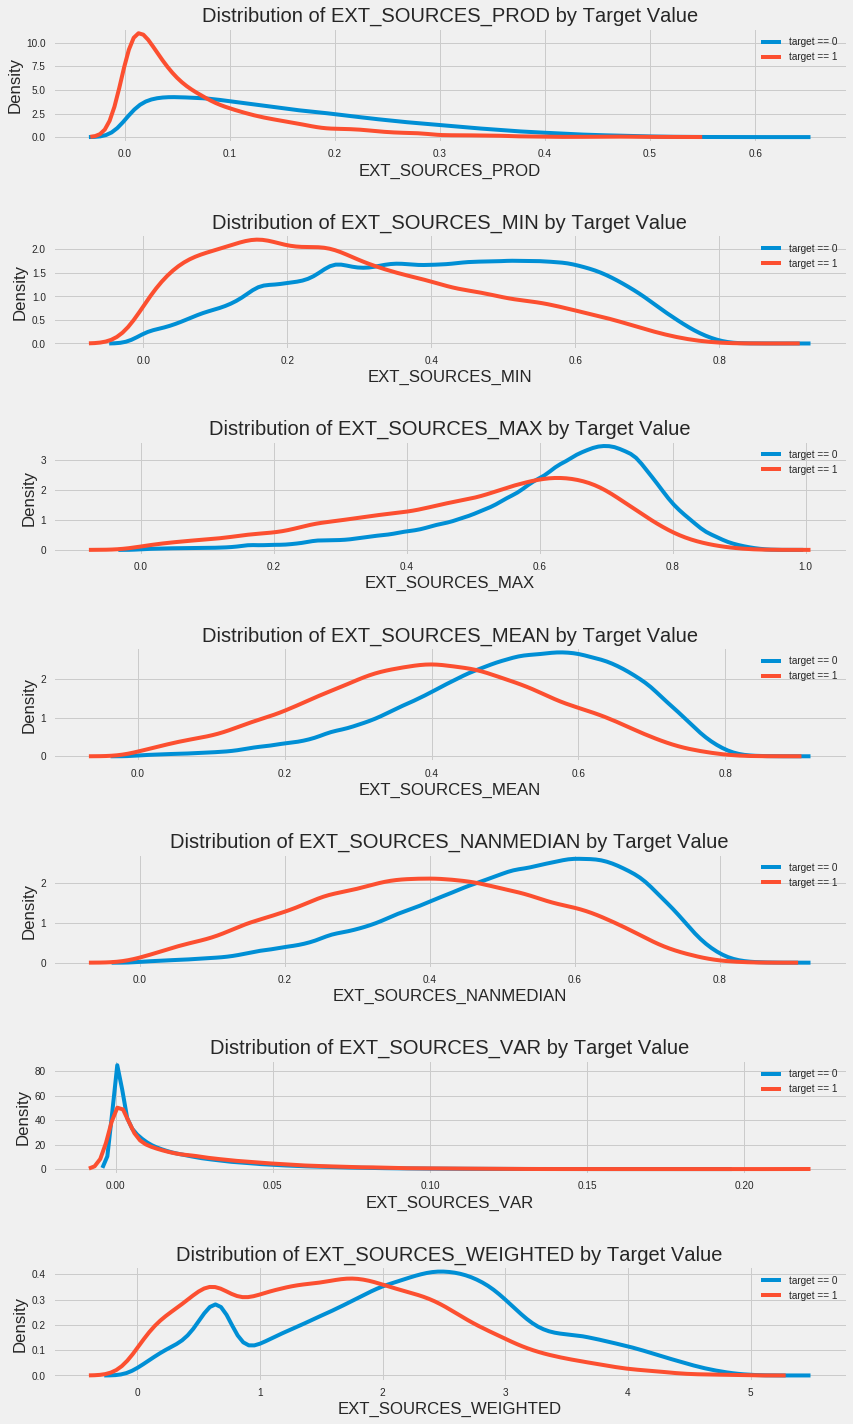

In [0]:
plt.figure(figsize = (12, 20))
cols = [f for f in ext_data.columns if 'EXT_SOURCES_' in f]
n= len(cols)
# iterate through the sources
for i, source in enumerate(cols):    
    # create a new subplot for each source
    plt.subplot(n, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(ext_data.loc[ext_data['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(ext_data.loc[ext_data['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');    
plt.tight_layout(h_pad = 2.5)

##  DAYS_




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 6 columns):
DAYS_BIRTH                307511 non-null int64
DAYS_EMPLOYED             307511 non-null int64
DAYS_REGISTRATION         307511 non-null float64
DAYS_ID_PUBLISH           307511 non-null int64
DAYS_LAST_PHONE_CHANGE    307510 non-null float64
OWN_CAR_AGE               104582 non-null float64
dtypes: float64(3), int64(3)
memory usage: 14.1 MB
          DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  307511.000000  307511.000000      307511.000000    307511.000000   
mean   -16036.995067   63815.045904       -4986.120328     -2994.202373   
std      4363.988632  141275.766519        3522.886321      1509.450419   
min    -25229.000000  -17912.000000      -24672.000000     -7197.000000   
25%    -19682.000000   -2760.000000       -7479.500000     -4299.000000   
50%    -15750.000000   -1213.000000       -4504.000000     -3254.000000   
75%    -12413.000000

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
No handles with labels found to put in legend.


Column name: DAYS_BIRTH
> No.outliner: 0 



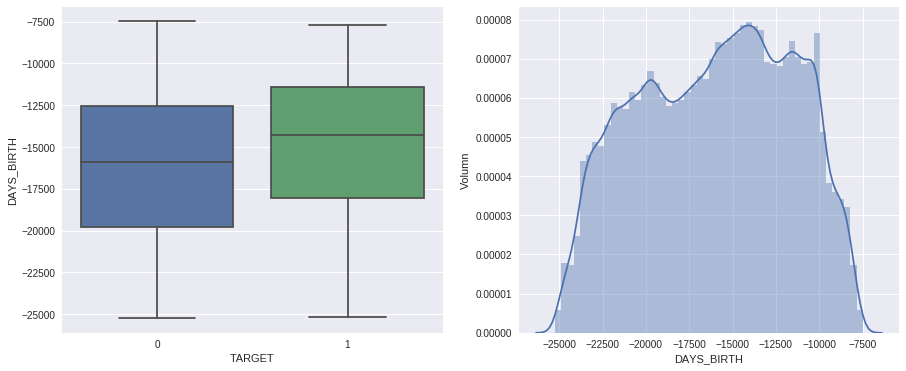

No handles with labels found to put in legend.


Column name: DAYS_EMPLOYED
> No.outliner: 72217 



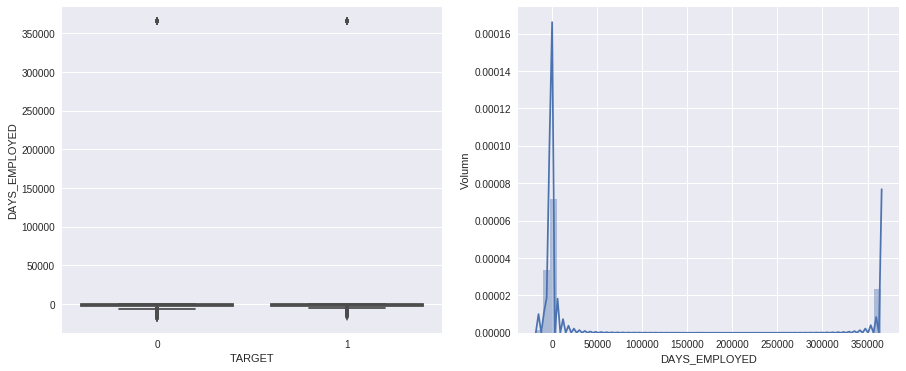

No handles with labels found to put in legend.


Column name: DAYS_REGISTRATION
> No.outliner: 659 



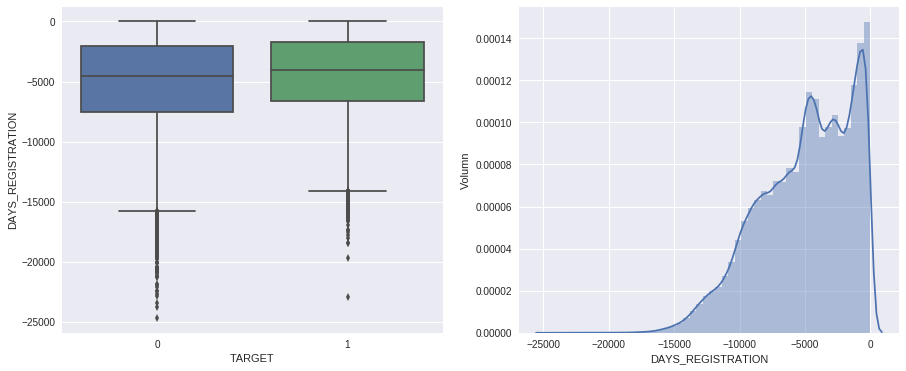

No handles with labels found to put in legend.


Column name: DAYS_ID_PUBLISH
> No.outliner: 0 



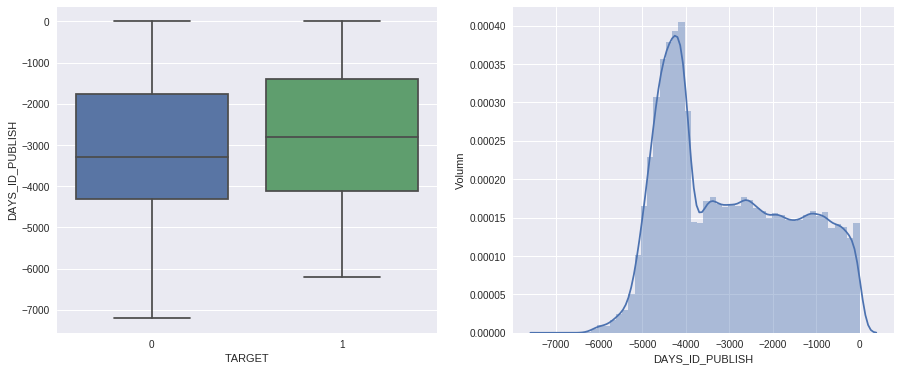

No handles with labels found to put in legend.


Column name: DAYS_LAST_PHONE_CHANGE
> No.outliner: 435 



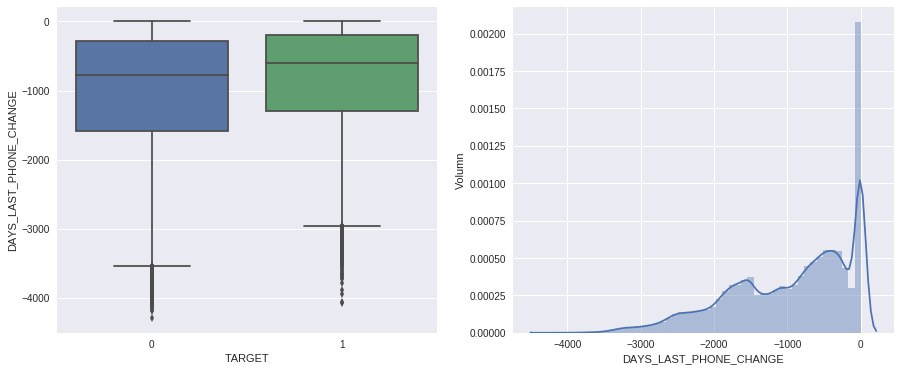

No handles with labels found to put in legend.


Column name: OWN_CAR_AGE
> No.outliner: 4932 



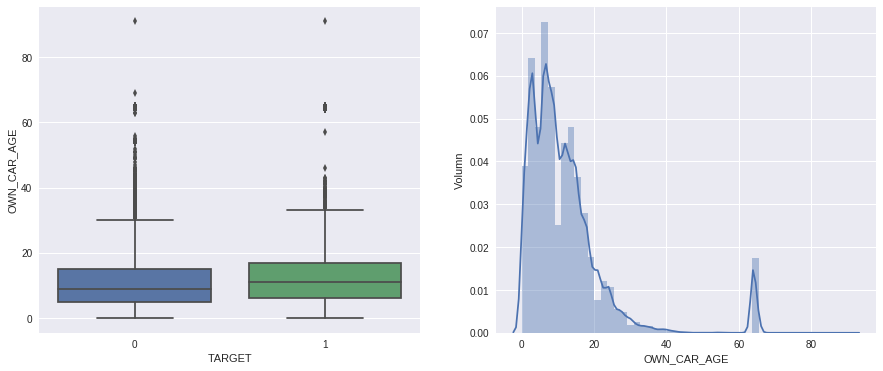

In [0]:

cols = ["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH"
              ,"DAYS_LAST_PHONE_CHANGE","OWN_CAR_AGE"]
df_app_train[cols].info()
print(df_app_train[cols].describe())
plot_continous(cols, "TARGET", df_app_train)

 

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 7 columns):
DAYS_BIRTH                307511 non-null int64
DAYS_EMPLOYED             252137 non-null float64
DAYS_REGISTRATION         307431 non-null float64
DAYS_ID_PUBLISH           307495 non-null float64
DAYS_LAST_PHONE_CHANGE    269838 non-null float64
OWN_CAR_AGE               104582 non-null float64
TARGET                    307511 non-null int64
dtypes: float64(5), int64(2)
memory usage: 16.4 MB
          DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  307511.000000  252137.000000      307431.000000    307495.000000   
mean   -16036.995067   -2384.169325       -4987.417821     -2994.358172   
std      4363.988632    2338.360162        3522.426211      1509.335153   
min    -25229.000000  -17912.000000      -24672.000000     -7197.000000   
25%    -19682.000000   -3175.000000       -7480.000000     -4299.000000   
50%    -15750.000000   -1648.000000       -

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
No handles with labels found to put in legend.


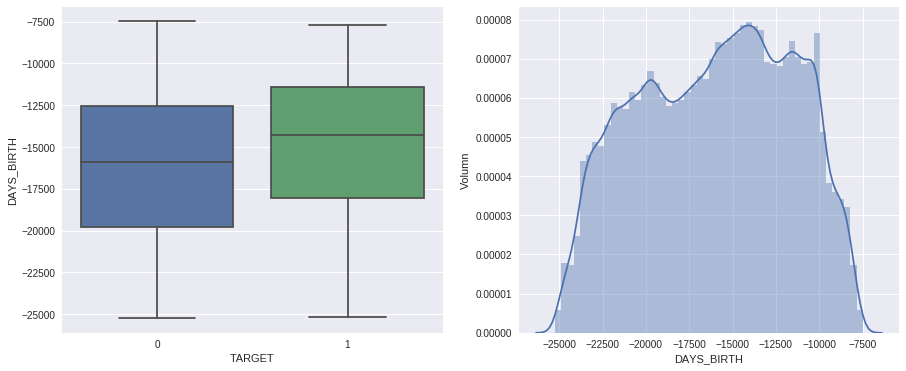

No handles with labels found to put in legend.


Column name: DAYS_EMPLOYED
> No.outliner: 15149 



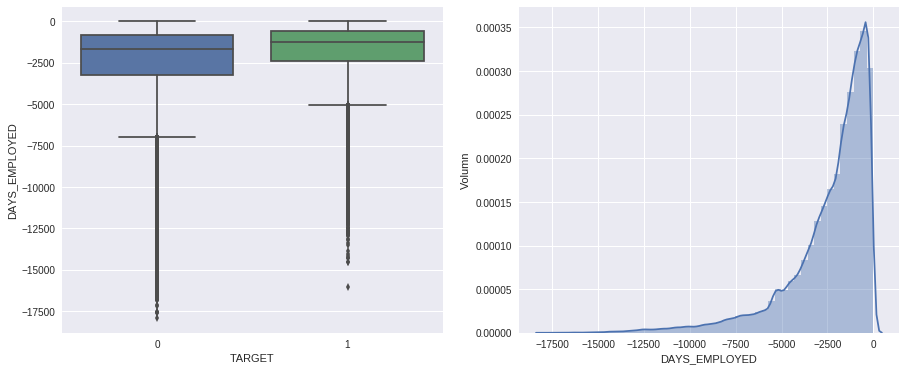

No handles with labels found to put in legend.


Column name: DAYS_REGISTRATION
> No.outliner: 659 



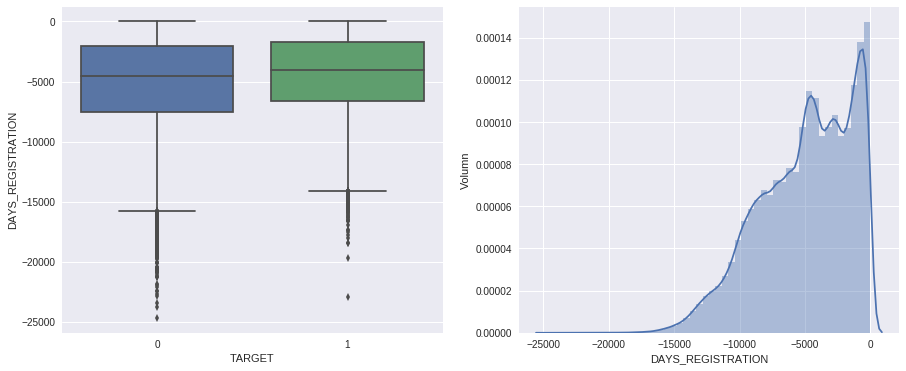

No handles with labels found to put in legend.


Column name: DAYS_ID_PUBLISH
> No.outliner: 0 



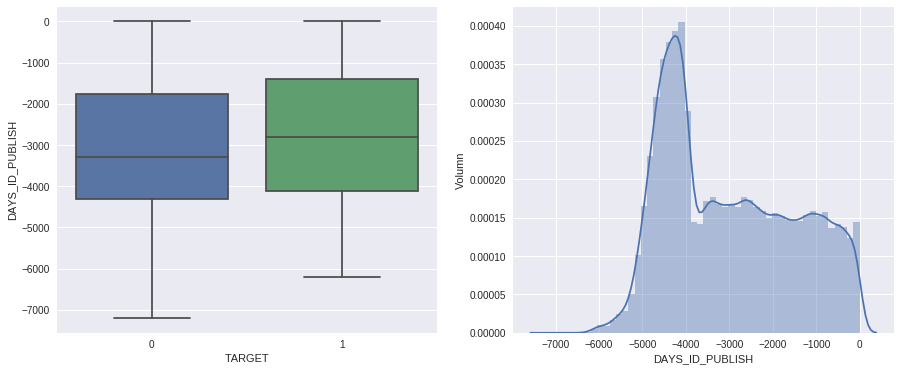

No handles with labels found to put in legend.


Column name: DAYS_LAST_PHONE_CHANGE
> No.outliner: 506 



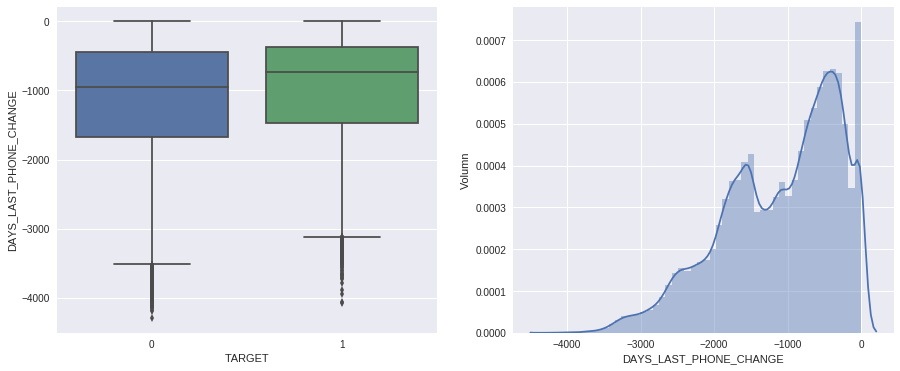

No handles with labels found to put in legend.


Column name: OWN_CAR_AGE
> No.outliner: 4932 



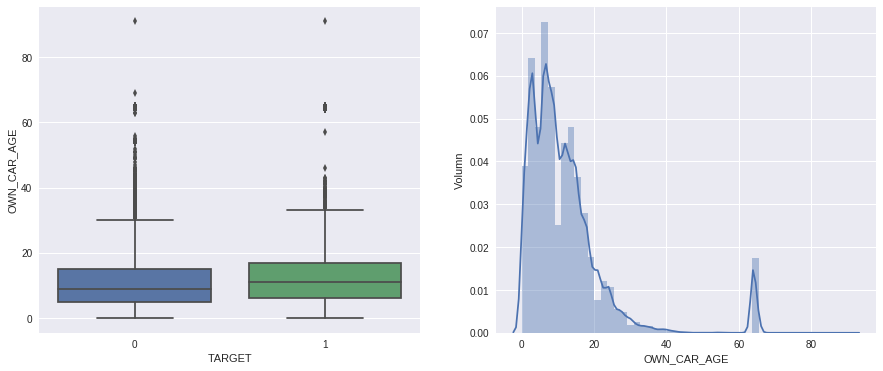

No handles with labels found to put in legend.


Column name: TARGET
> No.outliner: 24825 



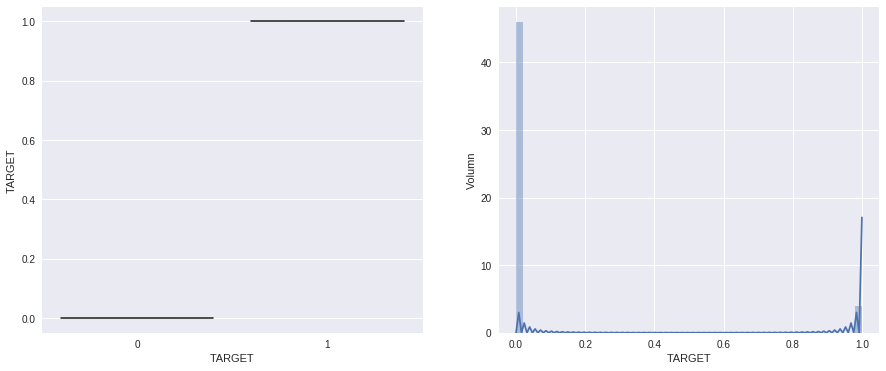

In [0]:
"""
after run important feature 1st
generating new features as 'min', 'max', 'mean', 'nanmedian', 'var', however it 
is just 0,1 so this is meaningless when taking new features follows this way
,or may be taking the sum of all ext_sources with fixed weight
"""

days = ["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH"
              ,"DAYS_LAST_PHONE_CHANGE","OWN_CAR_AGE","TARGET"]
df_days = df_app_train[days]
df_days['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)
df_days['DAYS_LAST_PHONE_CHANGE'].replace(0, np.nan, inplace=True)
df_days['DAYS_ID_PUBLISH'].replace(0, np.nan, inplace=True)
df_days['DAYS_REGISTRATION'].replace(0, np.nan, inplace=True)

df_days[days].info()
print(df_days[days].describe())
plot_continous(days, "TARGET", df_days)

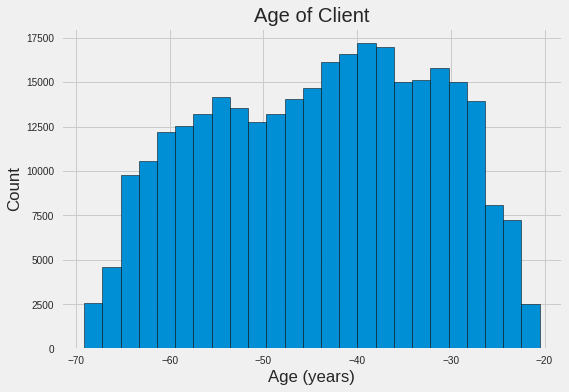

In [0]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(df_app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

A kernel density estimate plot shows the distribution of a single variable and can be thought of as a smoothed histogram (it is created by computing a kernel, usually a Gaussian, at each data point and then averaging all the individual kernels to develop a single smooth curve). We will use the seaborn `kdeplot` for this graph.

The `target == 1` curve skews towards the younger end of the range. Although this is not a significant correlation (`-0.07 correlation coefficient`), this variable is likely going to be useful in a machine learning model because it does affect the target

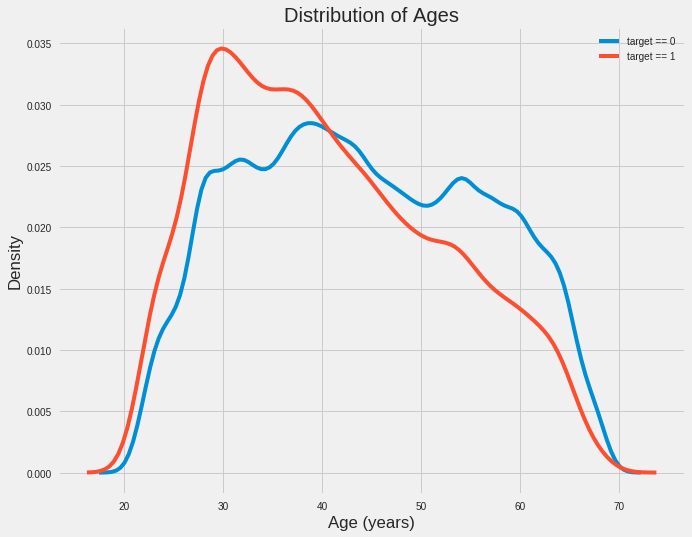

In [0]:
plt.figure(figsize = (10, 8))
# KDE plot of loans that were repaid on time
sns.kdeplot(df_app_train.loc[df_app_train['TARGET'] == 0, 'DAYS_BIRTH'] / -365, label = 'target == 0')
# KDE plot of loans which were not repaid on time
sns.kdeplot(df_app_train.loc[df_app_train['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label = 'target == 1')
# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

### check with DAYS from previous dataset

In [0]:
def group(df_to_agg, prefix, aggregations, aggregate_by= 'SK_ID_CURR'):
  """Grouping by SK_ID_CURR with formated aggregations """
  agg_df = df_to_agg.groupby(aggregate_by).agg(aggregations)
  # change columns names
  agg_df.columns = pd.Index(['{}{}_{}'.format(prefix, e[0], e[1].upper())
                             for e in agg_df.columns.tolist()])
  return agg_df.reset_index()

In [0]:
days = ["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH"
              ,"DAYS_LAST_PHONE_CHANGE","OWN_CAR_AGE","SK_ID_CURR"]
df_days = df_app_train[days]
df_days.info()
statistical_analyzing(df_days)
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 7 columns):
DAYS_BIRTH                307511 non-null int64
DAYS_EMPLOYED             307511 non-null int64
DAYS_REGISTRATION         307511 non-null float64
DAYS_ID_PUBLISH           307511 non-null int64
DAYS_LAST_PHONE_CHANGE    307510 non-null float64
OWN_CAR_AGE               104582 non-null float64
SK_ID_CURR                307511 non-null int64
dtypes: float64(3), int64(4)
memory usage: 16.4 MB
No. observations: 307511
No. features: 7


col_type          n_unique           n_miss    n_zeros  \
name                                                                            
DAYS_BIRTH                int64     17460 (5.68%)        0 (0.00%)  0 (0.00%)   
DAYS_EMPLOYED             int64     12574 (4.09%)        0 (0.00%)  0 (0.00%)   
DAYS_REGISTRATION       float64     15688 (5.10%)        0 (0.00%)  0 (0.00%)   
DAYS_ID_PUBLISH           int64      6168 (2.01%)        0 (0.00%)  0 (0.00%)   
DAYS_LAST_PHONE_CHANGE  float64      3773 (1.23%)        1 (0.00%)  0 (0.00%)   
OWN_CAR_AGE             float64        62 (0.02%)  202929 (65.99%)  0 (0.00%)   
SK_ID_CURR                int64  307511 (100.00%)        0 (0.00%)  0 (0.00%)   

                                   n_neg       25%       50%       75%  \
name                                                                     
DAYS_BIRTH              307511 (100.00%)  -19682.0  -15750.0  -12413.0   
DAYS_EMPLOYED            252135 (81.99%)   -2760.0   -1213.0    -289.0   
DAYS_REGISTRATION        307431 (99.97%)   -7479.5   -4504.0   -2010.0   
DAYS_ID_PUBLISH          307495 (99.99%)   -4299.0   -3254.0   -1720.0   
DAYS_LAST_PHONE_CHANGE   269838 (87.75%)   -1570.0    -757.0    -274.0   
OWN_CAR_AGE                    0 (0.00%)       5.0       9.0      15.0   
SK_ID_CURR                     0 (0.00%)  189145.5  278202.0  367142.5   

                           count       max           mean       min  \
name                                                                  
DAYS_BIRTH              307511.0   -7489.0  -16036.995067  -25229.0   
DAYS_EMPLOYED           307511.0  365243.0   63815.045904  -17912.0   
DAYS_REGISTRATION       307511.0       0.0   -4986.120328  -24672.0   
DAYS_ID_PUBLISH         307511.0       0.0   -2994.202373   -7197.0   
DAYS_LAST_PHONE_CHANGE  307510.0       0.0    -962.858788   -4292.0   
OWN_CAR_AGE             104582.0      91.0      12.061091       0.0   
SK_ID_CURR              307511.0  456255.0  278180.518577  100002.0   

                                  std  sample_0  sample_1  sample_2  sample_3  \
name                                                                            
DAYS_BIRTH                4363.988632  -19615.0  -15457.0  -11516.0  -17614.0   
DAYS_EMPLOYED           141275.766519  365243.0   -1776.0   -1132.0   -5163.0   
DAYS_REGISTRATION         3522.886321   -3146.0   -9399.0   -2843.0   -4772.0   
DAYS_ID_PUBLISH           1509.450419   -3143.0   -4633.0   -2926.0   -1147.0   
DAYS_LAST_PHONE_CHANGE     826.808487   -2167.0    -190.0    -486.0       0.0   
OWN_CAR_AGE                 11.944812       NaN       3.0       NaN       NaN   
SK_ID_CURR              102790.175348  198109.0  314910.0  237429.0  372678.0   

                        sample_4  
name                              
DAYS_BIRTH              -15977.0  
DAYS_EMPLOYED            -2419.0  
DAYS_REGISTRATION        -8319.0  
DAYS_ID_PUBLISH          -4628.0  
DAYS_LAST_PHONE_CHANGE    -487.0  
OWN_CAR_AGE                  NaN  
SK_ID_CURR              245645.0

In [0]:
DATA_DIRECTORY = "drive/My Drive/Kaggle/home credit/data/"

# PREVIOUS APP
df_pre = pd.read_csv(os.path.join(DATA_DIRECTORY, 'previous_application.csv'), nrows= None)
cols = [f for f in df_pre.columns if 'DAYS_' in f] + ['SK_ID_CURR']

# Group
AGG = {    
    'DAYS_DECISION': ['min', 'max', 'mean'],
    'DAYS_LAST_DUE_1ST_VERSION': ['max'],
    'DAYS_LAST_DUE': ['max'],       
    'DAYS_FIRST_DUE': ['max'],
    'DAYS_TERMINATION': ['max', 'mean'],
    'DAYS_FIRST_DRAWING': ['max'],
}
df_pre = group(df_pre[cols], 'PREV_', AGG)
statistical_analyzing(df_pre)

No. observations: 338857
No. features: 10


col_type          n_unique        n_miss  \
name                                                                          
SK_ID_CURR                            int64  338857 (100.00%)     0 (0.00%)   
PREV_DAYS_DECISION_MIN                int64      2921 (0.86%)     0 (0.00%)   
PREV_DAYS_DECISION_MAX                int64      2922 (0.86%)     0 (0.00%)   
PREV_DAYS_DECISION_MEAN             float64    65447 (19.31%)     0 (0.00%)   
PREV_DAYS_LAST_DUE_1ST_VERSION_MAX  float64      4560 (1.35%)  1517 (0.45%)   
PREV_DAYS_LAST_DUE_MAX              float64      2793 (0.82%)  1517 (0.45%)   
PREV_DAYS_FIRST_DUE_MAX             float64      2891 (0.85%)  1517 (0.45%)   
PREV_DAYS_TERMINATION_MAX           float64      2733 (0.81%)  1517 (0.45%)   
PREV_DAYS_TERMINATION_MEAN          float64    65778 (19.41%)  1517 (0.45%)   
PREV_DAYS_FIRST_DRAWING_MAX         float64      1118 (0.33%)  1517 (0.45%)   

                                      n_zeros             n_neg  \
name                                                              
SK_ID_CURR                          0 (0.00%)         0 (0.00%)   
PREV_DAYS_DECISION_MIN              0 (0.00%)  338857 (100.00%)   
PREV_DAYS_DECISION_MAX              0 (0.00%)  338857 (100.00%)   
PREV_DAYS_DECISION_MEAN             0 (0.00%)  338857 (100.00%)   
PREV_DAYS_LAST_DUE_1ST_VERSION_MAX  0 (0.00%)   127904 (37.75%)   
PREV_DAYS_LAST_DUE_MAX              0 (0.00%)   173106 (51.09%)   
PREV_DAYS_FIRST_DUE_MAX             0 (0.00%)   297826 (87.89%)   
PREV_DAYS_TERMINATION_MAX           0 (0.00%)   162679 (48.01%)   
PREV_DAYS_TERMINATION_MEAN          0 (0.00%)   162679 (48.01%)   
PREV_DAYS_FIRST_DRAWING_MAX         0 (0.00%)      2638 (0.78%)   

                                              25%            50%        75%  \
name                                                                          
SK_ID_CURR                          189061.000000  278221.000000  367302.00   
PREV_DAYS_DECISION_MIN               -2397.000000   -1502.000000    -727.00   
PREV_DAYS_DECISION_MAX                -596.000000    -304.000000    -151.00   
PREV_DAYS_DECISION_MEAN              -1240.666667    -788.250000    -471.50   
PREV_DAYS_LAST_DUE_1ST_VERSION_MAX    -217.000000     155.000000  365243.00   
PREV_DAYS_LAST_DUE_MAX                -372.000000     -16.000000  365243.00   
PREV_DAYS_FIRST_DUE_MAX               -700.250000    -385.000000    -171.00   
PREV_DAYS_TERMINATION_MAX             -330.000000  365243.000000  365243.00   
PREV_DAYS_TERMINATION_MEAN            -737.212500   51029.857143  145711.45   
PREV_DAYS_FIRST_DRAWING_MAX         365243.000000  365243.000000  365243.00   

                                       count       max           mean  \
name                                                                    
SK_ID_CURR                          338857.0  456255.0  278149.909581   
PREV_DAYS_DECISION_MIN              338857.0      -2.0   -1542.693700   
PREV_DAYS_DECISION_MAX              338857.0      -1.0    -481.489404   
PREV_DAYS_DECISION_MEAN             338857.0      -2.0    -919.288946   
PREV_DAYS_LAST_DUE_1ST_VERSION_MAX  337340.0  365243.0  100924.269082   
PREV_DAYS_LAST_DUE_MAX              337340.0  365243.0  177518.409851   
PREV_DAYS_FIRST_DUE_MAX             337340.0  365243.0   42232.191190   
PREV_DAYS_TERMINATION_MAX           337340.0  365243.0  188832.610811   
PREV_DAYS_TERMINATION_MEAN          337340.0  365243.0   86680.458350   
PREV_DAYS_FIRST_DRAWING_MAX         337340.0  365243.0  362376.720060   

                                         min            std       sample_0  \
name                                                                         
SK_ID_CURR                          100001.0  102879.193103  234881.000000   
PREV_DAYS_DECISION_MIN               -2922.0     865.366499   -1503.000000   
PREV_DAYS_DECISION_MAX               -2922.0     536.925655     -89.000000   
PREV_DAYS_DECISION_MEAN              -2922.0     574.658977    -9

In [0]:
df_days = pd.merge(df_days, df_pre, on='SK_ID_CURR', how='left')
print("Previous dataframe shape: ", df_pre.shape)
print("Final dataframe shape: ", df_days.shape)

Previous dataframe shape:  (338857, 10)
Final dataframe shape:  (307511, 16)


In [0]:
df_days.head()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0       -9461           -637            -3648.0            -2120   
1      -16765          -1188            -1186.0             -291   
2      -19046           -225            -4260.0            -2531   
3      -19005          -3039            -9833.0            -2437   
4      -19932          -3038            -4311.0            -3458   

   DAYS_LAST_PHONE_CHANGE  OWN_CAR_AGE  SK_ID_CURR  PREV_DAYS_DECISION_MIN  \
0                 -1134.0          NaN      100002                  -606.0   
1                  -828.0          NaN      100003                 -2341.0   
2                  -815.0         26.0      100004                  -815.0   
3                  -617.0          NaN      100006                  -617.0   
4                 -1106.0          NaN      100007                 -2357.0   

   PREV_DAYS_DECISION_MAX  PREV_DAYS_DECISION_MEAN  \
0                  -606.0              -606.000000   
1                  -746.0             -1305.000000   
2                  -815.0              -815.000000   
3                  -181.0              -272.444444   
4                  -374.0             -1222.833333   

   PREV_DAYS_LAST_DUE_1ST_VERSION_MAX  PREV_DAYS_LAST_DUE_MAX  \
0                               125.0                   -25.0   
1                              -386.0                  -536.0   
2                              -694.0                  -724.0   
3                            365243.0                365243.0   
4                               346.0                365243.0   

   PREV_DAYS_FIRST_DUE_MAX  PREV_DAYS_TERMINATION_MAX  \
0                   -565.0                      -17.0   
1                   -716.0                     -527.0   
2                   -784.0                     -714.0   
3                 365243.0                   365243.0   
4                   -344.0                   365243.0   

   PREV_DAYS_TERMINATION_MEAN  PREV_DAYS_FIRST_DRAWING_MAX  
0                  -17.000000                     365243.0  
1                -1047.333333                     365243.0  
2                 -714.000000                     365243.0  
3               182481.750000                     365243.0  
4                72143.800000                     365243.0

In [0]:
# INSTALL PAYMENT
df_pay = pd.read_csv(os.path.join(DATA_DIRECTORY, 'installments_payments.csv'), nrows= None)
cols = [f for f in df_pay.columns if 'DAYS_' in f] + ['SK_ID_CURR']


# Group
AGG = {    
    'DAYS_INSTALMENT': ['min', 'max', 'mean'],
    'DAYS_ENTRY_PAYMENT': ['max', 'mean'],
}
df_pay = group(df_pay[cols], 'PAY_', AGG)
statistical_analyzing(df_pay)

No. observations: 339587
No. features: 6


col_type          n_unique     n_miss    n_zeros  \
name                                                                           
SK_ID_CURR                     int64  339587 (100.00%)  0 (0.00%)  0 (0.00%)   
PAY_DAYS_INSTALMENT_MIN      float64      2920 (0.86%)  0 (0.00%)  0 (0.00%)   
PAY_DAYS_INSTALMENT_MAX      float64      2921 (0.86%)  0 (0.00%)  0 (0.00%)   
PAY_DAYS_INSTALMENT_MEAN     float64   209958 (61.83%)  0 (0.00%)  0 (0.00%)   
PAY_DAYS_ENTRY_PAYMENT_MAX   float64      2939 (0.87%)  9 (0.00%)  0 (0.00%)   
PAY_DAYS_ENTRY_PAYMENT_MEAN  float64   241217 (71.03%)  9 (0.00%)  0 (0.00%)   

                                        n_neg            25%            50%  \
name                                                                          
SK_ID_CURR                          0 (0.00%)  189042.500000  278238.000000   
PAY_DAYS_INSTALMENT_MIN      339587 (100.00%)   -2481.000000   -1544.000000   
PAY_DAYS_INSTALMENT_MAX      339587 (100.00%)    -376.000000     -48.000000   
PAY_DAYS_INSTALMENT_MEAN     339587 (100.00%)   -1302.113085    -794.967742   
PAY_DAYS_ENTRY_PAYMENT_MAX   339578 (100.00%)    -387.000000     -65.000000   
PAY_DAYS_ENTRY_PAYMENT_MEAN  339578 (100.00%)   -1312.043107    -806.576364   

                                       75%     count       max           mean  \
name                                                                            
SK_ID_CURR                   367315.500000  339587.0  456255.0  278154.892278   
PAY_DAYS_INSTALMENT_MIN        -716.000000  339587.0      -3.0   -1588.917956   
PAY_DAYS_INSTALMENT_MAX         -18.000000  339587.0      -1.0    -320.208662   
PAY_DAYS_INSTALMENT_MEAN       -421.000000  339587.0      -3.0    -910.742831   
PAY_DAYS_ENTRY_PAYMENT_MAX      -26.000000  339578.0      -1.0    -328.433435   
PAY_DAYS_ENTRY_PAYMENT_MEAN    -433.857143  339578.0      -3.0    -922.095504   

                                  min            std       sample_0  \
name                                                                  
SK_ID_CURR                   100001.0  102880.492598  310531.000000   
PAY_DAYS_INSTALMENT_MIN       -2922.0     915.029091   -1689.000000   
PAY_DAYS_INSTALMENT_MAX       -2922.0     539.978179     -22.000000   
PAY_DAYS_INSTALMENT_MEAN      -2922.0     598.571280    -765.032258   
PAY_DAYS_ENTRY_PAYMENT_MAX    -3071.0     537.367821     -31.000000   
PAY_DAYS_ENTRY_PAYMENT_MEAN   -3071.0     597.181989    -771.709677   

                                  sample_1       sample_2  sample_3  \
name                                                                  
SK_ID_CURR                   437212.000000  165505.000000  455264.0   
PAY_DAYS_INSTALMENT_MIN       -2487.000000    -870.000000   -2203.0   
PAY_DAYS_INSTALMENT_MAX        -252.000000    -630.000000   -1221.0   
PAY_DAYS_INSTALMENT_MEAN      -1198.250000    -750.000000   -1670.8   
PAY_DAYS_ENTRY_PAYMENT_MAX     -268.000000    -630.000000   -1221.0   
PAY_DAYS_ENTRY_PAYMENT_MEAN   -1208.916667    -760.333333   -1686.2   

                                sample_4  
name                                      
SK_ID_CURR                   296040.0000  
PAY_DAYS_INSTALMENT_MIN       -1349.0000  
PAY_DAYS_INSTALMENT_MAX       -1019.0000  
PAY_DAYS_INSTALMENT_MEAN      -1154.0000  
PAY_DAYS_ENTRY_PAYMENT_MAX    -1015.0000  
PAY_DAYS_ENTRY_PAYMENT_MEAN   -1167.0625

In [0]:
# CC BALANCE
df_cc = pd.read_csv(os.path.join(DATA_DIRECTORY, 'credit_card_balance.csv'), nrows= None)
cols = ['MONTHS_BALANCE','SK_DPD','SK_DPD_DEF']  + ['SK_ID_CURR'] #[f for f in df_cc.columns if 'DAYS_' in f]

# Group
AGG = {    
    'MONTHS_BALANCE': ['min', 'max', 'mean'],
    'SK_DPD': ['mean'],
    'SK_DPD_DEF': ['mean'],    
}
df_cc = group(df_cc[cols], 'PAY_', AGG)
statistical_analyzing(df_cc)

No. observations: 103558
No. features: 6


col_type          n_unique     n_miss    n_zeros  \
name                                                                       
SK_ID_CURR                 int64  103558 (100.00%)  0 (0.00%)  0 (0.00%)   
PAY_MONTHS_BALANCE_MIN     int64        96 (0.09%)  0 (0.00%)  0 (0.00%)   
PAY_MONTHS_BALANCE_MAX     int64         7 (0.01%)  0 (0.00%)  0 (0.00%)   
PAY_MONTHS_BALANCE_MEAN  float64       570 (0.55%)  0 (0.00%)  0 (0.00%)   
PAY_SK_DPD_MEAN          float64      3945 (3.81%)  0 (0.00%)  0 (0.00%)   
PAY_SK_DPD_DEF_MEAN      float64      1629 (1.57%)  0 (0.00%)  0 (0.00%)   

                                    n_neg        25%       50%       75%  \
name                                                                       
SK_ID_CURR                      0 (0.00%)  189536.25  278649.0  367690.0   
PAY_MONTHS_BALANCE_MIN   103558 (100.00%)     -75.00     -22.0     -11.0   
PAY_MONTHS_BALANCE_MAX   103558 (100.00%)      -2.00      -1.0      -1.0   
PAY_MONTHS_BALANCE_MEAN  103558 (100.00%)     -38.00     -12.0      -6.0   
PAY_SK_DPD_MEAN                 0 (0.00%)       0.00       0.0       0.0   
PAY_SK_DPD_DEF_MEAN             0 (0.00%)       0.00       0.0       0.0   

                            count            max           mean  \
name                                                              
SK_ID_CURR               103558.0  456250.000000  278381.457956   
PAY_MONTHS_BALANCE_MIN   103558.0      -1.000000     -37.534531   
PAY_MONTHS_BALANCE_MAX   103558.0      -1.000000      -1.518965   
PAY_MONTHS_BALANCE_MEAN  103558.0      -1.000000     -19.505553   
PAY_SK_DPD_MEAN          103558.0    1635.684783       4.107206   
PAY_SK_DPD_DEF_MEAN      103558.0    1635.684783       0.151713   

                                   min            std       sample_0  \
name                                                                   
SK_ID_CURR               100006.000000  102779.519683  323651.000000   
PAY_MONTHS_BALANCE_MIN      -96.000000      33.379821     -96.000000   
PAY_MONTHS_BALANCE_MAX      -12.000000       0.734817      -1.000000   
PAY_MONTHS_BALANCE_MEAN     -50.179775      16.666571     -41.769231   
PAY_SK_DPD_MEAN               0.000000      44.341025       0.000000   
PAY_SK_DPD_DEF_MEAN           0.000000      11.105665       0.000000   

                         sample_1       sample_2  sample_3       sample_4  
name                                                                       
SK_ID_CURR               425477.0  385344.000000  246089.0  444033.000000  
PAY_MONTHS_BALANCE_MIN       -6.0     -86.000000     -96.0     -21.000000  
PAY_MONTHS_BALANCE_MAX       -1.0      -1.000000      -1.0      -1.000000  
PAY_MONTHS_BALANCE_MEAN      -3.5     -43.500000     -40.5     -11.000000  
PAY_SK_DPD_MEAN               0.0       0.046512       0.0       0.380952  
PAY_SK_DPD_DEF_MEAN           0.0       0.046512       0.0       0.380952

## AMT_

In [0]:
# check "AMT_INCOME_TOTAL" with percentage of no.distinct value to total is higher than others
print('max total income amount in train_set: ',df_app_train["AMT_INCOME_TOTAL"].max())
print('max total income amount in test_set: ',df_app_test["AMT_INCOME_TOTAL"].max())


max total income amount in train_set:  117000000.0
max total income amount in test_set:  4410000.0


In [0]:
print('max total income amount in train_set: ',df_app_train["AMT_REQ_CREDIT_BUREAU_QRT"].max())
print('max total income amount in test_set: ',df_app_test["AMT_REQ_CREDIT_BUREAU_QRT"].max())


max total income amount in train_set:  261.0
max total income amount in test_set:  7.0


['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 10 columns):
AMT_INCOME_TOTAL              307511 non-null float64
AMT_CREDIT                    307511 non-null float64
AMT_ANNUITY                   307499 non-null float64
AMT_GOODS_PRICE               307233 non-null float64
AMT_REQ_CREDIT_BUREAU_HOUR    265992 non-null float64
AMT_REQ_CREDIT_BUREAU_DAY     265992 non-null float64
AMT_REQ_CREDIT_BUREAU_WEEK    265992 non-null float64
AMT_REQ_CREDIT_BUREAU_MON     265992 non-null float64
AMT_REQ_CREDIT_BUREAU_QRT     265992 non-null float64
AMT_REQ_CREDIT_BUREAU_YEAR    265992 non-null float64
dtypes: float64(10)
memory usage: 23.5 MB
       AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOO

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
No handles with labels found to put in legend.


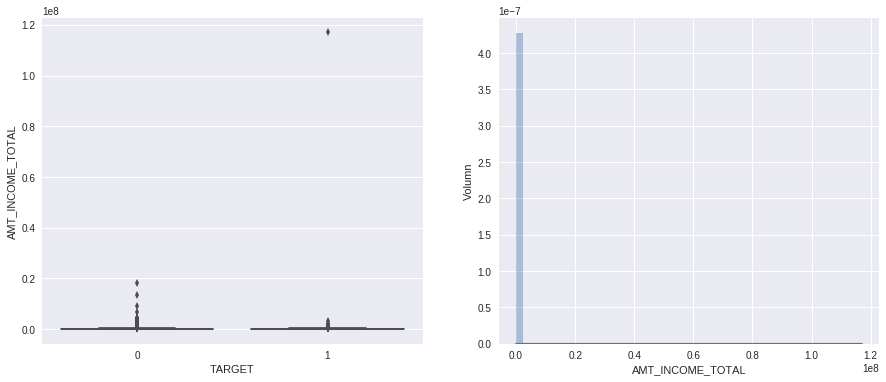

No handles with labels found to put in legend.


Column name: AMT_CREDIT
> No.outliner: 6562 



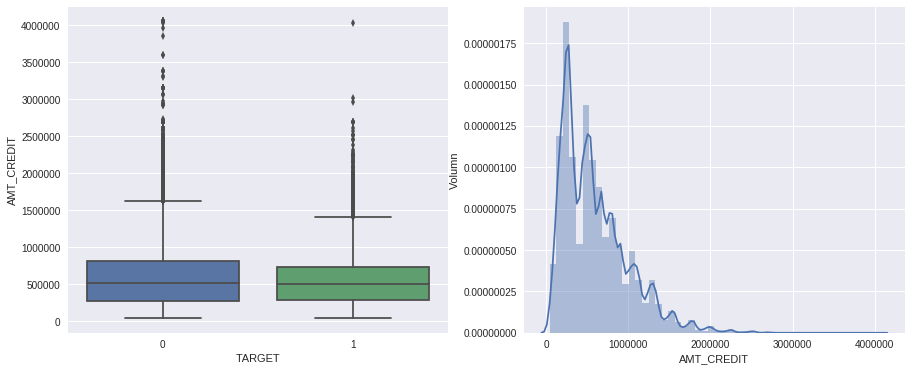

No handles with labels found to put in legend.


Column name: AMT_ANNUITY
> No.outliner: 7504 



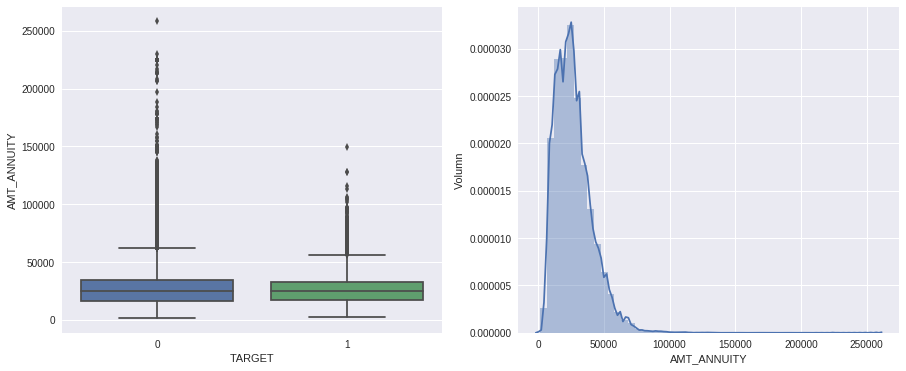

No handles with labels found to put in legend.


Column name: AMT_GOODS_PRICE
> No.outliner: 14728 



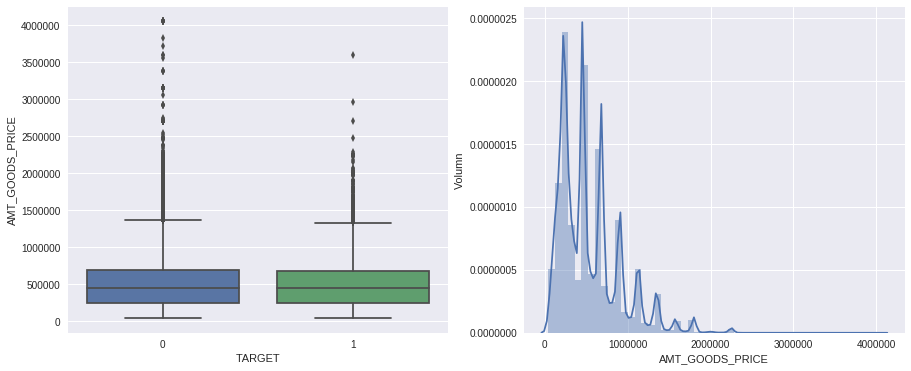

No handles with labels found to put in legend.


Column name: AMT_REQ_CREDIT_BUREAU_HOUR
> No.outliner: 1626 



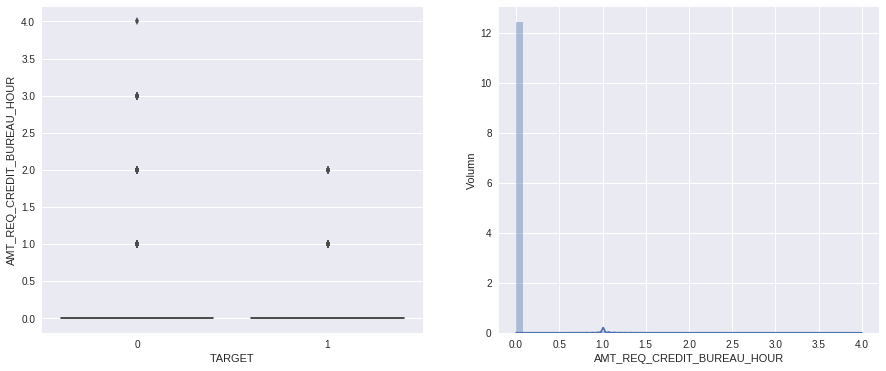

No handles with labels found to put in legend.


Column name: AMT_REQ_CREDIT_BUREAU_DAY
> No.outliner: 1489 



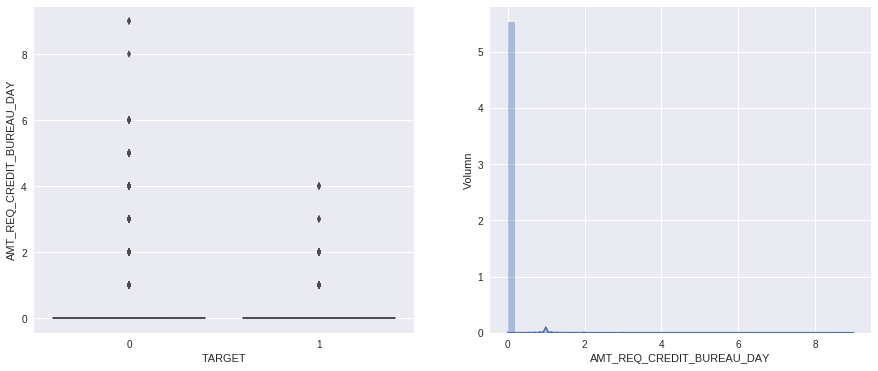

No handles with labels found to put in legend.


Column name: AMT_REQ_CREDIT_BUREAU_WEEK
> No.outliner: 8536 



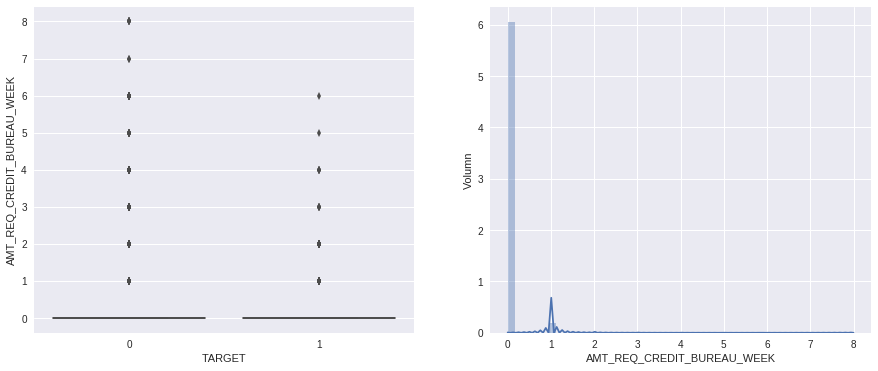

No handles with labels found to put in legend.


Column name: AMT_REQ_CREDIT_BUREAU_MON
> No.outliner: 43759 



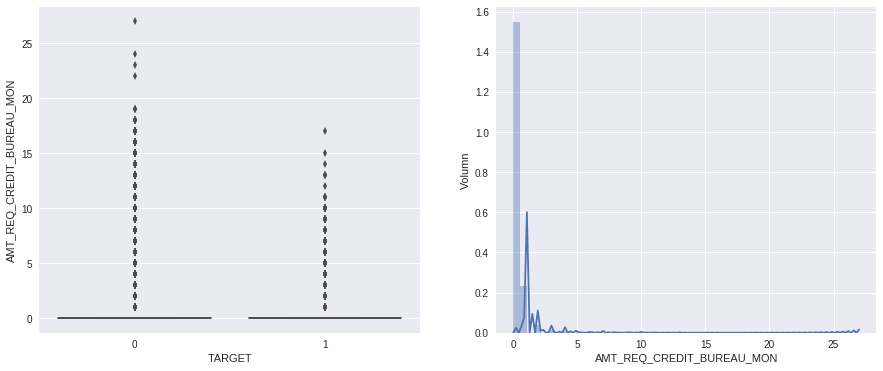

No handles with labels found to put in legend.


Column name: AMT_REQ_CREDIT_BUREAU_QRT
> No.outliner: 50575 



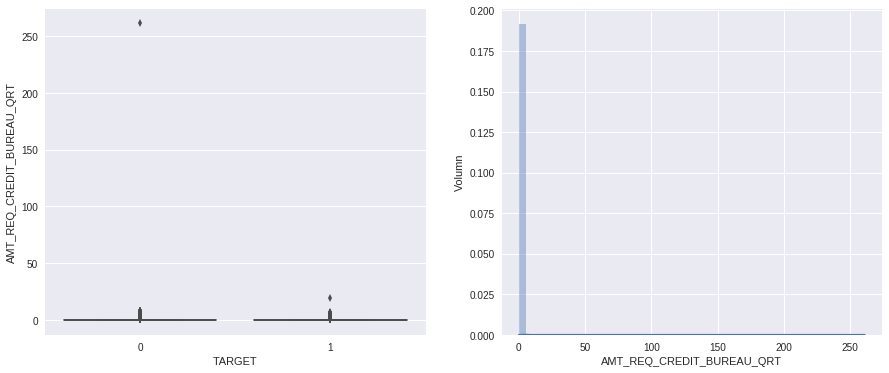

No handles with labels found to put in legend.


Column name: AMT_REQ_CREDIT_BUREAU_YEAR
> No.outliner: 3364 



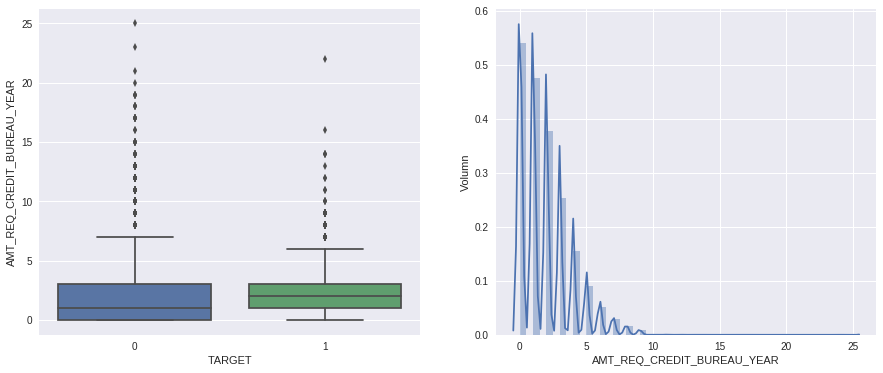

In [0]:
amt = [f for f in df_app_train.columns if 'AMT_' in f]
print(amt)
df_app_train[amt].info()
print(df_app_train[amt].describe())
plot_continous(amt, "TARGET", df_app_train)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265849 entries, 0 to 307510
Data columns (total 10 columns):
AMT_INCOME_TOTAL              265849 non-null float64
AMT_CREDIT                    265849 non-null float64
AMT_ANNUITY                   265839 non-null float64
AMT_GOODS_PRICE               265617 non-null float64
AMT_REQ_CREDIT_BUREAU_HOUR    265849 non-null float64
AMT_REQ_CREDIT_BUREAU_DAY     265849 non-null float64
AMT_REQ_CREDIT_BUREAU_WEEK    265849 non-null float64
AMT_REQ_CREDIT_BUREAU_MON     265849 non-null float64
AMT_REQ_CREDIT_BUREAU_QRT     265849 non-null float64
AMT_REQ_CREDIT_BUREAU_YEAR    265849 non-null float64
dtypes: float64(10)
memory usage: 22.3 MB
       AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count      2.658490e+05  2.658490e+05  265839.000000     2.656170e+05   
mean       1.708305e+05  6.063841e+05   27175.340204     5.450913e+05   
std        1.018984e+05  4.048380e+05   14390.238416     3.714676e+05   
min        2.61

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
No handles with labels found to put in legend.


Column name: AMT_INCOME_TOTAL
> No.outliner: 12704 



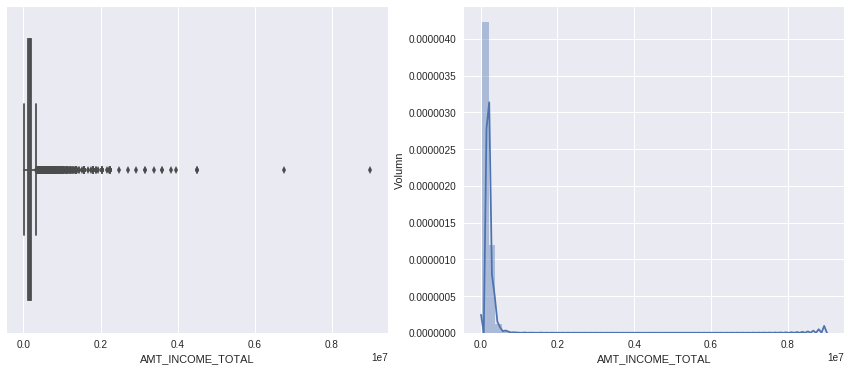

No handles with labels found to put in legend.


Column name: AMT_CREDIT
> No.outliner: 5815 



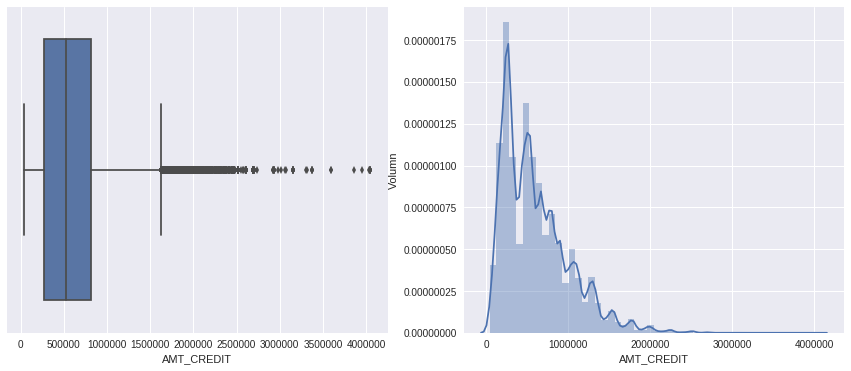

No handles with labels found to put in legend.


Column name: AMT_ANNUITY
> No.outliner: 6070 



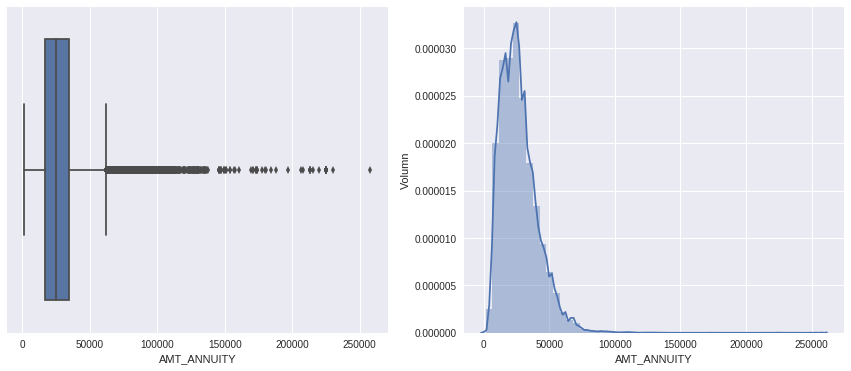

No handles with labels found to put in legend.


Column name: AMT_GOODS_PRICE
> No.outliner: 8474 



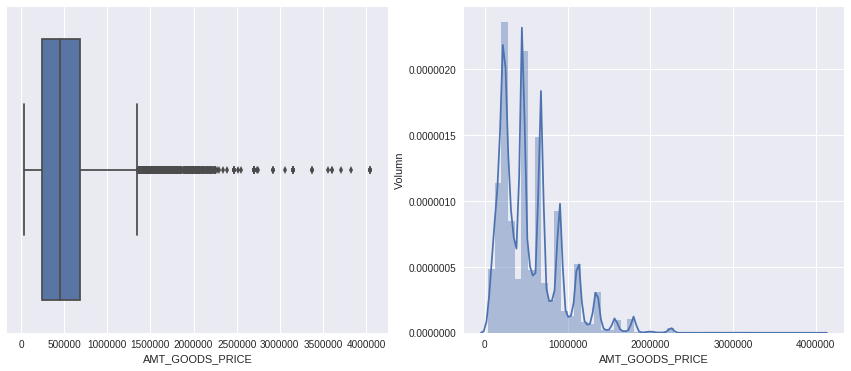

No handles with labels found to put in legend.


Column name: AMT_REQ_CREDIT_BUREAU_HOUR
> No.outliner: 1625 



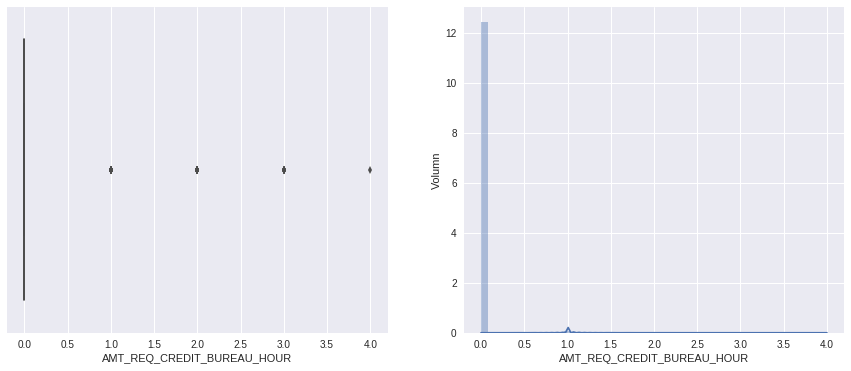

No handles with labels found to put in legend.


Column name: AMT_REQ_CREDIT_BUREAU_DAY
> No.outliner: 1487 



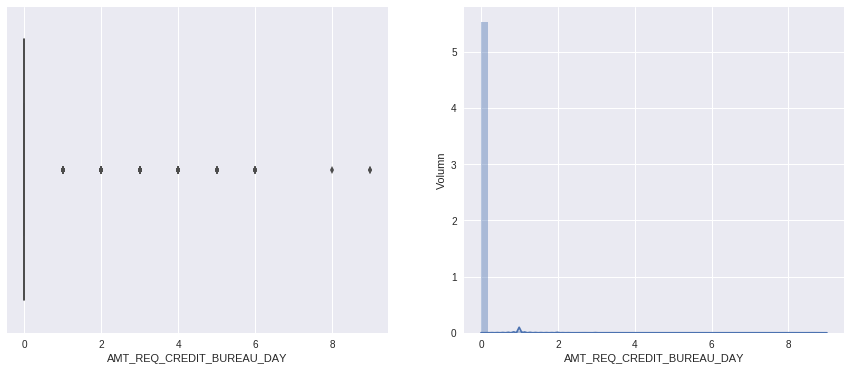

No handles with labels found to put in legend.


Column name: AMT_REQ_CREDIT_BUREAU_WEEK
> No.outliner: 8526 



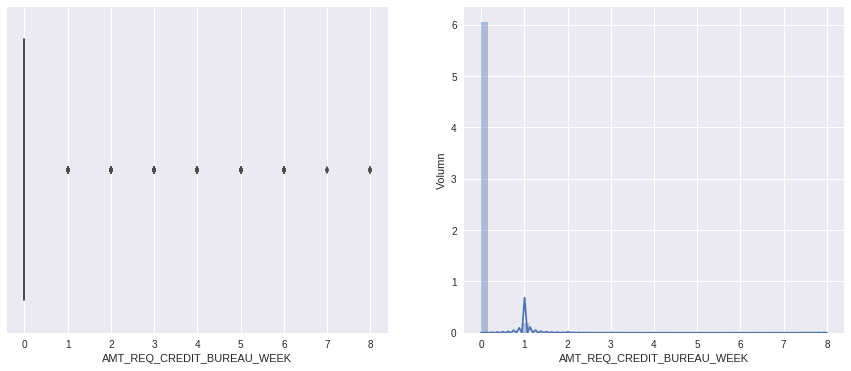

No handles with labels found to put in legend.


Column name: AMT_REQ_CREDIT_BUREAU_MON
> No.outliner: 43730 



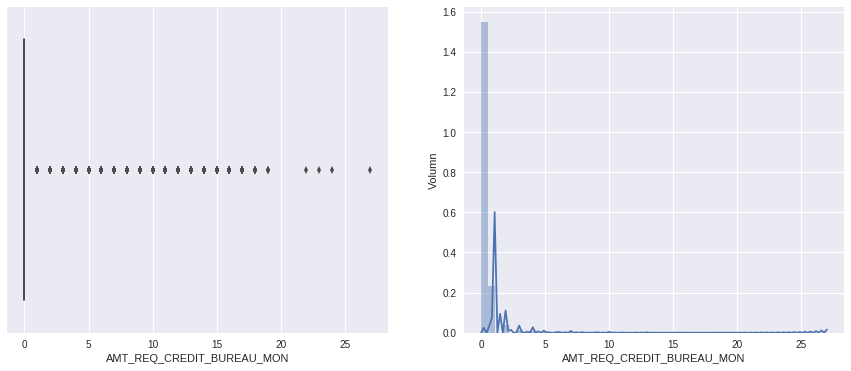

No handles with labels found to put in legend.


Column name: AMT_REQ_CREDIT_BUREAU_QRT
> No.outliner: 50530 



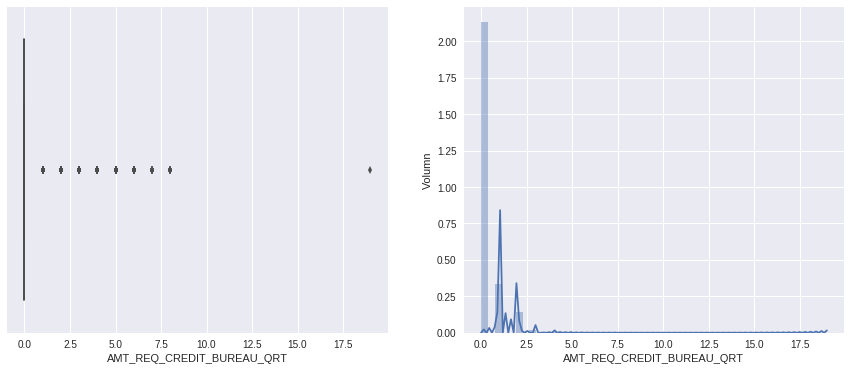

No handles with labels found to put in legend.


Column name: AMT_REQ_CREDIT_BUREAU_YEAR
> No.outliner: 3223 



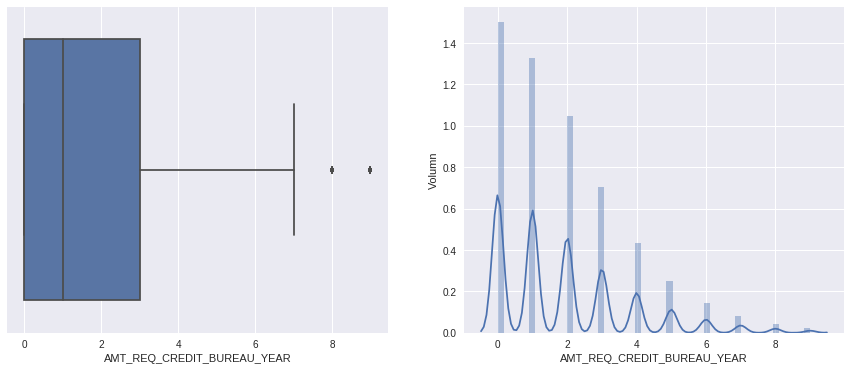

In [0]:
"""
after run important feature 1st
generating new features as 'min', 'max', 'mean', 'nanmedian', 'var', however it 
is just 0,1 so this is meaningless when taking new features follows this way
,or may be taking the sum of all ext_sources with fixed weight
"""
amt = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
df_amt = df_app_train[amt]
df_amt = df_amt[df_amt['AMT_INCOME_TOTAL'] < 20000000]
df_amt = df_amt[df_amt['AMT_REQ_CREDIT_BUREAU_QRT'] < 30]
df_amt = df_amt[df_amt['AMT_REQ_CREDIT_BUREAU_YEAR'] < 10]

df_amt[amt].info()
print(df_amt[amt].describe())
plot_continous(amt, None, df_amt)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 10 columns):
AMT_INCOME_TOTAL              48744 non-null float64
AMT_CREDIT                    48744 non-null float64
AMT_ANNUITY                   48720 non-null float64
AMT_GOODS_PRICE               48744 non-null float64
AMT_REQ_CREDIT_BUREAU_HOUR    42695 non-null float64
AMT_REQ_CREDIT_BUREAU_DAY     42695 non-null float64
AMT_REQ_CREDIT_BUREAU_WEEK    42695 non-null float64
AMT_REQ_CREDIT_BUREAU_MON     42695 non-null float64
AMT_REQ_CREDIT_BUREAU_QRT     42695 non-null float64
AMT_REQ_CREDIT_BUREAU_YEAR    42695 non-null float64
dtypes: float64(10)
memory usage: 3.7 MB
       AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count      4.874400e+04  4.874400e+04   48720.000000     4.874400e+04   
mean       1.784318e+05  5.167404e+05   29426.240209     4.626188e+05   
std        1.015226e+05  3.653970e+05   16016.368315     3.367102e+05   
min        2.694150e+04  4.5

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
No handles with labels found to put in legend.


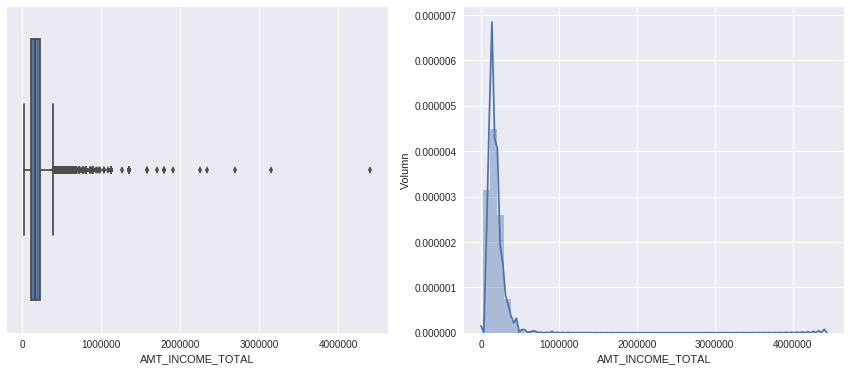

No handles with labels found to put in legend.


Column name: AMT_CREDIT
> No.outliner: 2350 



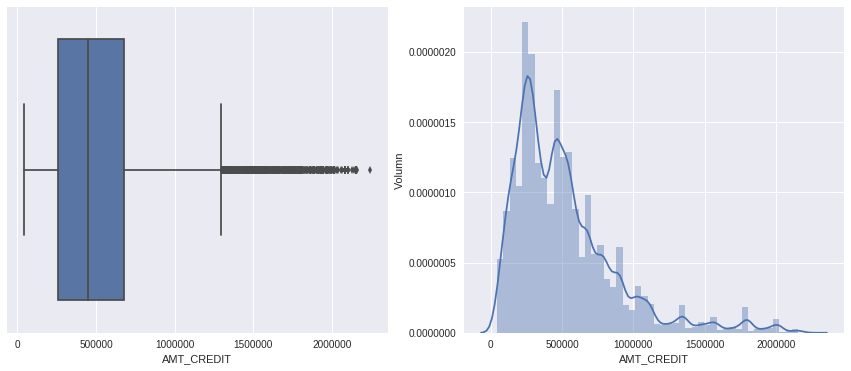

No handles with labels found to put in legend.


Column name: AMT_ANNUITY
> No.outliner: 1173 



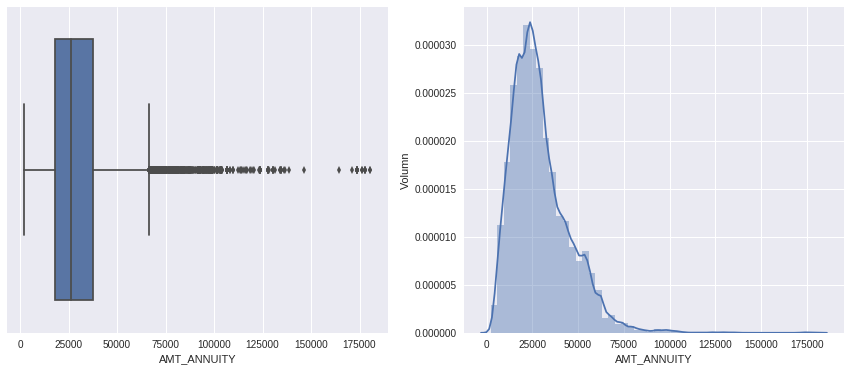

No handles with labels found to put in legend.


Column name: AMT_GOODS_PRICE
> No.outliner: 2122 



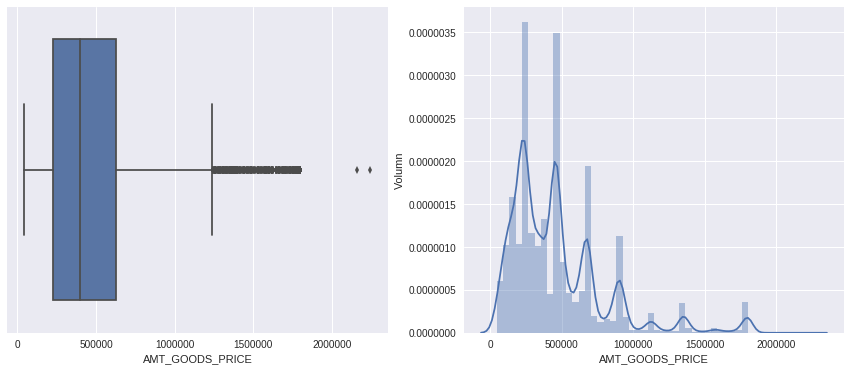

No handles with labels found to put in legend.


Column name: AMT_REQ_CREDIT_BUREAU_HOUR
> No.outliner: 89 



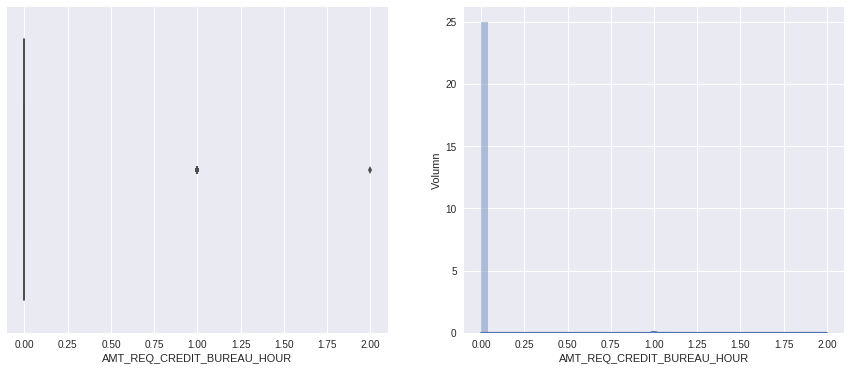

No handles with labels found to put in legend.


Column name: AMT_REQ_CREDIT_BUREAU_DAY
> No.outliner: 70 



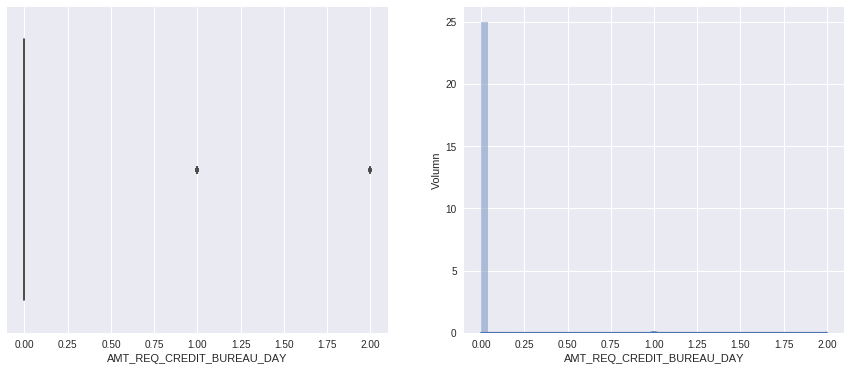

No handles with labels found to put in legend.


Column name: AMT_REQ_CREDIT_BUREAU_WEEK
> No.outliner: 116 



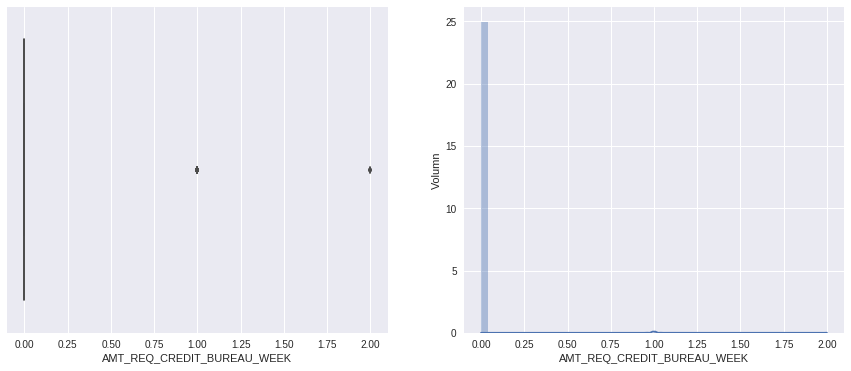

No handles with labels found to put in legend.


Column name: AMT_REQ_CREDIT_BUREAU_MON
> No.outliner: 354 



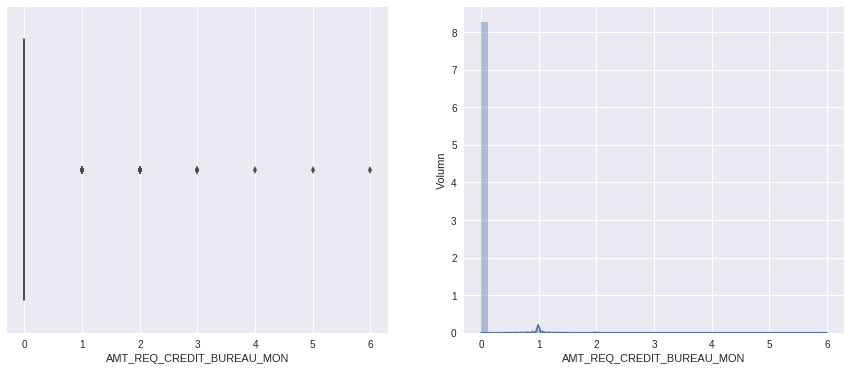

No handles with labels found to put in legend.


Column name: AMT_REQ_CREDIT_BUREAU_QRT
> No.outliner: 565 



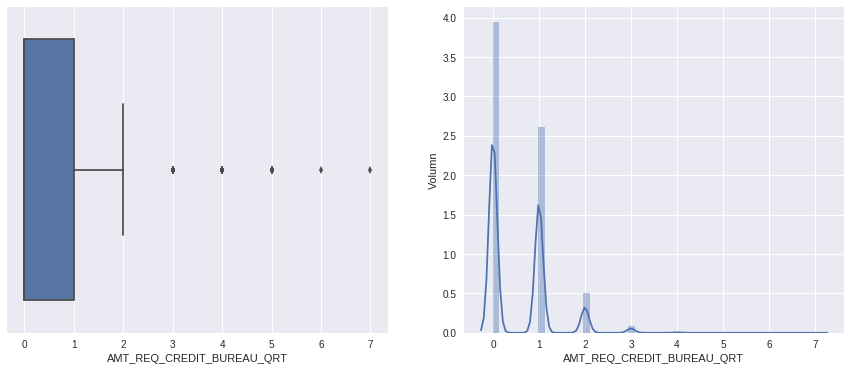

No handles with labels found to put in legend.


Column name: AMT_REQ_CREDIT_BUREAU_YEAR
> No.outliner: 461 



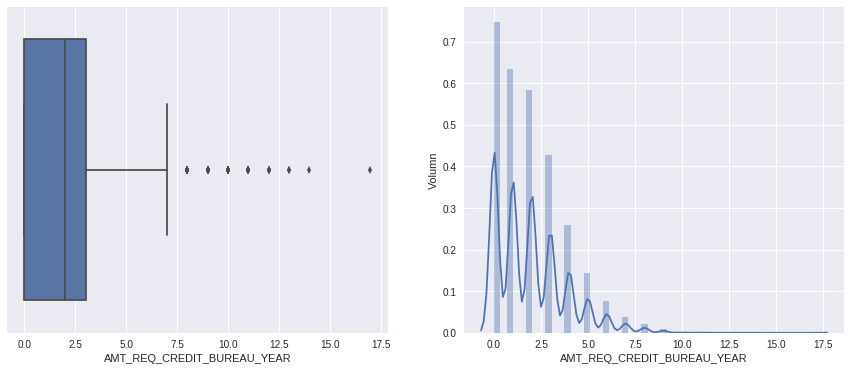

In [0]:
amt = [f for f in df_app_train.columns if 'AMT_' in f]
df_app_test[amt].info()
print(df_app_test[amt].describe())
plot_continous(amt, None, df_app_test)

## Others

In [0]:
cols = [f for f in cons_cols if 'CNT_' in f]
statistical_analyzing(df_app_train[cols])

No. observations: 307511
No. features: 6


col_type    n_unique        n_miss    n_zeros  \
name                                                                     
CNT_CHILDREN                int64  15 (0.00%)     0 (0.00%)  0 (0.00%)   
CNT_FAM_MEMBERS           float64  17 (0.01%)     2 (0.00%)  0 (0.00%)   
DEF_30_CNT_SOCIAL_CIRCLE  float64  10 (0.00%)  1021 (0.33%)  0 (0.00%)   
DEF_60_CNT_SOCIAL_CIRCLE  float64   9 (0.00%)  1021 (0.33%)  0 (0.00%)   
OBS_30_CNT_SOCIAL_CIRCLE  float64  33 (0.01%)  1021 (0.33%)  0 (0.00%)   
OBS_60_CNT_SOCIAL_CIRCLE  float64  33 (0.01%)  1021 (0.33%)  0 (0.00%)   

                              n_neg  25%  50%  75%     count    max      mean  \
name                                                                            
CNT_CHILDREN              0 (0.00%)  0.0  0.0  1.0  307511.0   19.0  0.417052   
CNT_FAM_MEMBERS           0 (0.00%)  2.0  2.0  3.0  307509.0   20.0  2.152665   
DEF_30_CNT_SOCIAL_CIRCLE  0 (0.00%)  0.0  0.0  0.0  306490.0   34.0  0.143421   
DEF_60_CNT_SOCIAL_CIRCLE  0 (0.00%)  0.0  0.0  0.0  306490.0   24.0  0.100049   
OBS_30_CNT_SOCIAL_CIRCLE  0 (0.00%)  0.0  0.0  2.0  306490.0  348.0  1.422245   
OBS_60_CNT_SOCIAL_CIRCLE  0 (0.00%)  0.0  0.0  2.0  306490.0  344.0  1.405292   

                          min       std  sample_0  sample_1  sample_2  \
name                                                                    
CNT_CHILDREN              0.0  0.722121       1.0       0.0       1.0   
CNT_FAM_MEMBERS           1.0  0.910682       3.0       1.0       3.0   
DEF_30_CNT_SOCIAL_CIRCLE  0.0  0.446698       0.0       0.0       0.0   
DEF_60_CNT_SOCIAL_CIRCLE  0.0  0.362291       0.0       0.0       0.0   
OBS_30_CNT_SOCIAL_CIRCLE  0.0  2.400989       0.0       0.0       0.0   
OBS_60_CNT_SOCIAL_CIRCLE  0.0  2.379803       0.0       0.0       0.0   

                          sample_3  sample_4  
name                                          
CNT_CHILDREN                   0.0       2.0  
CNT_FAM_MEMBERS                2.0       4.0  
DEF_30_CNT_SOCIAL_CIRCLE       0.0       0.0  
DEF_60_CNT_SOCIAL_CIRCLE       0.0       0.0  
OBS_30_CNT_SOCIAL_CIRCLE       0.0       0.0  
OBS_60_CNT_SOCIAL_CIRCLE       0.0       0.0

## Domain Knowledge Features



In [0]:
""" 
For 2nd testing importance feature
Process application_train.csv and application_test.csv and return a pandas dataframe. 
"""
def get_age_label(days_birth):
    """ Return the age group label (int). """
    age_years = -days_birth / 365
    if age_years < 27: return 1
    elif age_years < 40: return 2
    elif age_years < 50: return 3
    elif age_years < 65: return 4
    elif age_years < 99: return 5
    else: return 0
    
df = df_app_train.append(df_app_test)

# Data cleaning
df = df[df['CODE_GENDER'] != 'XNA']  # 4 people with XNA code gender
df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)
df['DAYS_LAST_PHONE_CHANGE'].replace(0, np.nan, inplace=True)
df['DAYS_ID_PUBLISH'].replace(0, np.nan, inplace=True)
df['DAYS_REGISTRATION'].replace(0, np.nan, inplace=True)

df = df[df['AMT_INCOME_TOTAL'] < 20000000]  # Max income in test is 4M; train has a 117M value
df = df[df['AMT_REQ_CREDIT_BUREAU_QRT'] < 30]
df = df[df['AMT_REQ_CREDIT_BUREAU_YEAR'] < 10]

# Categorical age - based on target=1 plot
df['AGE_RANGE'] = df['DAYS_BIRTH'].apply(lambda x: get_age_label(x))    
    
# Flag_document features - count and kurtosis
docs = [f for f in df.columns if 'FLAG_DOC' in f]
df['DOCUMENT_COUNT'] = df[docs].sum(axis=1)
df['NEW_DOC_KURT'] = df[docs].kurtosis(axis=1)

# New features based on External sources
df['EXT_SOURCES_PROD'] = df['EXT_SOURCE_1'] * df['EXT_SOURCE_2'] * df['EXT_SOURCE_3']
df['EXT_SOURCES_WEIGHTED'] = df.EXT_SOURCE_1 * 2 + df.EXT_SOURCE_2 * 1 + df.EXT_SOURCE_3 * 3
np.warnings.filterwarnings('ignore', r'All-NaN (slice|axis) encountered')
for function_name in ['min', 'max', 'mean', 'nanmedian', 'var']:
  feature_name = 'EXT_SOURCES_{}'.format(function_name.upper())
  df[feature_name] = eval('np.{}'.format(function_name))(
      df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']], axis=1)
        
# Categorical age - based on target=1 plot    
df['AGE_RANGE'] = df['DAYS_BIRTH'].apply(lambda x: get_age_label(x))

#Encode categorical features (LabelEncoder)
df, le_encoded_cols = label_encoder(df, None)
print("label encoded column:",le_encoded_cols)




In [0]:
"""
Credit ratios
1. Credit amount to annuity amount: the percentage of the credit amount 
relative to a client's income
2. Credit amount to goods price: the percentage of the credit amount 
relative to a client's 
"""
df['CREDIT_TO_ANNUITY_RATIO'] = df['AMT_CREDIT'] / df['AMT_ANNUITY']
df['CREDIT_TO_GOODS_RATIO'] = df['AMT_CREDIT'] / df['AMT_GOODS_PRICE']

"""
Income ratios
These ratios are relative to the proportion of a client's total income
"""
df['ANNUITY_TO_INCOME_RATIO'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
df['CREDIT_TO_INCOME_RATIO'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']
df['INCOME_TO_EMPLOYED_RATIO'] = df['AMT_INCOME_TOTAL'] / df['DAYS_EMPLOYED']
df['INCOME_TO_BIRTH_RATIO'] = df['AMT_INCOME_TOTAL'] / df['DAYS_BIRTH']

"""
Time ratios
"""
df['DAYS_EMPLOYED_TO_BIRTH_RATIO'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
df['DAYS_ID_TO_BIRTH_RATIO'] = df['DAYS_ID_PUBLISH'] / df['DAYS_BIRTH']
df['DAYS_CAR_TO_BIRTH_RATIO'] = df['OWN_CAR_AGE'] / df['DAYS_BIRTH']
df['DAYS_CAR_TO_EMPLOYED_RATIO'] = df['OWN_CAR_AGE'] / df['DAYS_EMPLOYED']
df['DAYS_PHONE_TO_BIRTH_RATIO'] = df['DAYS_LAST_PHONE_CHANGE'] / df['DAYS_BIRTH']
df['DAYS_EMPLOYED_REGIST_DIFF'] = df['DAYS_EMPLOYED'] - df['DAYS_REGISTRATION']
df['DAYS_BIRTH_REGIST_DIFF'] = df['DAYS_BIRTH'] - df['DAYS_REGISTRATION']

In [0]:
# Groupby: Statistics for applications in the same group
def do_mean(df, group_cols, counted, agg_name):
    gp = df[group_cols + [counted]].groupby(group_cols)[counted].mean().reset_index().rename(
        columns={counted: agg_name})
    df = df.merge(gp, on=group_cols, how='left')
    del gp
    gc.collect()
    return df

def do_median(df, group_cols, counted, agg_name):
    gp = df[group_cols + [counted]].groupby(group_cols)[counted].median().reset_index().rename(
        columns={counted: agg_name})
    df = df.merge(gp, on=group_cols, how='left')
    del gp
    gc.collect()
    return df

def do_std(df, group_cols, counted, agg_name):
    gp = df[group_cols + [counted]].groupby(group_cols)[counted].std().reset_index().rename(
        columns={counted: agg_name})
    df = df.merge(gp, on=group_cols, how='left')
    del gp
    gc.collect()
    return df

def do_sum(df, group_cols, counted, agg_name):
    gp = df[group_cols + [counted]].groupby(group_cols)[counted].sum().reset_index().rename(
        columns={counted: agg_name})
    df = df.merge(gp, on=group_cols, how='left')
    del gp
    gc.collect()
    return df

In [0]:
""" GROUPBY BASED ON GROUP OF FEATURES SHOWING SOCIAL NETWORK
Selecting a group of features might be meaningful and could contribute 
a crucial impact to generate beneficial features.
In here, I choose 5 crucial features such as:
ORGANIZATION_TYPE: industry of organization 
NAME_EDUCATION_TYPE: client's educational level
OCCUPATION_TYPE: client's current job
AGE_RANGE, CODE_GENDER
"""
grp_score_df = df[['ORGANIZATION_TYPE', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 
             'AGE_RANGE', 'CODE_GENDER','TARGET']]
grp_score_df['SCORES'] = np.where(grp_score_df['TARGET']==0,1,-1)
group_cols = ['ORGANIZATION_TYPE', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 
             'AGE_RANGE', 'CODE_GENDER']
agg_cols = ['SCORES']
AGG = { 'SCORES': ['sum', 'mean'],      }

group_df = grp_score_df[group_cols + agg_cols ].groupby(group_cols).agg(AGG).reset_index()
group_df.columns = pd.Index(['{}{}'.format( e[0], e[1].upper())
                           for e in group_df.columns.tolist()])
df = df.merge(group_df, on=group_cols, how='left')
del group_df; gc.collect()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [0]:
statistical_analyzing(group_df[agg_cols])

No. observations: 8767
No. features: 4


col_type        n_unique     n_miss    n_zeros  \
name                                                                      
(EXT_SOURCES_MEAN, mean)  float64  8767 (100.00%)  0 (0.00%)  0 (0.00%)   
(SCORES, sum)               int64     255 (2.91%)  0 (0.00%)  0 (0.00%)   
(SCORES, mean)            float64     664 (7.57%)  0 (0.00%)  0 (0.00%)   
(SCORES, count)             int64     343 (3.91%)  0 (0.00%)  0 (0.00%)   

                                n_neg       25%       50%        75%   count  \
name                                                                           
(EXT_SOURCES_MEAN, mean)    0 (0.00%)  0.439876  0.511234   0.572461  8767.0   
(SCORES, sum)             744 (8.49%)  1.000000  2.000000   6.000000  8767.0   
(SCORES, mean)            744 (8.49%)  0.443096  0.750000   1.000000  8767.0   
(SCORES, count)             0 (0.00%)  1.000000  3.000000  10.000000  8767.0   

                                  max       mean       min         std  \
name                                                                     
(EXT_SOURCES_MEAN, mean)     0.810079   0.502254  0.030135    0.109464   
(SCORES, sum)             2209.000000  14.036957 -4.000000   69.576415   
(SCORES, mean)               1.000000   0.598360 -1.000000    0.546985   
(SCORES, count)           4131.000000  24.153530  1.000000  124.014136   

                          sample_0  sample_1   sample_2  sample_3    sample_4  
name                                                                           
(EXT_SOURCES_MEAN, mean)  0.440834  0.431547   0.517309  0.412193    0.526535  
(SCORES, sum)             1.000000  3.000000  29.000000  3.000000  127.000000  
(SCORES, mean)            1.000000  0.428571   0.783784  1.000000    0.585253  
(SCORES, count)           1.000000  7.000000  37.000000  3.000000  217.000000

In [0]:
group = ['ORGANIZATION_TYPE', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 
             'AGE_RANGE', 'CODE_GENDER']

df = do_median(df, group, 'EXT_SOURCES_MEAN', 'GROUP_EXT_SOURCES_MEDIAN')
df = do_std(df, group, 'EXT_SOURCES_MEAN', 'GROUP_EXT_SOURCES_STD')
df = do_mean(df, group, 'EXT_SOURCES_PROD', 'GROUP_EXT_SOURCES_PROD')

df = do_mean(df, group, 'AMT_INCOME_TOTAL', 'GROUP_INCOME_MEAN')
df = do_std(df, group, 'AMT_INCOME_TOTAL', 'GROUP_INCOME_STD')

df = do_mean(df, group, 'CREDIT_TO_ANNUITY_RATIO', 'GROUP_CREDIT_TO_ANNUITY_MEAN')
df = do_std(df, group, 'CREDIT_TO_ANNUITY_RATIO', 'GROUP_CREDIT_TO_ANNUITY_STD')

df = do_mean(df, group, 'AMT_CREDIT', 'GROUP_CREDIT_MEAN')

df = do_mean(df, group, 'AMT_ANNUITY', 'GROUP_ANNUITY_MEAN')
df = do_std(df, group, 'AMT_ANNUITY', 'GROUP_ANNUITY_STD')

In [0]:
df_2nd = df

# FE


In [0]:
def get_age_label(days_birth):
    """ Return the age group label (int). """
    age_years = -days_birth / 365
    if age_years < 27: return 1
    elif age_years < 40: return 2
    elif age_years < 50: return 3
    elif age_years < 65: return 4
    elif age_years < 99: return 5
    else: return 0

def get_apply_train_test(path, num_rows = None):
    """ Process application_train.csv and application_test.csv and return a pandas dataframe. """
    train = pd.read_csv(os.path.join(path, 'application_train.csv'), nrows= num_rows)
    test = pd.read_csv(os.path.join(path, 'application_test.csv'), nrows= num_rows)    
    df = train.append(test)
    del train, test; gc.collect()
    
    # Data cleaning
    df = df[df['CODE_GENDER'] != 'XNA']  # 4 people with XNA code gender
    df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)
    df['DAYS_LAST_PHONE_CHANGE'].replace(0, np.nan, inplace=True)
    df['DAYS_ID_PUBLISH'].replace(0, np.nan, inplace=True)
    df['DAYS_REGISTRATION'].replace(0, np.nan, inplace=True)

    df = df[df['AMT_INCOME_TOTAL'] < 20000000]  # Max income in test is 4M; train has a 117M value
    
    # Categorical age - based on target=1 plot
    df['AGE_RANGE'] = df['DAYS_BIRTH'].apply(lambda x: get_age_label(x))    
    
    # Flag_document features - count and kurtosis
    docs = [f for f in df.columns if 'FLAG_DOC' in f]
    df['DOCUMENT_COUNT'] = df[docs].sum(axis=1)
    df['NEW_DOC_KURT'] = df[docs].kurtosis(axis=1)
    
    # New features based on External sources
    df['EXT_SOURCES_PROD'] = df['EXT_SOURCE_1'] * df['EXT_SOURCE_2'] * df['EXT_SOURCE_3']
    df['EXT_SOURCES_WEIGHTED'] = df.EXT_SOURCE_1 * 2 + df.EXT_SOURCE_2 * 1 + df.EXT_SOURCE_3 * 3
    np.warnings.filterwarnings('ignore', r'All-NaN (slice|axis) encountered')
    for function_name in ['min', 'max', 'mean', 'nanmedian', 'var']:
        feature_name = 'EXT_SOURCES_{}'.format(function_name.upper())
        df[feature_name] = eval('np.{}'.format(function_name))(
            df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']], axis=1)

    # Credit ratios
    df['CREDIT_TO_ANNUITY_RATIO'] = df['AMT_CREDIT'] / df['AMT_ANNUITY']
    df['CREDIT_TO_GOODS_RATIO'] = df['AMT_CREDIT'] / df['AMT_GOODS_PRICE']    
    # Income ratios
    df['ANNUITY_TO_INCOME_RATIO'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['CREDIT_TO_INCOME_RATIO'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']    
    df['INCOME_TO_EMPLOYED_RATIO'] = df['AMT_INCOME_TOTAL'] / df['DAYS_EMPLOYED']
    df['INCOME_TO_BIRTH_RATIO'] = df['AMT_INCOME_TOTAL'] / df['DAYS_BIRTH']
    # Family ratio
    df['INCOME_TO_FAMEMS_RATIO'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    
    
    """ Time-based ratios """
    df['DAYS_EMPLOYED_TO_BIRTH_RATIO'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['DAYS_ID_TO_BIRTH_RATIO'] = df['DAYS_ID_PUBLISH'] / df['DAYS_BIRTH']
    df['DAYS_CAR_TO_BIRTH_RATIO'] = df['OWN_CAR_AGE'] / df['DAYS_BIRTH']
    df['DAYS_CAR_TO_EMPLOYED_RATIO'] = df['OWN_CAR_AGE'] / df['DAYS_EMPLOYED']
    df['DAYS_PHONE_TO_BIRTH_RATIO'] = df['DAYS_LAST_PHONE_CHANGE'] / df['DAYS_BIRTH']
    df['DAYS_EMPLOYED_REGIST_DIFF'] = df['DAYS_EMPLOYED'] - df['DAYS_REGISTRATION']
    df['DAYS_BIRTH_REGIST_DIFF'] = df['DAYS_BIRTH'] - df['DAYS_REGISTRATION']
    df['DAYS_EMPLOYED_TO_CHILDREN'] = df['DAYS_EMPLOYED'] / df['CNT_CHILDREN']

    """ CATEGORICAL GROUPBY """
#     # scoring for client from network group
#     grp_score_df = df[['ORGANIZATION_TYPE', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 
#              'AGE_RANGE', 'CODE_GENDER','TARGET']]
#     grp_score_df['SCORES'] = np.where(grp_score_df['TARGET']==0,1,-1)
#     group_cols = ['ORGANIZATION_TYPE', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 
#                  'AGE_RANGE', 'CODE_GENDER']
#     agg_cols = ['SCORES']
#     AGG = { 'SCORES': ['sum', 'mean'],      }

#     group_df = grp_score_df[group_cols + agg_cols ].groupby(group_cols).agg(AGG).reset_index()
#     group_df.columns = pd.Index(['{}{}'.format( e[0], e[1].upper())
#                                for e in group_df.columns.tolist()])
#     df = df.merge(group_df, on=group_cols, how='left')
#     del group_df; gc.collect()
    
    # CATEGORY Groupby: Statistics for applications in the same group
    group = ['ORGANIZATION_TYPE', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 
             'AGE_RANGE', 'CODE_GENDER']
    df = do_median(df, group, 'EXT_SOURCES_MEAN', 'GROUP_EXT_SOURCES_MEDIAN')
    df = do_std(df, group, 'EXT_SOURCES_MEAN', 'GROUP_EXT_SOURCES_STD')
    df = do_mean(df, group, 'EXT_SOURCES_PROD', 'GROUP_EXT_SOURCES_PROD')
    
    df = do_mean(df, group, 'AMT_INCOME_TOTAL', 'GROUP_INCOME_MEAN')
    df = do_std(df, group, 'AMT_INCOME_TOTAL', 'GROUP_INCOME_STD')
    df = do_mean(df, group, 'AMT_CREDIT', 'GROUP_CREDIT_MEAN')
    df = do_mean(df, group, 'AMT_ANNUITY', 'GROUP_ANNUITY_MEAN')
    df = do_std(df, group, 'AMT_ANNUITY', 'GROUP_ANNUITY_STD')
    df = do_mean(df, group, 'CREDIT_TO_ANNUITY_RATIO', 'GROUP_CREDIT_TO_ANNUITY_MEAN')
    df = do_std(df, group, 'CREDIT_TO_ANNUITY_RATIO', 'GROUP_CREDIT_TO_ANNUITY_STD')
    df = do_mean(df, group, 'CREDIT_TO_INCOME_RATIO', 'GROUP_CREDIT_TO_INCOME_MEAN')
    
    df = do_mean(df, group, 'DAYS_EMPLOYED_TO_BIRTH_RATIO', 'GROUP_DAYS_EMPLOYED_TO_BIRTH_MEAN')
    
    # Encode categorical features (LabelEncoder)
    df, le_encoded_cols = label_encoder(df, None)
    
    # Dropping less information features
    #df = drop_application_columns(df)
    return df

def drop_application_columns(df):
    """ Drop features based on permutation feature importance. """
    drop_list = [
        # categorical features        
        'FLAG_EMP_PHONE', 'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'FLAG_PHONE',
        'FLAG_OWN_REALTY',
        
        # continous
        'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START',        
         
        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_WORK_CITY',
        'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
        'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR',
        
        'FONDKAPREMONT_MODE','HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE',
        'COMMONAREA_MODE', 'NONLIVINGAREA_MODE', 'LIVINGAPARTMENTS_MODE',
        'ELEVATORS_MODE','LANDAREA_MODE','FLOORSMIN_MODE', 
        'BASEMENTAREA_MODE','NONLIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
        'YEARS_BEGINEXPLUATATION_MODE','ENTRANCES_MODE','YEARS_BUILD_MODE',
        
        'FLOORSMIN_MEDI',  'NONLIVINGAREA_MEDI',  'NONLIVINGAPARTMENTS_MEDI', 
        'BASEMENTAREA_MEDI', 'COMMONAREA_MEDI',  'LIVINGAPARTMENTS_MEDI',
        'ELEVATORS_MEDI', 'LIVINGAREA_MEDI', 'YEARS_BUILD_MEDI','LANDAREA_MEDI',
        
        'NONLIVINGAREA_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',         
        'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'BASEMENTAREA_AVG',        
        'LIVINGAPARTMENTS_AVG', 'ELEVATORS_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 
        'NONLIVINGAPARTMENTS_AVG'
    ]
    # Drop most flag document columns
    for doc_num in [2,4,5,6,7,9,10,11,12,13,14,15,16,17,19,20,21]:
        drop_list.append('FLAG_DOCUMENT_{}'.format(doc_num))
    df.drop(drop_list, axis=1, inplace=True)
    return df



      

## latest update

In [0]:
def get_age_label(days_birth):
    """ Return the age group label (int). """
    age_years = -days_birth / 365
    if age_years < 27: return 1
    elif age_years < 40: return 2
    elif age_years < 50: return 3
    elif age_years < 65: return 4
    elif age_years < 99: return 5
    else: return 0

def get_apply_train_test(path, num_rows = None):
    """ Process application_train.csv and application_test.csv and return a pandas dataframe. """
    train = pd.read_csv(os.path.join(path, 'application_train.csv'), nrows= num_rows)
    test = pd.read_csv(os.path.join(path, 'application_test.csv'), nrows= num_rows)    
    df = train.append(test)
    del train, test; gc.collect()
    
    # Data cleaning
    df = df[df['CODE_GENDER'] != 'XNA']  # 4 people with XNA code gender
    df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)
    df['DAYS_LAST_PHONE_CHANGE'].replace(0, np.nan, inplace=True)
    df['DAYS_ID_PUBLISH'].replace(0, np.nan, inplace=True)
    df['DAYS_REGISTRATION'].replace(0, np.nan, inplace=True)

    df = df[df['AMT_INCOME_TOTAL'] < 20000000]  # Max income in test is 4M; train has a 117M value
    
    # Categorical age - based on target=1 plot
    df['AGE_RANGE'] = df['DAYS_BIRTH'].apply(lambda x: get_age_label(x))    
    
    # Flag_document features - count and kurtosis
    docs = [f for f in df.columns if 'FLAG_DOC' in f]
    df['FLAG_DOC_COUNT'] = df[docs].sum(axis=1)
    df['FLAG_DOC_MEAN'] = df[docs].mean(axis=1)
    df['FLAG_DOC_KURT'] = df[docs].kurtosis(axis=1)
    
    # New features based on External sources
    df['EXT_SOURCES_PROD'] = df['EXT_SOURCE_1'] * df['EXT_SOURCE_2'] * df['EXT_SOURCE_3']
    df['EXT_SOURCES_PROD_1'] = df['EXT_SOURCE_2'] * df['EXT_SOURCE_3']
    df['EXT_SOURCES_PROD_2'] = df['EXT_SOURCE_1'] * df['EXT_SOURCE_3']    
    df['EXT_SOURCES_GEOMEAN'] = (df['EXT_SOURCE_1'] * df['EXT_SOURCE_2'] 
                                 * df['EXT_SOURCE_3'])** (1. / 3)        
    df['EXT_SOURCES_POLY_1'] = (df['EXT_SOURCE_3'] ** (2)* df['EXT_SOURCE_2'])
    df['EXT_SOURCES_POLY_2'] = (df['EXT_SOURCE_3'] ** (2)* df['EXT_SOURCE_1'])
    df['EXT_SOURCES_POLY_3'] = (df['EXT_SOURCE_3'] ** (3))
    df['EXT_SOURCES_POLY_4'] = (df['EXT_SOURCE_2'] ** (2)* df['EXT_SOURCE_3'])    
    df['EXT_SOURCES_WEIGHTED'] = (df.EXT_SOURCE_1 * 2 + df.EXT_SOURCE_2 * 1 
                                  + df.EXT_SOURCE_3 * 3)    
    np.warnings.filterwarnings('ignore', r'All-NaN (slice|axis) encountered')
    for function_name in ['min', 'max', 'mean', 'nanmedian', 'var']:
        feature_name = 'EXT_SOURCES_{}'.format(function_name.upper())
        df[feature_name] = eval('np.{}'.format(function_name))(
            df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']], axis=1)

    # Credit ratios
    df['CREDIT_TO_ANNUITY_RATIO'] = df['AMT_CREDIT'] / df['AMT_ANNUITY']
    df['CREDIT_TO_GOODS_RATIO'] = df['AMT_CREDIT'] / df['AMT_GOODS_PRICE']    
    # Income ratios
    df['ANNUITY_TO_INCOME_RATIO'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['CREDIT_TO_INCOME_RATIO'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL'] 
    df['GOODS_TO_INCOME_RATIO'] = df['AMT_GOODS_PRICE'] / df['AMT_INCOME_TOTAL']    
    
    df['INCOME_TO_EMPLOYED_RATIO'] = df['AMT_INCOME_TOTAL'] / df['DAYS_EMPLOYED']
    df['INCOME_TO_BIRTH_RATIO'] = df['AMT_INCOME_TOTAL'] / df['DAYS_BIRTH']    
    # Family ratio
    df['CREDIT_TO_FAMEMS_RATIO'] = df['AMT_CREDIT'] / df['CNT_FAM_MEMBERS']
    df['GOODS_TO_FAMEMS_RATIO'] = df['AMT_GOODS_PRICE'] / df['CNT_FAM_MEMBERS']   
    df['INCOME_TO_FAMEMS_RATIO'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    
    
    """ Time-based ratios """
    df['DAYS_EMPLOYED_TO_BIRTH_RATIO'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['DAYS_ID_TO_BIRTH_RATIO'] = df['DAYS_ID_PUBLISH'] / df['DAYS_BIRTH']
    df['DAYS_CAR_TO_BIRTH_RATIO'] = df['OWN_CAR_AGE'] / df['DAYS_BIRTH']
    df['DAYS_CAR_TO_EMPLOYED_RATIO'] = df['OWN_CAR_AGE'] / df['DAYS_EMPLOYED']
    df['DAYS_PHONE_TO_BIRTH_RATIO'] = df['DAYS_LAST_PHONE_CHANGE'] / df['DAYS_BIRTH']
    df['DAYS_EMPLOYED_REGIST_DIFF'] = df['DAYS_EMPLOYED'] - df['DAYS_REGISTRATION']
    df['DAYS_BIRTH_REGIST_DIFF'] = df['DAYS_BIRTH'] - df['DAYS_REGISTRATION']
    df['DAYS_EMPLOYED_TO_CHILDREN'] = df['DAYS_EMPLOYED'] / df['CNT_CHILDREN']

    """ CATEGORICAL GROUPBY """
    # CATEGORY Groupby: Statistics for applications in the same group
    group = ['ORGANIZATION_TYPE', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 
             'AGE_RANGE', 'CODE_GENDER']
    df = do_median(df, group, 'EXT_SOURCES_MEAN', 'GROUP_EXT_SOURCES_MEDIAN')
    df = do_std(df, group, 'EXT_SOURCES_MEAN', 'GROUP_EXT_SOURCES_STD')
    df = do_mean(df, group, 'EXT_SOURCES_PROD', 'GROUP_EXT_SOURCES_PROD')
    
    df = do_mean(df, group, 'AMT_INCOME_TOTAL', 'GROUP_INCOME_MEAN')
    df = do_std(df, group, 'AMT_INCOME_TOTAL', 'GROUP_INCOME_STD')
    df = do_mean(df, group, 'AMT_CREDIT', 'GROUP_CREDIT_MEAN')
    df = do_mean(df, group, 'AMT_ANNUITY', 'GROUP_ANNUITY_MEAN')
    df = do_std(df, group, 'AMT_ANNUITY', 'GROUP_ANNUITY_STD')
    df = do_mean(df, group, 'CREDIT_TO_ANNUITY_RATIO', 'GROUP_CREDIT_TO_ANNUITY_MEAN')
    df = do_std(df, group, 'CREDIT_TO_ANNUITY_RATIO', 'GROUP_CREDIT_TO_ANNUITY_STD')
    df = do_mean(df, group, 'CREDIT_TO_INCOME_RATIO', 'GROUP_CREDIT_TO_INCOME_MEAN')
    
    df = do_mean(df, group, 'DAYS_EMPLOYED_TO_BIRTH_RATIO', 'GROUP_DAYS_EMPLOYED_TO_BIRTH_MEAN')
    
    # Encode categorical features (LabelEncoder)
    df, le_encoded_cols = label_encoder(df, None)
    
    # Dropping less information features
    df = drop_application_columns(df)
    return df

def drop_application_columns(df):
    """ Drop features based on permutation feature importance. """
    drop_list = [
        'CNT_FAM_MEMBERS', 'ELEVATORS_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_MODE',
        'FLAG_CONT_MOBILE',  'FLAG_EMAIL', 'FLAG_EMP_PHONE',
        'FLAG_MOBIL', 'FLAG_OWN_REALTY', 'FLOORSMAX_MODE', 'FLOORSMIN_AVG',
        'LIVE_CITY_NOT_WORK_CITY', 'LIVE_REGION_NOT_WORK_REGION',
        'NAME_TYPE_SUITE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
        'REG_REGION_NOT_WORK_REGION'
    ]
    # Drop most flag document columns
    for doc_num in [2,4,5,6,7,9,10,11,12,13,14,15,16,17,19,20,21]:
        drop_list.append('FLAG_DOCUMENT_{}'.format(doc_num))
    df.drop(drop_list, axis=1, inplace=True)
    return df



      

# Important feature

## 1st

In [0]:
def label_encoder(df, categorical_columns=None):
    """Encode categorical values as integers (0,1,2,3...) with pandas.factorize. """
    if not categorical_columns:
        categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    for col in categorical_columns:
        df[col], uniques = pd.factorize(df[col])
    return df, categorical_columns
  
def get_age_label(days_birth):
    """ Return the age group label (int). """
    age_years = -days_birth / 365
    if age_years < 27: return 1
    elif age_years < 40: return 2
    elif age_years < 50: return 3
    elif age_years < 65: return 4
    elif age_years < 99: return 5
    else: return 0

In [0]:
""" Process application_train.csv and application_test.csv and return a pandas dataframe. """
df = df_app_train.append(df_app_test)

# Data cleaning
df = df[df['CODE_GENDER'] != 'XNA']  # 4 people with XNA code gender
df = df[df['AMT_INCOME_TOTAL'] < 20000000]  # Max income in test is 4M; train has a 117M value
df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)
df['DAYS_LAST_PHONE_CHANGE'].replace(0, np.nan, inplace=True) # 1 value missing

# Categorical age - based on target=1 plot    
df['AGE_RANGE'] = df['DAYS_BIRTH'].apply(lambda x: get_age_label(x))

# Encode categorical features (LabelEncoder)
df, le_encoded_cols = label_encoder(df, None)
print("label encoded column:",le_encoded_cols)

label encoded column: ['CODE_GENDER', 'EMERGENCYSTATE_MODE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'NAME_CONTRACT_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'WALLSMATERIAL_MODE', 'WEEKDAY_APPR_PROCESS_START']


In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

In [0]:
train = df[df['TARGET'].notnull()]
test = df[df['TARGET'].isnull()]
print("Train/valid shape: {}, test shape: {}".format(train.shape, test.shape))

Train/valid shape: (356250, 123), test shape: (48744, 123)


In [0]:
del_features = ['TARGET', 'SK_ID_CURR'] #, 'SK_ID_BUREAU', 'SK_ID_PREV', 'index', 'level_0'
predictors = list(filter(lambda v: v not in del_features, train.columns))
y = train['TARGET']
X = train[predictors]

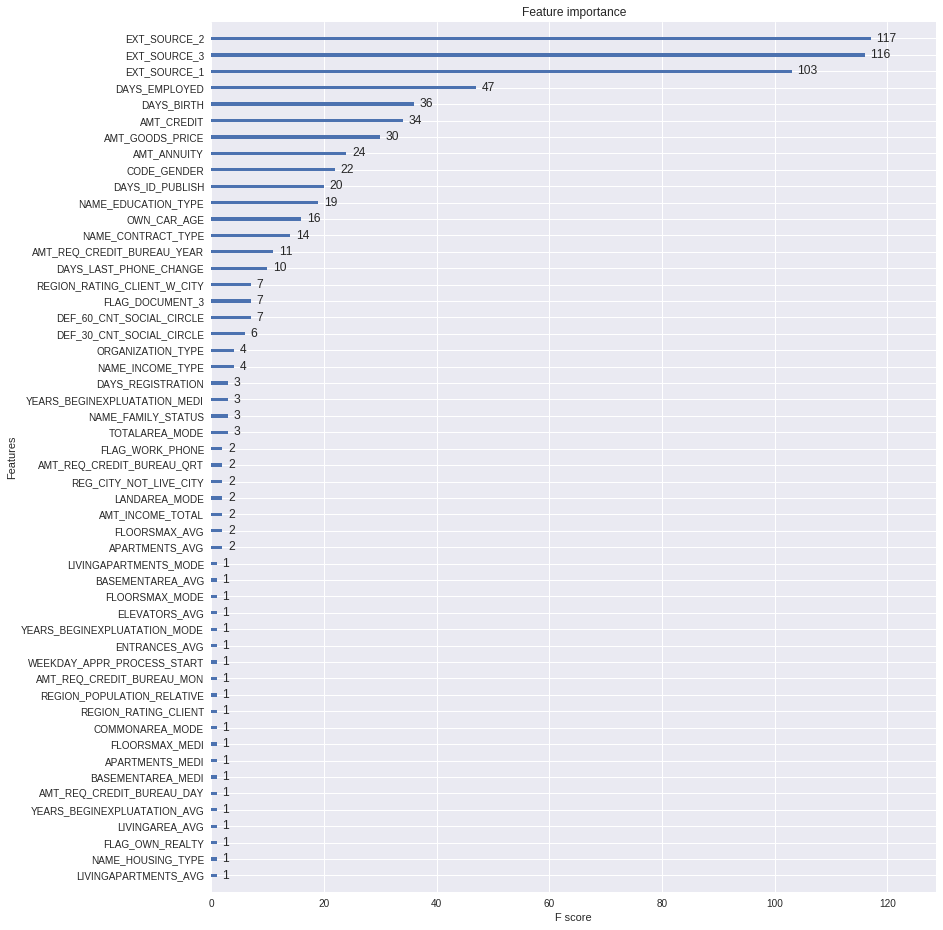

In [0]:
# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
fig, ax = plt.subplots(figsize=(13, 16))
plot_importance(model, ax =ax)
plt.show()

## 2nd

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

In [0]:
train = df_2nd[df_2nd['TARGET'].notnull()]
test = df_2nd[df_2nd['TARGET'].isnull()]
print("Train/valid shape: {}, test shape: {}".format(train.shape, test.shape))

Train/valid shape: (265845, 156), test shape: (42653, 156)


In [0]:
del_features = ['TARGET', 'SK_ID_CURR'] #, 'SK_ID_BUREAU', 'SK_ID_PREV', 'index', 'level_0'
predictors = list(filter(lambda v: v not in del_features, train.columns))
y = train['TARGET']
X = train[predictors]

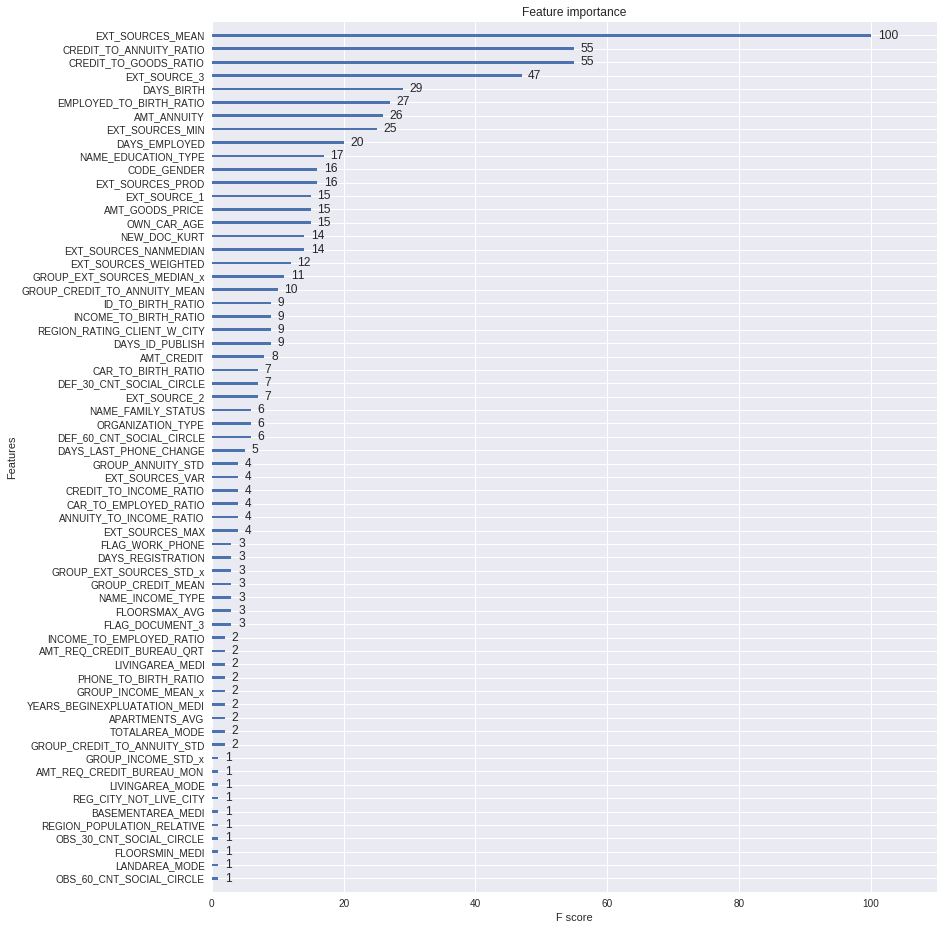

In [0]:
# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
fig, ax = plt.subplots(figsize=(13, 16))
plot_importance(model, ax =ax)
plt.show()

## 3rd

In [0]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import xgboost as xgb

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [0]:
""" FEATURE ENGINEERING FUNCTIONS"""        
def do_mean(df, group_cols, counted, agg_name):
  gp = df[group_cols + [counted]].groupby(group_cols)[counted].mean().reset_index().rename(
      columns={counted: agg_name})
  df = df.merge(gp, on=group_cols, how='left')
  del gp
  gc.collect()
  return df

def do_median(df, group_cols, counted, agg_name):
  gp = df[group_cols + [counted]].groupby(group_cols)[counted].median().reset_index().rename(
      columns={counted: agg_name})
  df = df.merge(gp, on=group_cols, how='left')
  del gp
  gc.collect()
  return df

def do_std(df, group_cols, counted, agg_name):
  gp = df[group_cols + [counted]].groupby(group_cols)[counted].std().reset_index().rename(
      columns={counted: agg_name})
  df = df.merge(gp, on=group_cols, how='left')
  del gp
  gc.collect()
  return df

def do_sum(df, group_cols, counted, agg_name):
  gp = df[group_cols + [counted]].groupby(group_cols)[counted].sum().reset_index().rename(
      columns={counted: agg_name})
  df = df.merge(gp, on=group_cols, how='left')
  del gp
  gc.collect()
  return df
  
def label_encoder(df, categorical_columns=None):
  """Encode categorical values as integers (0,1,2,3...) with pandas.factorize. """
  if not categorical_columns:
      categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
  for col in categorical_columns:
      df[col], uniques = pd.factorize(df[col])
  return df, categorical_columns



def one_hot_encoder(df, categorical_columns=None, nan_as_category=True):
  """Create a new column for each categorical value in categorical columns. """
  original_columns = list(df.columns)
  if not categorical_columns:# if not auto "ohe" object-type features
      categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
  df = pd.get_dummies(df, columns=categorical_columns, dummy_na=nan_as_category)
  categorical_columns = [c for c in df.columns if c not in original_columns]
  return df, categorical_columns

def group(df_to_agg, prefix, aggregations, aggregate_by= 'SK_ID_CURR'):
  """Grouping by SK_ID_CURR with formated aggregations """
  agg_df = df_to_agg.groupby(aggregate_by).agg(aggregations)
  # change columns names
  agg_df.columns = pd.Index(['{}{}_{}'.format(prefix, e[0], e[1].upper())
                             for e in agg_df.columns.tolist()])
  return agg_df.reset_index()

def group_and_merge(df_to_agg, df_to_merge, prefix, aggregations, aggregate_by= 'SK_ID_CURR'):
  agg_df = group(df_to_agg, prefix, aggregations, aggregate_by= aggregate_by)
  return df_to_merge.merge(agg_df, how='left', on= aggregate_by)  


In [0]:
# modelling df after added new feature
from contextlib import contextmanager
import time

@contextmanager
def timer(name):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(name, time.time() - t0))

DATA_DIRECTORY = "drive/My Drive/Kaggle/home credit/data/"
#num_rows = 30000 if debug else None
debug = False #True
num_rows = 30000 if debug else None

if __name__ == "__main__":
  with timer("application_train and application_test"):
    df = get_apply_train_test(DATA_DIRECTORY, num_rows= num_rows)
    print("Application dataframe shape: ", df.shape)

Application dataframe shape:  (356250, 159)
application_train and application_test - done in 47s


In [0]:
# modelling df after added new feature
from contextlib import contextmanager
import time

@contextmanager
def timer(name):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(name, time.time() - t0))

DATA_DIRECTORY = "drive/My Drive/Kaggle/home credit/data/"
#num_rows = 30000 if debug else None
debug = False #True
num_rows = 30000 if debug else None

if __name__ == "__main__":
  with timer("application_train and application_test"):
    df = get_apply_train_test_2(DATA_DIRECTORY, num_rows= num_rows)
    print("Application dataframe shape: ", df.shape)
  with timer("Credit card dataframe"):
    bureau = get_bureau_3(DATA_DIRECTORY, num_rows)
    df = pd.merge(df, bureau, on='SK_ID_CURR', how='left')
    print("bureau shape: ", bureau.shape)
    print("Final dataframe shape: ", df.shape)
    #del bureau; gc.collect()

Application dataframe shape:  (356250, 123)
application_train and application_test - done in 13s
bureau shape:  (305811, 163)
Final dataframe shape:  (356250, 285)
Credit card dataframe - done in 54s


In [0]:
%%time
# Preparing data
train = df[df['TARGET'].notnull()]
test = df[df['TARGET'].isnull()]
print("Train/valid shape: {}, test shape: {}".format(df.shape, test.shape))

# spliting data
del_features = ['TARGET', 'SK_ID_CURR', 'SK_ID_BUREAU', 'SK_ID_PREV', 'index', 'level_0']
predictors = list(filter(lambda v: v not in del_features, train.columns))

y_2 = train['TARGET']
X_2 = train[predictors]

X_acttest = test[predictors]
y_acttest = test['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Extreme Gradient Boosting
param_int = {
    "objective": "binary:logistic",
    "booster": "gbtree",
    "max_depth":4 ,# default: 3 oly for depthwise
    "n_estimators": 500,#2000, # default:500
    "learning_rate": 0.01, #25,# default: 0.05
    "gamma": 0.0,
    "min_child_wweight":10, # default:1
    "subsample":0.7,
    "colsample_bytree": 0.6, # default:1.0
    "colsample_btlevel":0.5, # default:1.0
    "reg_alpha":0.0,
    "reg_lambda":1.0,
    "scale_pse_weight":1.0,
    "random_state":0,
    #
    "silent": True,
    "n_jobs":14,
    #
    "tree_method": "hist", # default: auto
    "grow_policy": "lossguide", # default: depthwise
    "max_leaves": 0, # default: 0 (unlimited)
    "max_bin": 256  # default: 256    
}
param_fit = {
    "eval_metric": "auc",
    "early_stopping_rounds": 500, # default: 10
    "verbose": 100,#200,
    "eval_set": [(X_train,y_train),(X_val,y_val),(X_test,y_test)]
}
xgb_model_2 = xgb.XGBClassifier(**param_int)
xgb_model_2.fit(X_train,y_train, **param_fit)
evals_result = xgb_model_2.evals_result()
evals_result



Train/valid shape: (356250, 159), test shape: (48744, 159)
[0]	validation_0-auc:0.716994	validation_1-auc:0.717603	validation_2-auc:0.718242
Multiple eval metrics have been passed: 'validation_2-auc' will be used for early stopping.

Will train until validation_2-auc hasn't improved in 500 rounds.
[100]	validation_0-auc:0.734847	validation_1-auc:0.733014	validation_2-auc:0.732189
[200]	validation_0-auc:0.739864	validation_1-auc:0.736522	validation_2-auc:0.736505
[300]	validation_0-auc:0.745713	validation_1-auc:0.740485	validation_2-auc:0.740968
[400]	validation_0-auc:0.753273	validation_1-auc:0.746316	validation_2-auc:0.746276
[499]	validation_0-auc:0.760667	validation_1-auc:0.751845	validation_2-auc:0.751335
CPU times: user 6min 53s, sys: 7.97 s, total: 7min 1s
Wall time: 3min 42s


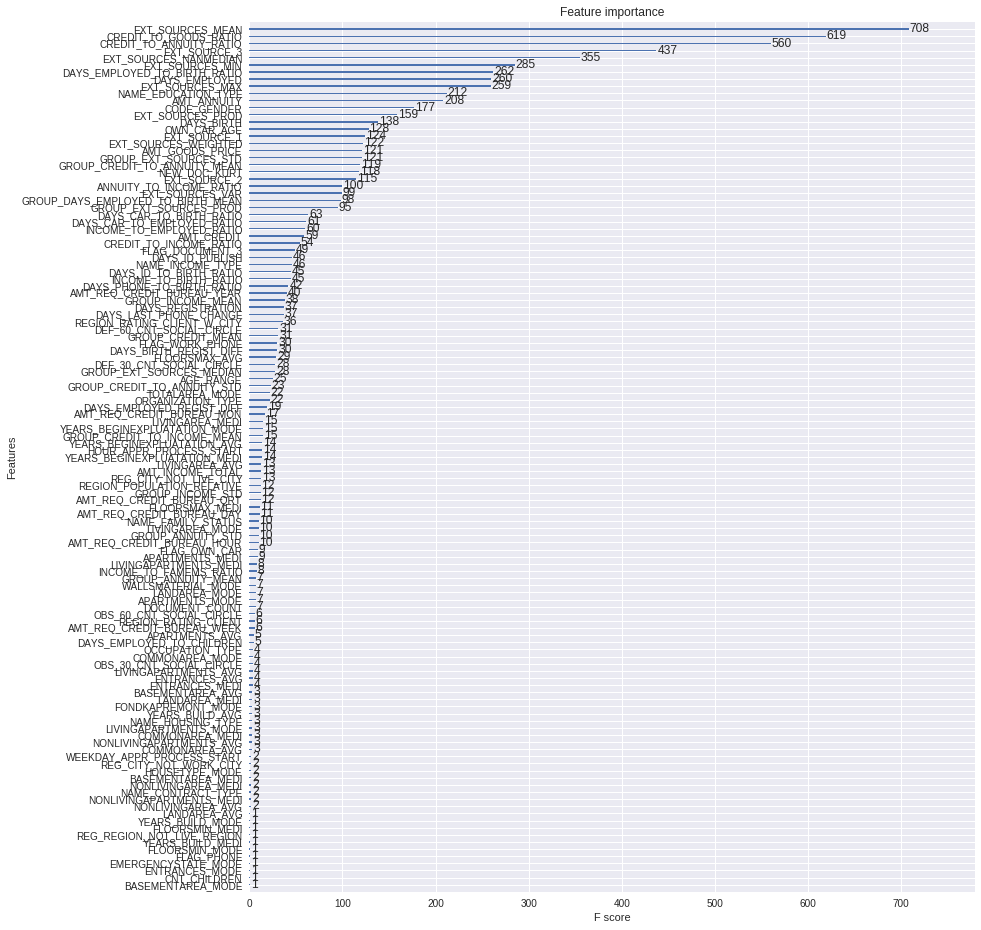

In [0]:
# plot feature importance
fig, ax = plt.subplots(figsize=(13, 16))
xgb.plot_importance(xgb_model_2, ax =ax)
plt.show()

In [0]:
# Drop some less-information features
# imp[imp['model_2'] == 0].index
feature_names = X_2.columns
cols = pd.DataFrame(index=feature_names)
cols['model_2'] = pd.Series(xgb_model_2.feature_importances_, index=feature_names)

cols[(cols['model_2'] == 0)].index

Index(['CNT_FAM_MEMBERS', 'ELEVATORS_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_MODE',
       'FLAG_CONT_MOBILE', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_EMAIL', 'FLAG_EMP_PHONE',
       'FLAG_MOBIL', 'FLAG_OWN_REALTY', 'FLOORSMAX_MODE', 'FLOORSMIN_AVG',
       'LIVE_CITY_NOT_WORK_CITY', 'LIVE_REGION_NOT_WORK_REGION',
       'NAME_TYPE_SUITE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'REG_REGION_NOT_WORK_REGION'],
      dtype='object')

## 4th

In [0]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import xgboost as xgb

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [0]:
""" FEATURE ENGINEERING FUNCTIONS"""        
def do_mean(df, group_cols, counted, agg_name):
  gp = df[group_cols + [counted]].groupby(group_cols)[counted].mean().reset_index().rename(
      columns={counted: agg_name})
  df = df.merge(gp, on=group_cols, how='left')
  del gp
  gc.collect()
  return df

def do_median(df, group_cols, counted, agg_name):
  gp = df[group_cols + [counted]].groupby(group_cols)[counted].median().reset_index().rename(
      columns={counted: agg_name})
  df = df.merge(gp, on=group_cols, how='left')
  del gp
  gc.collect()
  return df

def do_std(df, group_cols, counted, agg_name):
  gp = df[group_cols + [counted]].groupby(group_cols)[counted].std().reset_index().rename(
      columns={counted: agg_name})
  df = df.merge(gp, on=group_cols, how='left')
  del gp
  gc.collect()
  return df

def do_sum(df, group_cols, counted, agg_name):
  gp = df[group_cols + [counted]].groupby(group_cols)[counted].sum().reset_index().rename(
      columns={counted: agg_name})
  df = df.merge(gp, on=group_cols, how='left')
  del gp
  gc.collect()
  return df
  
def label_encoder(df, categorical_columns=None):
  """Encode categorical values as integers (0,1,2,3...) with pandas.factorize. """
  if not categorical_columns:
      categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
  for col in categorical_columns:
      df[col], uniques = pd.factorize(df[col])
  return df, categorical_columns



def one_hot_encoder(df, categorical_columns=None, nan_as_category=True):
  """Create a new column for each categorical value in categorical columns. """
  original_columns = list(df.columns)
  if not categorical_columns:# if not auto "ohe" object-type features
      categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
  df = pd.get_dummies(df, columns=categorical_columns, dummy_na=nan_as_category)
  categorical_columns = [c for c in df.columns if c not in original_columns]
  return df, categorical_columns

def group(df_to_agg, prefix, aggregations, aggregate_by= 'SK_ID_CURR'):
  """Grouping by SK_ID_CURR with formated aggregations """
  agg_df = df_to_agg.groupby(aggregate_by).agg(aggregations)
  # change columns names
  agg_df.columns = pd.Index(['{}{}_{}'.format(prefix, e[0], e[1].upper())
                             for e in agg_df.columns.tolist()])
  return agg_df.reset_index()

def group_and_merge(df_to_agg, df_to_merge, prefix, aggregations, aggregate_by= 'SK_ID_CURR'):
  agg_df = group(df_to_agg, prefix, aggregations, aggregate_by= aggregate_by)
  return df_to_merge.merge(agg_df, how='left', on= aggregate_by)  


In [0]:
# modelling df after added new feature
from contextlib import contextmanager
import time

@contextmanager
def timer(name):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(name, time.time() - t0))

DATA_DIRECTORY = "drive/My Drive/Kaggle/home credit/data/"
#num_rows = 30000 if debug else None
debug = False #True
num_rows = 30000 if debug else None

if __name__ == "__main__":
  with timer("application_train and application_test"):
    df = get_apply_train_test(DATA_DIRECTORY, num_rows= num_rows)
    print("Application dataframe shape: ", df.shape)

Application dataframe shape:  (356250, 136)
application_train and application_test - done in 57s


In [0]:
%%time
# Preparing data
train = df[df['TARGET'].notnull()]
test = df[df['TARGET'].isnull()]
print("Train/valid shape: {}, test shape: {}".format(df.shape, test.shape))

# spliting data
del_features = ['TARGET', 'SK_ID_CURR', 'SK_ID_BUREAU', 'SK_ID_PREV', 'index', 'level_0']
predictors = list(filter(lambda v: v not in del_features, train.columns))

y_2 = train['TARGET']
X_2 = train[predictors]

X_acttest = test[predictors]
y_acttest = test['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Extreme Gradient Boosting
param_int = {
    # general
    "booster": "gbtree",    
    # learning
    "objective": "binary:logistic",    
    # Booster parameters   
    "learning_rate": 0.015, #0.025,# default: 0.05    
    "max_depth": 6 ,# default: 3 oly for depthwise
    "min_child_weight":10, # default:1
    "gamma": 0.0,
    "subsample":0.7,
    "colsample_bytree": 0.6, # default:1.0
    
    "n_estimators": 500, # default:500  
    
    "colsample_btlevel":0.5, # default:1.0
    "reg_alpha": 0.5, #0.0,
    "reg_lambda": 0.5, #1.0,
    "scale_pos_weight":1.0,
    "random_state":0,
    #
    "silent": True,
    "n_jobs":14,
    #
    "tree_method": "hist", # default: auto
    "grow_policy": "lossguide", # default: depthwise
    "max_leaves": 0, # default: 0 (unlimited)
    "max_bin": 256  # default: 256    
}
param_fit = {
    "eval_metric": "auc",
    "early_stopping_rounds": 500, # default: 10
    "verbose": 100,#200,
    "eval_set": [(X_train,y_train),(X_val,y_val),(X_test,y_test)]
}
xgb_model_2 = xgb.XGBClassifier(**param_int)
xgb_model_2.fit(X_train,y_train, **param_fit)
evals_result = xgb_model_2.evals_result()
evals_result



Train/valid shape: (356250, 136), test shape: (48744, 136)
[0]	validation_0-auc:0.725371	validation_1-auc:0.717478	validation_2-auc:0.719202
Multiple eval metrics have been passed: 'validation_2-auc' will be used for early stopping.

Will train until validation_2-auc hasn't improved in 500 rounds.
[100]	validation_0-auc:0.757997	validation_1-auc:0.743575	validation_2-auc:0.743653
[200]	validation_0-auc:0.770186	validation_1-auc:0.749877	validation_2-auc:0.749077
[300]	validation_0-auc:0.784039	validation_1-auc:0.756527	validation_2-auc:0.755479
[400]	validation_0-auc:0.795669	validation_1-auc:0.760969	validation_2-auc:0.759809
[499]	validation_0-auc:0.804559	validation_1-auc:0.763389	validation_2-auc:0.762082
CPU times: user 7min 59s, sys: 21 s, total: 8min 20s
Wall time: 4min 30s


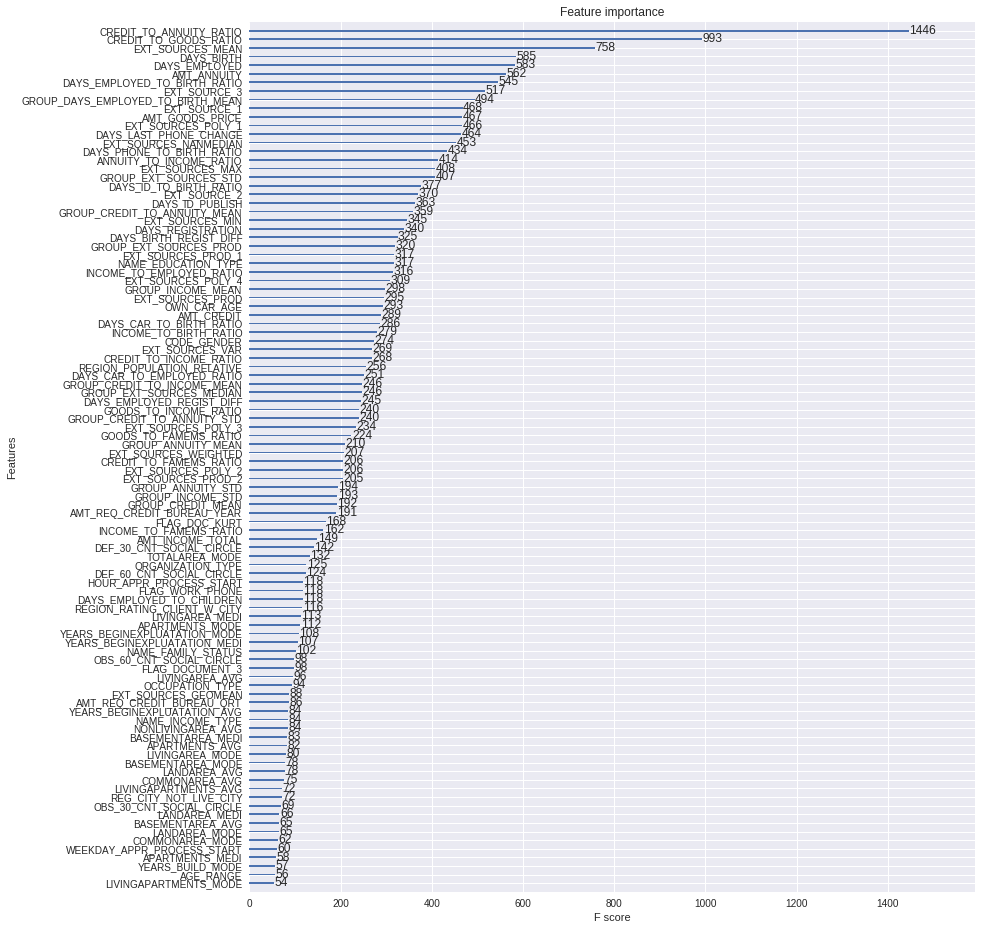

In [0]:
# plot feature importance
fig, ax = plt.subplots(figsize=(13, 16))
xgb.plot_importance(xgb_model_2, ax =ax, max_num_features = 100)
plt.show()

In [0]:
# Drop some less-information features
# imp[imp['model_2'] == 0].index
feature_names = X_2.columns
cols = pd.DataFrame(index=feature_names)
cols['model_2'] = pd.Series(xgb_model_2.feature_importances_, index=feature_names)

cols[(cols['model_2'] == 0)].index

Index(['REG_REGION_NOT_LIVE_REGION'], dtype='object')